In [60]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

import os

In [61]:
window =  11

In [62]:
### calculate moving average
# define function for use of numpy arrays
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


### plotting routine
def plot_range(SampleData,ax1,col='steelblue',prctl=[5,25,50,75,95]):
 
 SDist=np.percentile(SampleData,prctl,axis=1).T

 x=np.arange(0,len(pd.DatetimeIndex(SampleData.time).year))
 #ax1.plot(x, SDist[:,2],)
 for i in range(int(np.floor(len(prctl)/2))+1):
     alph=0.15+(i/len(prctl))
     ax1.fill_between(x,SDist[:,0+i], SDist[:,len(prctl)-1-i], color=col, alpha=alph, edgecolor="none")
 return SDist

### plotting routine
def plot_bxp(SampleData,tim,j,ax1,col='steelblue',prctl=[5,25,50,75,95],linestyle='-',alpha=0.2,lbl=''):
    SDist=np.percentile(SampleData,prctl,axis=1).T
    for i in range(int(np.floor(len(prctl)/2))+1):
        ax1.vlines(tim,SDist[j,0+i], SDist[j,len(prctl)-1-i], color=col,linestyle=linestyle)
    
    ax1.plot(tim,SDist[j,int(np.floor(len(prctl)/2))], color=col, marker='o',label=lbl)

# Emission data

In [63]:
e_flat10=pd.read_csv('flat10.csv',header=4)
e_flat10_cdr=pd.read_csv('flat10_cdr.csv',header=4)
e_flat10_zec=pd.read_csv('flat10_zec.csv',header=4)
e_flat10_nz=pd.read_csv('flat10_cdr.csv',header=4)
e_flat10_nz[150:]=0


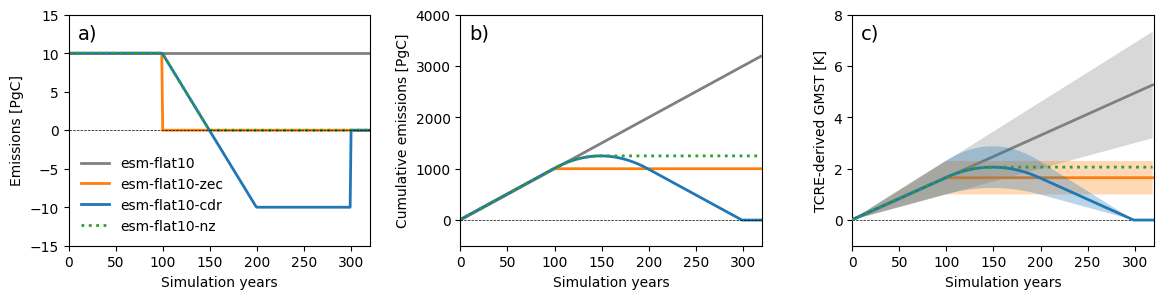

In [64]:
fig = plt.figure(figsize=(14,3))

# subfigure 1
sub = fig.add_subplot(1, 3, 1)

sub.set_ylabel("Emissions [PgC]")
sub.set_xlabel("Simulation years")
sub.set_xlim(0,320)
sub.set_ylim(-15,15)
sub.plot(np.repeat(10,320), color='gray', lw=2, label="esm-flat10")
sub.plot(np.array(e_flat10_zec)[:,1], color="tab:orange", lw=2, label="esm-flat10-zec")
sub.plot(np.array(e_flat10_cdr)[:,1], color="tab:blue", lw=2, label="esm-flat10-cdr")
sub.plot(np.array(e_flat10_nz)[:,1], color="tab:green", lw=2, label="esm-flat10-nz", linestyle=":")

sub.axhline(0, color="black", lw=0.5, linestyle="--")
sub.legend(frameon=False, loc="lower left")
sub.annotate('a)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 2
sub = fig.add_subplot(1, 3, 2)

sub.set_ylabel("Cumulative emissions [PgC]")
sub.set_xlabel("Simulation years")
sub.set_xlim(0,320)
sub.set_ylim(-500,4000)
sub.plot(np.arange(0,320)*10, color='grey', lw=2, zorder=2)
sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1]), lw=2, color='tab:orange')
sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1]), lw=2, color="tab:blue")
sub.plot(np.cumsum(np.array(e_flat10_nz)[:,1]), lw=2, color="tab:green", linestyle=":")
sub.axhline(0, color="black", lw=0.5, linestyle="--")
sub.annotate('b)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 3
# TCRE values/range from AR6 - 5.5.1.4
sub = fig.add_subplot(1, 3, 3)

sub.set_ylabel("TCRE-derived GMST [K]")
sub.set_xlabel("Simulation years")
sub.set_xlim(0,320)
sub.set_ylim(-1,8)
sub.plot(np.arange(0,320)*10*1.65/1000, color='grey', lw=2, zorder=1)
sub.fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.3, edgecolor="none", zorder=1)
sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=2, color='tab:orange', zorder=2)
sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_zec)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_zec)[:,1])*2.3/1000, lw=2, color="tab:orange", alpha=0.3, edgecolor="none", zorder=2)
sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=2, color="tab:blue", zorder=3)
sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_cdr)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_cdr)[:,1])*2.3/1000, lw=2, color="tab:blue", alpha=0.3, edgecolor="none", zorder=3)
sub.plot(np.cumsum(np.array(e_flat10_nz)[:,1])*1.65/1000, lw=2, color="tab:green", linestyle=":", zorder=4)
#sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_nz)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_nz)[:,1])*2.3/1000, lw=2, color="tab:green", alpha=0.1, edgecolor="none", zorder=4)
sub.axhline(0, color="black", lw=0.5, linestyle="--")
sub.annotate('c)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

fig.subplots_adjust(wspace=0.3, hspace=0)

plt.savefig("images/flat10_exp_design.pdf", bbox_inches='tight')
plt.savefig("images/flat10_exp_design.jpg", bbox_inches='tight')


# SCM data

In [65]:
# import fair, magicc, CSCM

# FaIR
ds_fair = xr.open_dataset('SCM_data/timeseries/flat10_FaIR.nc')

# MAGICC
ds_magicc = xr.open_dataset('SCM_data/timeseries/flat10_magicc.nc')

ds_magicc=ds_magicc.rename_vars(name_dict={'Atmospheric_Concentrations__CO2':'co2_concentration'})
ds_magicc=ds_magicc.rename_vars(name_dict={'Surface_Air_Temperature_Change':'temperature'})
ds_magicc=ds_magicc.rename_dims(dims_dict={'ensemble_member':'config'})

ds_magicc["scenario"]=("scenario",['esm-flat10','esm-flat10_cdr','esm-flat10_zec'])

# CSCM
ds_cicero = xr.open_dataset('SCM_data/timeseries/cic_flat10.nc')

ds_cicero=ds_cicero.rename_vars(name_dict={'concentrations-CO2':'co2_concentration'})
ds_cicero=ds_cicero.rename_vars(name_dict={'dT_glob':'temperature'})

#ds_cicero["scenario"]=("scenario",['esm-flat10','esm-flat10_zec','esm-flat10_cdr','esm-piControl'])

In [66]:
ds_fair

<xarray.Dataset> Size: 23MB
Dimensions:            (config: 1001, time: 321, scenario: 3)
Coordinates:
  * config             (config) int32 4kB 1230 1715 2658 ... 1497105 1498424
  * time               (time) int32 1kB 0 1 2 3 4 5 ... 315 316 317 318 319 320
  * scenario           (scenario) object 24B 'esm-flat10' ... 'esm-flat10_cdr'
Data variables:
    ecs                (config) float64 8kB ...
    tcr                (config) float64 8kB ...
    tcre               (config) float64 8kB ...
    zec50              (config) float64 8kB ...
    zec100             (config) float64 8kB ...
    zec200             (config) float64 8kB ...
    tr1000             (config) float64 8kB ...
    tr0                (config) float64 8kB ...
    tpw                (config) int32 4kB ...
    temperature        (time, scenario, config) float64 8MB ...
    co2_concentration  (time, scenario, config) float64 8MB ...
    airborne_fraction  (time, scenario, config) float64 8MB ...

In [67]:
ds_fair

<xarray.Dataset> Size: 23MB
Dimensions:            (config: 1001, time: 321, scenario: 3)
Coordinates:
  * config             (config) int32 4kB 1230 1715 2658 ... 1497105 1498424
  * time               (time) int32 1kB 0 1 2 3 4 5 ... 315 316 317 318 319 320
  * scenario           (scenario) object 24B 'esm-flat10' ... 'esm-flat10_cdr'
Data variables:
    ecs                (config) float64 8kB ...
    tcr                (config) float64 8kB ...
    tcre               (config) float64 8kB ...
    zec50              (config) float64 8kB ...
    zec100             (config) float64 8kB ...
    zec200             (config) float64 8kB ...
    tr1000             (config) float64 8kB ...
    tr0                (config) float64 8kB ...
    tpw                (config) int32 4kB ...
    temperature        (time, scenario, config) float64 8MB ...
    co2_concentration  (time, scenario, config) float64 8MB ...
    airborne_fraction  (time, scenario, config) float64 8MB ...

In [68]:
ds_cicero['temperature']=ds_cicero['temperature'].transpose("time", "scenario", "config")
ds_cicero['co2_concentration']=ds_cicero['co2_concentration'].transpose("time", "scenario", "config")   
ds_cicero['OHC700']=ds_cicero['OHC700'].transpose("time", "scenario", "config")
ds_cicero['RIB_glob'].transpose("time", "scenario", "config")
ds_cicero=ds_cicero.where(ds_cicero.time>=1850, drop=True)
ds_cicero['tcre']=ds_cicero['tcre'].isel({'time':0})
ds_cicero['zec50']=ds_cicero['zec50'].isel({'time':0})
ds_cicero['zec100']=ds_cicero['zec100'].isel({'time':0})


In [69]:
ds_cicero

<xarray.Dataset> Size: 34MB
Dimensions:            (config: 1000, time: 351, scenario: 3)
Coordinates:
  * config             (config) int32 4kB 0 1 2 3 4 5 ... 995 996 997 998 999
  * time               (time) int32 1kB 1850 1851 1852 1853 ... 2198 2199 2200
  * scenario           (scenario) object 24B 'esm-flat10' ... 'esm-flat10_cdr'
Data variables:
    tcre               (config) float64 8kB 1.633 1.747 1.577 ... 1.72 1.482
    zec50              (config) float64 8kB 0.002152 -0.01674 ... -0.1504
    zec100             (config) float64 8kB -0.1832 -0.216 ... -0.09211 -0.3252
    temperature        (time, scenario, config) float64 8MB -0.0105 ... -0.3942
    OHC700             (time, scenario, config) float64 8MB -0.5741 ... -13.54
    co2_concentration  (time, scenario, config) float64 8MB 282.4 ... 247.3
    RIB_glob           (scenario, config, time) float64 8MB 0.06671 ... -0.121

Temperature per model

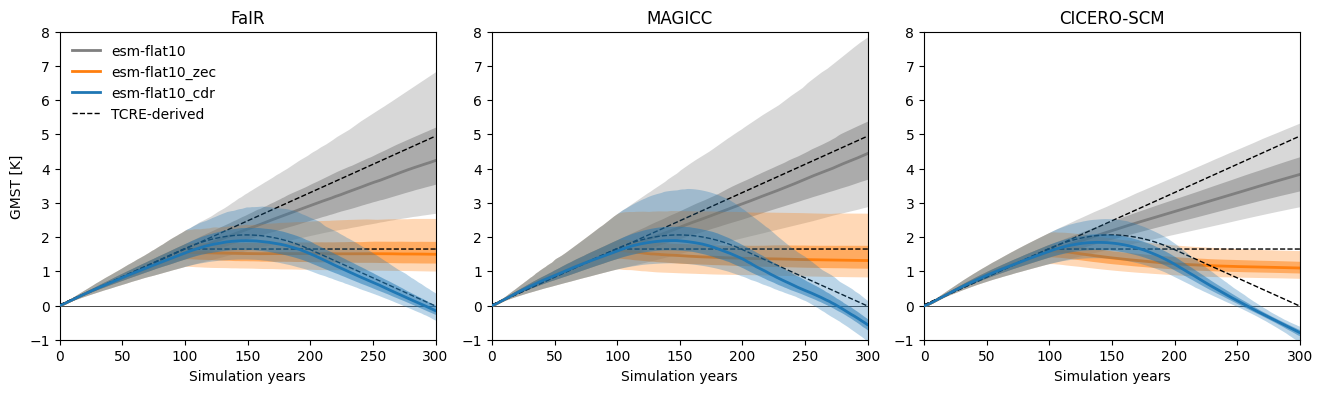

In [70]:
fig = plt.figure(figsize=(16,4))

# subfigure 1
sub = fig.add_subplot(1, 3, 1)
sub.set_title("FaIR")
sub.set_ylabel("GMST [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-1,8)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:gray",alpha=0.3, edgecolor="none", zorder=1)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:gray",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:gray",lw=2, label="esm-flat10", zorder=1)

dd = ds_fair.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.3, edgecolor="none", zorder=2)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="esm-flat10_zec", zorder=2)

dd = ds_fair.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:blue",alpha=0.3, edgecolor="none", zorder=3)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:blue",lw=2, label="esm-flat10_cdr", zorder=3)

sub.plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--", label="TCRE-derived")
#sub.fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.035, edgecolor="none")
sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
#sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_zec)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_zec)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)
sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
#sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_cdr)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_cdr)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.legend(frameon=False, loc="upper left")

# subfigure 2
sub = fig.add_subplot(1, 3, 2)
sub.set_title("MAGICC")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-1,8)
sub.set_xlim(0,300)

dd = ds_magicc.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:gray",alpha=0.3, edgecolor="none", zorder=1)
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:gray",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,0),color="tab:gray",lw=2, zorder=1)

dd = ds_magicc.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:orange",alpha=0.3, edgecolor="none", zorder=2)
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,0),color="tab:orange",lw=2, zorder=2)

dd = ds_magicc.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.3, edgecolor="none", zorder=3)
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, zorder=3)

sub.plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--", label="TCRE-derived")
#sub.fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.035, edgecolor="none")
sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
#sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_zec)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_zec)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)
sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
#sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_cdr)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_cdr)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)

# subfigure 3
sub = fig.add_subplot(1, 3, 3)
sub.set_title("CICERO-SCM")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-1,8)
sub.set_xlim(0,300)

dd = ds_cicero.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:gray",alpha=0.3, edgecolor="none", zorder=1)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:gray",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:gray",lw=2, zorder=1)

dd = ds_cicero.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.3, edgecolor="none", zorder=2)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, zorder=2)

dd = ds_cicero.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:blue",alpha=0.3, edgecolor="none", zorder=3)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:blue",lw=2, zorder=3)

sub.plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--", label="TCRE-derived")
#sub.fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.035, edgecolor="none")
sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
#sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_zec)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_zec)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)
sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
#sub.fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_cdr)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_cdr)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)

fig.subplots_adjust(wspace=0.15, hspace=0)

Temperature per scenario

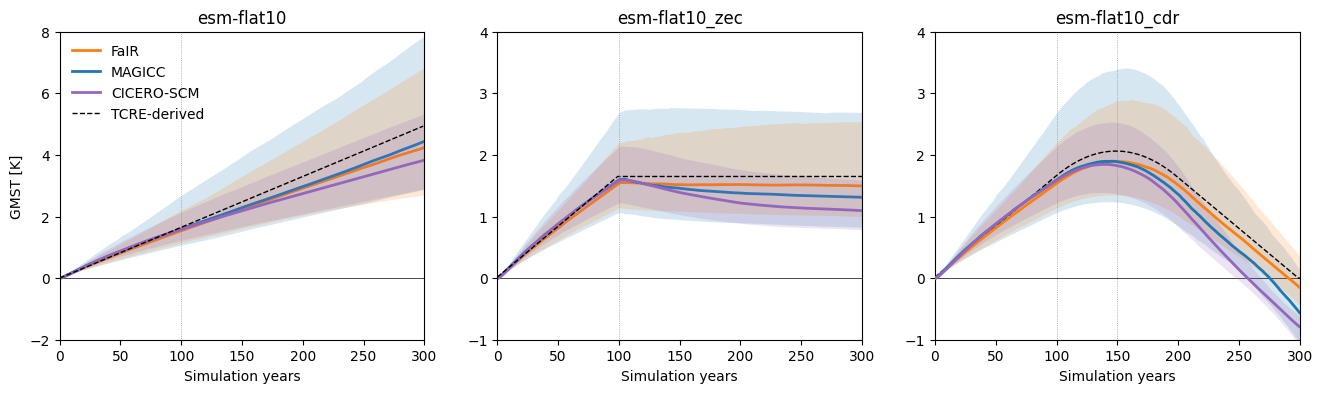

In [71]:
fig = plt.figure(figsize=(16,4))

# subfigure 1
sub = fig.add_subplot(1, 3, 1)
sub.set_title("esm-flat10")
sub.set_ylabel("GMST [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-2,8)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.175, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="FaIR", zorder=2)

dd = ds_magicc.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.175, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, label="MAGICC", zorder=2)

dd = ds_cicero.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:purple",alpha=0.175, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:olive",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:purple",lw=2,label="CICERO-SCM", zorder=2)

sub.plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--", label="TCRE-derived")
sub.axvline(100,lw=0.5,color="gray",linestyle=":")

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.legend(frameon=False, loc="upper left")

# subfigure 2
sub = fig.add_subplot(1, 3, 2)
sub.set_title("esm-flat10_zec")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-1,4)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.175, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="esm-flat10_zec", zorder=2)

dd = ds_magicc.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.175, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, zorder=2)

dd = ds_cicero.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:purple",alpha=0.175, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:purple",lw=2, zorder=2)

sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")

# subfigure 3
sub = fig.add_subplot(1, 3, 3)
sub.set_title("esm-flat10_cdr")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-1,4)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.175, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="esm-flat10_cdr", zorder=3)

dd = ds_magicc.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.175, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, zorder=3)

dd = ds_cicero.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:purple",alpha=0.175, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:purple",lw=2, zorder=3)

sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.axvline(150,lw=0.5,color="gray",linestyle=":")

Atmospheric CO2 per model

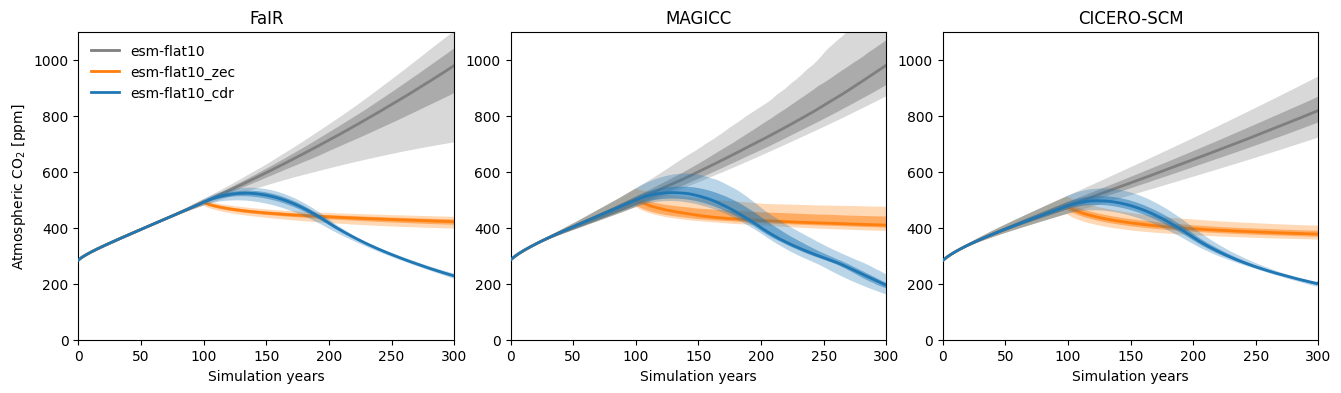

In [72]:
fig = plt.figure(figsize=(16,4))

# subfigure 1
sub = fig.add_subplot(1, 3, 1)
sub.set_title("FaIR")
sub.set_ylabel("Atmospheric CO$_2$ [ppm]")
sub.set_xlabel("Simulation years")
sub.set_ylim(0,1100)
sub.set_xlim(0,300)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:gray",alpha=0.3, edgecolor="none", zorder=1)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:gray",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:gray",lw=2, label="esm-flat10", zorder=1)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.3, edgecolor="none", zorder=2)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="esm-flat10_zec", zorder=2)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:blue",alpha=0.3, edgecolor="none", zorder=3)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:blue",lw=2, label="esm-flat10_cdr", zorder=3)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.legend(frameon=False, loc="upper left")

# subfigure 2
sub = fig.add_subplot(1, 3, 2)
sub.set_title("MAGICC")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(0,1100)
sub.set_xlim(0,300)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:gray",alpha=0.3, edgecolor="none", zorder=1)
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:gray",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,0),color="tab:gray",lw=2, zorder=1)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:orange",alpha=0.3, edgecolor="none", zorder=2)
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,0),color="tab:orange",lw=2, zorder=2)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.3, edgecolor="none", zorder=3)
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, zorder=3)

sub.axhline(0, color="black", lw=0.5, zorder=0)

# subfigure 3
sub = fig.add_subplot(1, 3, 3)
sub.set_title("CICERO-SCM")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(0,1100)
sub.set_xlim(0,300)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:gray",alpha=0.3, edgecolor="none", zorder=1)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:gray",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:gray",lw=2, zorder=1)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.3, edgecolor="none", zorder=2)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, zorder=2)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:blue",alpha=0.3, edgecolor="none", zorder=3)
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:blue",lw=2, zorder=3)

sub.axhline(0, color="black", lw=0.5, zorder=0)

fig.subplots_adjust(wspace=0.15, hspace=0)

Atmospheric CO2 per scenario

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/1809385613.py:6: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ [ppm]")


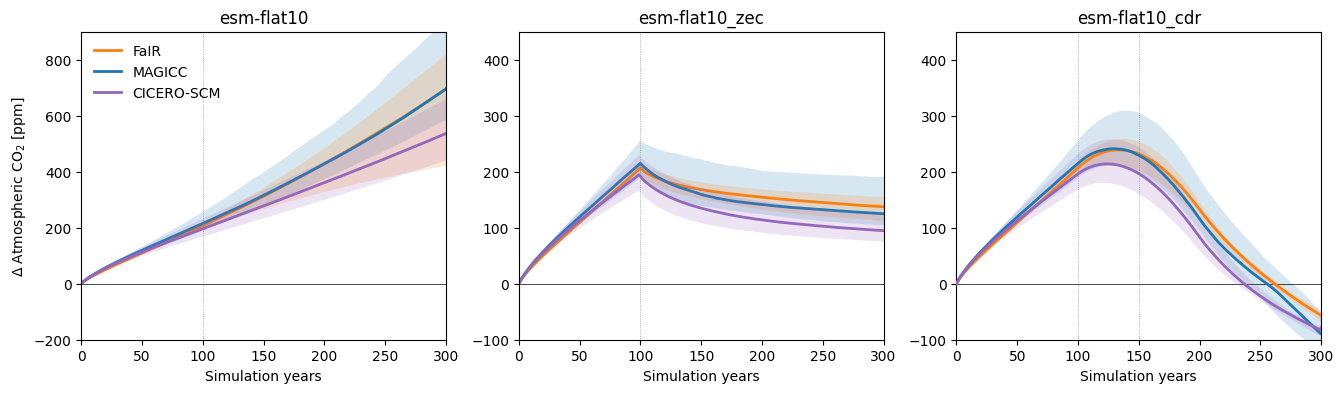

In [73]:
fig = plt.figure(figsize=(16,4))

# subfigure 1
sub = fig.add_subplot(1, 3, 1)
sub.set_title("esm-flat10")
sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ [ppm]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-200,900)
sub.set_xlim(0,300)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:orange",alpha=0.175, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:orange",lw=2, label="FaIR", zorder=2)
dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0)-np.percentile(dd,5,0)[0],np.percentile(dd,95,0)-np.percentile(dd,95,0)[0],color="tab:blue",alpha=0.175, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0)-np.percentile(dd,50,0)[0],color="tab:blue",lw=2, label="MAGICC", zorder=2)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:purple",alpha=0.175, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:olive",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:purple",lw=2,label="CICERO-SCM", zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.legend(frameon=False, loc="upper left")

# subfigure 2
sub = fig.add_subplot(1, 3, 2)
sub.set_title("esm-flat10_zec")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-100,450)
sub.set_xlim(0,300)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:orange",alpha=0.175, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:orange",lw=2, label="esm-flat10_zec", zorder=2)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0)-np.percentile(dd,5,0)[0],np.percentile(dd,95,0)-np.percentile(dd,95,0)[0],color="tab:blue",alpha=0.175, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0)-np.percentile(dd,50,0)[0],color="tab:blue",lw=2, zorder=2)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:purple",alpha=0.175, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:purple",lw=2, zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")

# subfigure 3
sub = fig.add_subplot(1, 3, 3)
sub.set_title("esm-flat10_cdr")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-100,450)
sub.set_xlim(0,300)
dd = ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:orange",alpha=0.175, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:orange",lw=2, label="esm-flat10_cdr", zorder=3)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0)-np.percentile(dd,5,0)[0],np.percentile(dd,95,0)-np.percentile(dd,95,0)[0],color="tab:blue",alpha=0.175, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,0)-np.percentile(dd,50,0)[0],color="tab:blue",lw=2, zorder=3)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:purple",alpha=0.175, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:purple",lw=2, zorder=3)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.axvline(150,lw=0.5,color="gray",linestyle=":")

<>:94: SyntaxWarning: invalid escape sequence '\D'
<>:94: SyntaxWarning: invalid escape sequence '\D'
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/3391919273.py:94: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ [ppm]")


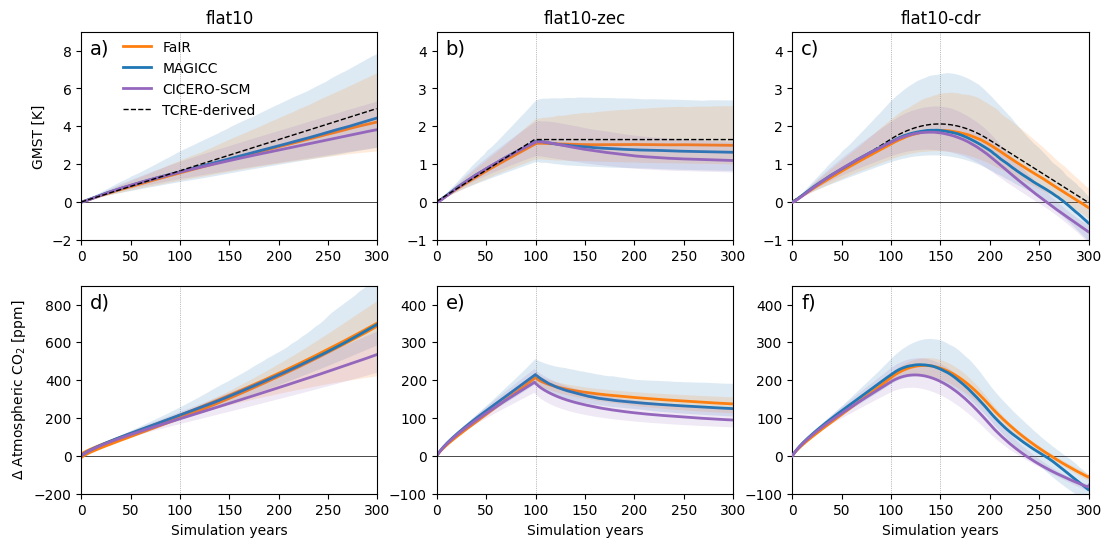

In [74]:
fig = plt.figure(figsize=(13,6))

# subfigure 1
sub = fig.add_subplot(2, 3, 1)
sub.set_title("flat10")
sub.set_ylabel("GMST [K]")
#sub.set_xlabel("Simulation years")
sub.set_ylim(-2,9)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.15, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="FaIR", zorder=2)

dd = ds_magicc.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.15, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, label="MAGICC", zorder=2)

dd = ds_cicero.temperature.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:purple",alpha=0.15, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:olive",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1),color="tab:purple",lw=2,label="CICERO-SCM", zorder=2)

sub.plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--", label="TCRE-derived")
sub.axvline(100,lw=0.5,color="gray",linestyle=":")

sub.axhline(0, color="black", lw=0.5, zorder=0)
#sub.legend(frameon=False, loc="upper left", bbox_to_anchor=(0.005, 0.89))
sub.legend(frameon=False, loc="upper left", bbox_to_anchor=(0.1, 1.02))
sub.annotate('a)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 2
sub = fig.add_subplot(2, 3, 2)
sub.set_title("flat10-zec")
#sub.set_ylabel("Temperature [K]")
#sub.set_xlabel("Simulation years")
sub.set_ylim(-1,4.5)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.15, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="flat10-zec", zorder=2)

dd = ds_magicc.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.15, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, zorder=2)

dd = ds_cicero.temperature.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:purple",alpha=0.15, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1),color="tab:purple",lw=2, zorder=2)

sub.plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.annotate('b)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 3
sub = fig.add_subplot(2, 3, 3)
sub.set_title("flat10-cdr")
#sub.set_ylabel("Temperature [K]")
#sub.set_xlabel("Simulation years")
sub.set_ylim(-1,4.5)
sub.set_xlim(0,300)

dd = ds_fair.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:orange",alpha=0.15, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:orange",lw=2, label="flat10_cdr", zorder=3)

dd = ds_magicc.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0),np.percentile(dd,95,0),color="tab:blue",alpha=0.15, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,0),color="tab:blue",lw=2, zorder=3)

dd = ds_cicero.temperature.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1),np.percentile(dd,95,1),color="tab:purple",alpha=0.15, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1),color="tab:purple",lw=2, zorder=3)

sub.plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.axvline(150,lw=0.5,color="gray",linestyle=":")
sub.annotate('c)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 4
sub = fig.add_subplot(2, 3, 4)
#sub.set_title("esm-flat10")
sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ [ppm]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-200,900)
sub.set_xlim(0,300)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:orange",alpha=0.15, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:orange",lw=4, label="FaIR", zorder=2)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0)-np.percentile(dd,5,0)[0],np.percentile(dd,95,0)-np.percentile(dd,95,0)[0],color="tab:blue",alpha=0.15, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0)-np.percentile(dd,50,0)[0],color="tab:blue",lw=2, label="MAGICC", zorder=2)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:purple",alpha=0.15, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:olive",alpha=0.5, edgecolor="none", zorder=1)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:purple",lw=2,label="CICERO-SCM", zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
#sub.legend(frameon=False, loc="upper left")
sub.annotate('d)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 5
sub = fig.add_subplot(2, 3, 5)
#sub.set_title("esm-flat10_zec")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-100,450)
sub.set_xlim(0,300)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:orange",alpha=0.15, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:orange",lw=2, label="esm-flat10_zec", zorder=2)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0)-np.percentile(dd,5,0)[0],np.percentile(dd,95,0)-np.percentile(dd,95,0)[0],color="tab:blue",alpha=0.15, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=0)
sub.plot(np.percentile(dd,50,0)-np.percentile(dd,50,0)[0],color="tab:blue",lw=2, zorder=2)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10_zec")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:purple",alpha=0.15, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=2)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:purple",lw=2, zorder=2)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.annotate('e)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 6
sub = fig.add_subplot(2, 3, 6)
#sub.set_title("esm-flat10_cdr")
#sub.set_ylabel("Temperature [K]")
sub.set_xlabel("Simulation years")
sub.set_ylim(-100,450)
sub.set_xlim(0,300)

dd = ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:orange",alpha=0.15, edgecolor="none", zorder=1)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:orange",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:orange",lw=2, label="esm-flat10_cdr", zorder=3)

dd = ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,5,0)-np.percentile(dd,5,0)[0],np.percentile(dd,95,0)-np.percentile(dd,95,0)[0],color="tab:blue",alpha=0.15, edgecolor="none", zorder=0)
#sub.fill_between(np.arange(0,dd.shape[1]),np.percentile(dd,25,0),np.percentile(dd,75,0),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,0)-np.percentile(dd,50,0)[0],color="tab:blue",lw=2, zorder=3)

dd = ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr")
sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,5,1)-np.percentile(dd,5,1)[0],np.percentile(dd,95,1)-np.percentile(dd,95,1)[0],color="tab:purple",alpha=0.15, edgecolor="none", zorder=2)
#sub.fill_between(np.arange(0,dd.shape[0]),np.percentile(dd,25,1),np.percentile(dd,75,1),color="tab:blue",alpha=0.5, edgecolor="none", zorder=3)
sub.plot(np.percentile(dd,50,1)-np.percentile(dd,50,1)[0],color="tab:purple",lw=2, zorder=3)

sub.axhline(0, color="black", lw=0.5, zorder=0)
sub.axvline(100,lw=0.5,color="gray",linestyle=":")
sub.axvline(150,lw=0.5,color="gray",linestyle=":")
sub.annotate('f)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

#plt.tight_layout()
fig.subplots_adjust(wspace=0.2, hspace=0.22)

plt.savefig("images/flat10_SCM_results_tas_co2_panel.pdf", bbox_inches='tight')
plt.savefig("images/flat10_SCM_results_tas_co2_panel.jpg", bbox_inches='tight')

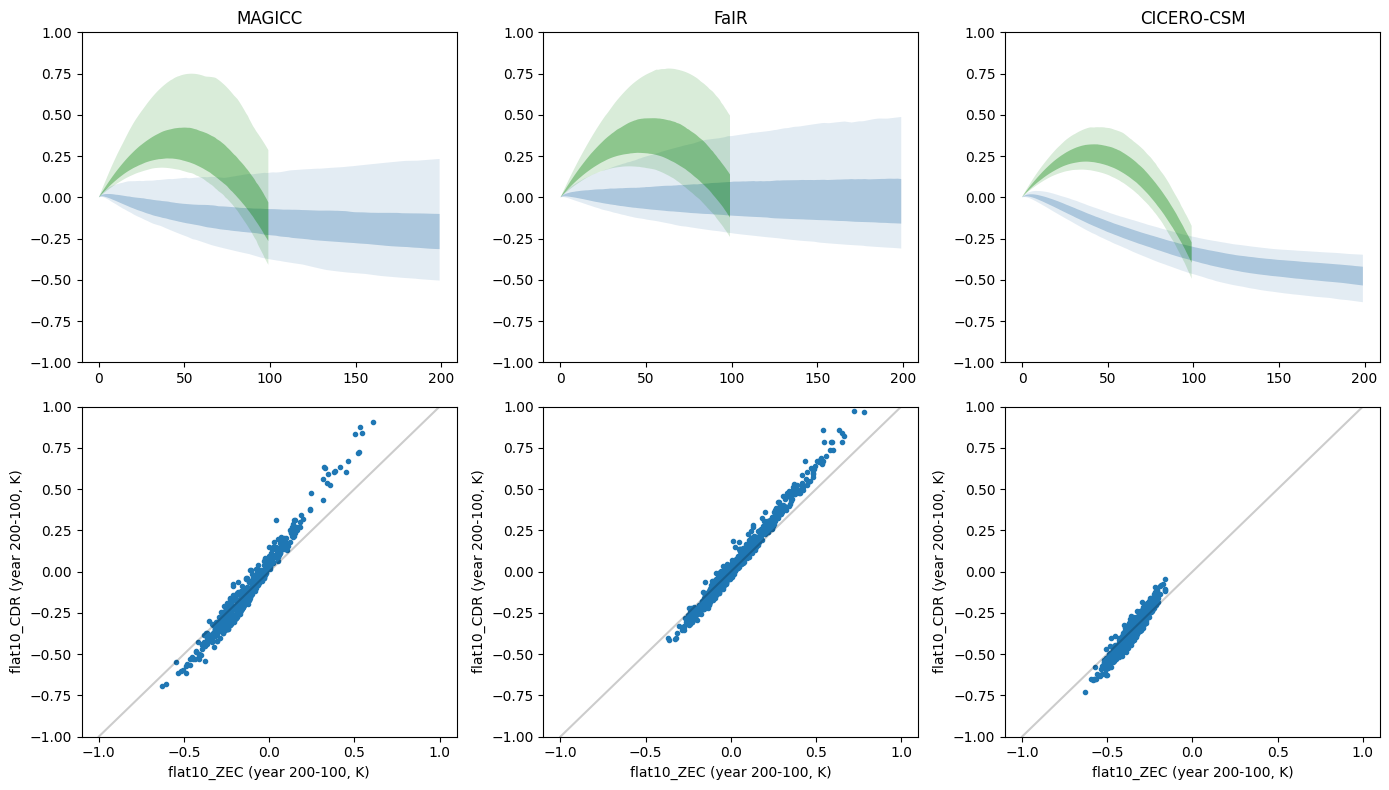

In [75]:
fig = plt.figure(figsize=[14,8])

m_100=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100).T
m_100pl=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300)).T
m_100plc=ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200)).T

ax1 = fig.add_subplot(2,3,1)
ax1.set_ylim([-1,1])
ax1.set_title('MAGICC')
plot_range(m_100pl-m_100,ax1)
plot_range(m_100plc-m_100,ax1,'g')

t_100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
t_100pl=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))
t_100plc=ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200))

ax2 = fig.add_subplot(2,3,2)
ax2.set_ylim([-1,1])
ax2.set_title('FaIR')

plot_range(t_100pl-t_100,ax2)
plot_range(t_100plc-t_100,ax2,'g')

c_100=ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
c_100pl=ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))
c_100plc=ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200))

ax2 = fig.add_subplot(2,3,3)
ax2.set_ylim([-1,1])
ax2.set_title('CICERO-CSM')

plot_range(c_100pl-c_100,ax2)
plot_range(c_100plc-c_100,ax2,'g')

ax3 = fig.add_subplot(2,3,4)

ax3.plot(ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-m_100,ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-m_100,'.')
ax3.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax3.set_xlabel('flat10_ZEC (year 200-100, K)')
ax3.set_ylabel('flat10_CDR (year 200-100, K)')
ax3.set_ylim([-1,1])

ax4 = fig.add_subplot(2,3,5)

ax4.plot(ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-t_100,ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-t_100,'.')
ax4.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax4.set_xlabel('flat10_ZEC (year 200-100, K)')
ax4.set_ylabel('flat10_CDR (year 200-100, K)')
ax4.set_ylim([-1,1])

ax4 = fig.add_subplot(2,3,6)

ax4.plot(ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-c_100,ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-c_100,'.')
ax4.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax4.set_xlabel('flat10_ZEC (year 200-100, K)')
ax4.set_ylabel('flat10_CDR (year 200-100, K)')
ax4.set_ylim([-1,1])
plt.tight_layout()

# ESM data

In [76]:
def extd(ts,leng):
    out=np.zeros(leng)
    if leng>len(ts):
        out[:len(ts)]=ts.values
        out[len(ts):]=ts.iloc[-1]
    else:
        out=ts[:leng]
    return out

In [77]:
#mdls=['ACCESS-ESM1-5','CESM2','GFDL-ESM4','GISS','NorESM2-LM','CNRM-ESM2-1','MPI-ESM1-2-LR']
mdls=['ACCESS-ESM1-5','CESM2','GFDL-ESM4','GISS','NorESM2-LM','MPI-ESM1-2-LR','CNRM-ESM2-1','UKESM']
expt=['esm-pictrl','1pctco2','flat10','flat10-zec','flat10-cdr']
flds=['tas','co2','nbp','fgco2']

In [78]:
tmp=xr.open_dataset('ESM_data/CNRM-ESM2-1/flat10-zec_nbp_CNRM-ESM2-1.nc')

In [79]:
tmp2=xr.open_dataset('ESM_data/CNRM-ESM2-1/flat10_nbp_CNRM-ESM2-1.nc')

In [80]:
%%capture

ed={}
for m in mdls:
    ed[m]={}
    for e in expt:
        tmpa=[]
        for f in flds:

                fl10='ESM_data/'+m+'/'+'flat10'+'_'+f+'_'+m+'.nc'
                fl='ESM_data/'+m+'/'+e+'_'+f+'_'+m+'.nc'
                if os.path.exists(fl) and os.path.exists(fl10):
                    otmp=xr.open_dataset(fl)
                    otmp10=xr.open_dataset(fl10)
                    if 'nep' in list(otmp.keys()):
                        otmp=otmp.rename_vars({"nep": "nbp"})
                    if 'nep' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"nep": "nbp"})
                    if 'CO2_GLOB' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"CO2_GLOB": "co2"})
                        otmp=otmp.rename_vars({"CO2_GLOB": "co2"})
                    if 'NBP_GLOB' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"NBP_GLOB": "nbp"})
                        otmp=otmp.rename_vars({"NBP_GLOB": "nbp"})
                    if 'FGCO2_GLOB' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"FGCO2_GLOB": "fgco2"})
                        otmp=otmp.rename_vars({"FGCO2_GLOB": "fgco2"})    
                    if 'TIME' in list(otmp10.coords.keys()):                  
                        otmp10=otmp10.swap_dims({"TIME": "time"}).rename_vars({"TIME": "time"})
                    if 'TIME' in list(otmp.coords.keys()):                  
                        otmp=otmp.swap_dims({"TIME": "time"}).rename_vars({"TIME": "time"})
                    if 'TAS_GLOB' in list(otmp10.keys()):                  
                        otmp10=otmp10.rename_vars({"TAS_GLOB": "tas"})
                    if 'TAS_GLOB' in list(otmp.keys()):                  
                        otmp=otmp.rename_vars({"TAS_GLOB": "tas"})
                    if '__xarray_dataarray_variable__' in list(otmp10.keys()):                  
                        otmp10=otmp10.rename_vars({"__xarray_dataarray_variable__": f})
                    if '__xarray_dataarray_variable__' in list(otmp.keys()):                  
                        otmp=otmp.rename_vars({"__xarray_dataarray_variable__": f})

                    tmp=otmp.copy(deep=True)
                    tmp10=otmp10.copy(deep=True)
                    if e=='flat10':
                        if len(tmp.time)<1000:
                            tmp.coords['time']=pd.date_range('1700-01-01', periods=tmp['time'].values.shape[0],freq='Y')
                        else:
                            tmp.coords['time']=pd.date_range('1700-01-01', periods=tmp['time'].values.shape[0],freq='M')
                        tmp=tmp[f]    
                    else: 
                        if len(tmp.time)<1000:
                            tmp10.coords['time']=pd.date_range('1700-01-01', periods=tmp10['time'].values.shape[0],freq='Y')
                            tmp.coords['time']=pd.date_range('1800-01-01', periods=tmp['time'].values.shape[0],freq='Y')
                        else:
                            tmp10.coords['time']=pd.date_range('1700-01-01', periods=tmp10['time'].values.shape[0],freq='M')
                            tmp.coords['time']=pd.date_range('1800-01-01', periods=tmp['time'].values.shape[0],freq='M')
  
                        tmp=xr.concat((tmp10.where(tmp10['time.year'] < 1800, drop=True)[f],tmp[f]),'time')
                    tmp=tmp.groupby('time.year').mean()
                    if len(tmp.shape)==2:
                        tmp=tmp.sel(lat=0).sel(lon=0).drop('lev')
                    if len(tmp.shape)==3:
                        tmp=tmp.sel(lat=0).sel(lon=0).drop('lat').drop('lon')
                    if len(tmp.shape)==4:
                        if 'lev' in list(otmp10.coords.keys()):
                            tmp=tmp.sel(lat=0).sel(lon=0).isel(lev=[0]).drop('lat').drop('lon').drop('lev')
                        else:
                            tmp=tmp.sel(lat=0).sel(lon=0).isel(plev=[0]).drop('lat').drop('lon').drop('plev')
                    
                    if tmp.name=='tas':            
                        t10=tmp[0:20].mean().values
                        d10=tmp[20:40].mean().values-t10
                        t0=t10-d10/2
                        tmp=tmp-t0
                    tmpa.append(tmp)
                else:
                    print(m+e+f)
        
             
        ed[m][e]=xr.merge(tmpa)
        if len(tmpa)>0:
            ed[m][e]['fco2fos']=ed[m][e]['tas'].copy()
            if e=='flat10':
                    ed[m][e]['fco2fos'].values=extd(e_flat10['Emission Rate (PgC a-1)'],len(ed[m][e]['year']))
            if e=='flat10-cdr':
                    ed[m][e]['fco2fos'].values=extd(e_flat10_cdr['Emission Rate (PgC a-1)'],len(ed[m][e]['year']))
            if e=='flat10-zec':
                    ed[m][e]['fco2fos'].values=extd(e_flat10_zec['Emission Rate (PgC a-1)'],len(ed[m][e]['year']))
            if m=='ACCESS-ESM1-5':
                ed[m][e]['co2']=ed[m][e]['co2']*1e6

            if m=='GFDL-ESM4':
                ed[m][e]['co2']=ed[m][e]['co2']*1e6
                ed[m][e]['nbp']=ed[m][e]['nbp']*5.1e14/1e12*3600*24*365
                aco2=np.diff(ed[m][e]['co2'][:,0],prepend=ed[m][e]['co2'][0])*2.12
                ed[m][e]['fgco2']=ed[m][e]['fco2fos']-aco2-ed[m][e]['nbp']
            if m=='CESM2':
                ed[m][e]['fgco2']=ed[m][e]['fgco2']/1e15
                ed[m][e]['nbp']=ed[m][e]['nbp']/1e15
                
                ed[m][e]['co2']=280+np.cumsum(ed[m][e]['fco2fos']-ed[m][e]['fgco2']-ed[m][e]['nbp'])/2.12
            
                ed[m][e]['co2']=280+np.cumsum(ed[m][e]['fco2fos']-ed[m][e]['fgco2']-ed[m][e]['nbp'])/2.12
            if m=='NorESM2-LM':
                ed[m][e]['co2']=ed[m][e]['co2']*1e6
                ed[m][e]['nbp']=ed[m][e]['nbp']*5.1e14/1e12*3600*24*365
                ed[m][e]['fgco2']=ed[m][e]['fgco2']*5.1e14/1e12*3600*24*365*.71
            if m=='UKESM':
                ed[m][e]['nbp']=ed[m][e]['nbp']*5.1e14/1e12*.29
                #ed[m][e]['nbp']=ed[m][e]['nbp']*5.1e14/1e12*3600*24*365
                #ed[m][e]['fgco2']=ed[m][e]['fgco2']*5.1e14/1e12*3600*24*365*.71



ed["GFDL-ESM4"]['flat10']['fgco2'][0] = ed["GFDL-ESM4"]['flat10']['fgco2'][0]-10        # correct first ocean value of GFDL-ESM4
ed["GFDL-ESM4"]['flat10-zec']['fgco2'][0] = ed["GFDL-ESM4"]['flat10-zec']['fgco2'][0]-10        # correct first ocean value of GFDL-ESM4
ed["GFDL-ESM4"]['flat10-cdr']['fgco2'][0] = ed["GFDL-ESM4"]['flat10-cdr']['fgco2'][0]-10        # correct first ocean value of GFDL-ESM4

for i,m in enumerate(mdls):
    print(m)
    try:
        ed[m]['flat10-cdr']['C_atm']=(ed[m]['flat10-cdr']['co2']-ed[m]['flat10']['co2'][0])*2.13
    except:
        print('fail cdr')
    try:
        ed[m]['flat10-zec']['C_atm']=(ed[m]['flat10-zec']['co2']-ed[m]['flat10']['co2'][0])*2.13
    except:
        print('fail zec')
    try:
        ed[m]['flat10']['C_atm']=(ed[m]['flat10']['co2']-ed[m]['flat10']['co2'][0])*2.13

    except:
        print('fail flat')    


Temperature per model

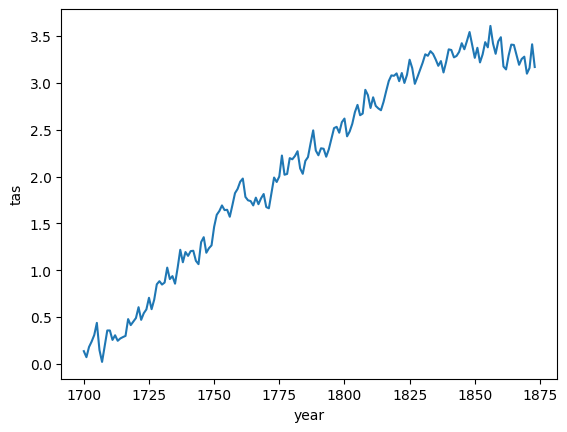

In [81]:
ed[m]['flat10-cdr']['tas'].plot()

In [82]:
t0mat={}
for i,m in enumerate(mdls):
    x = np.arange(0,50)
    y = np.array(ed[m]['flat10']['tas'][:50])
    t0mat[m]=y[1]
    ed[m]['flat10-cdr']['tas'] = ed[m]['flat10-cdr']['tas']-y[1]
    ed[m]['flat10-zec']['tas'] = ed[m]['flat10-zec']['tas']-y[1]
    ed[m]['flat10']['tas'] = ed[m]['flat10']['tas']-y[1]

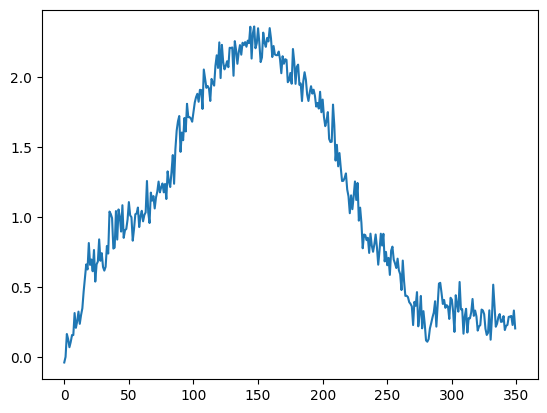

In [83]:


plt.plot(ed['CNRM-ESM2-1']['flat10-cdr']['tas'])


<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/1599063774.py:10: SyntaxWarning: invalid escape sequence '\D'
  axes[i].set_ylabel("$\Delta$ Temperature [K]")


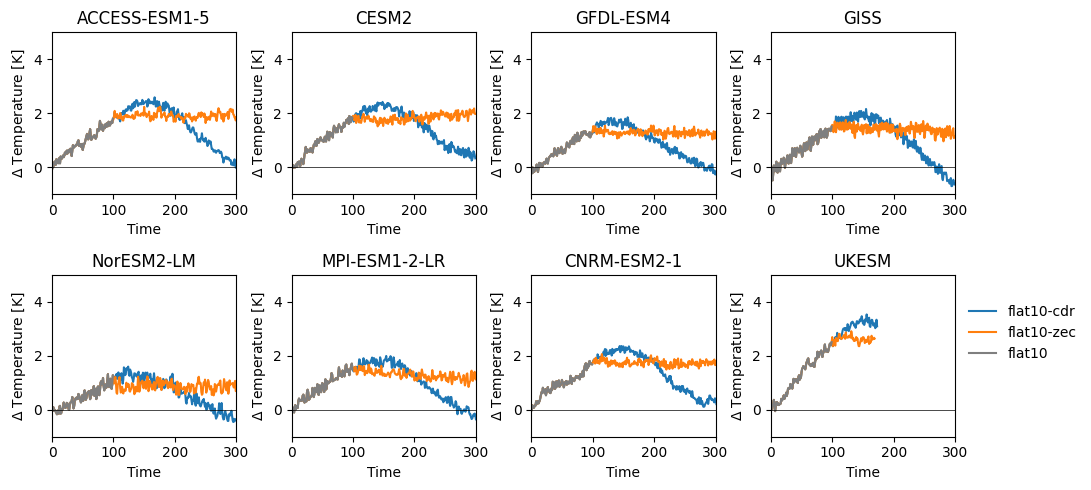

In [84]:
fig, axes = plt.subplots(2,4,figsize=(10, 5))
axes=axes.flatten()

for i,m in enumerate(mdls):
    axes[i].set_ylim([-1,5])
    axes[i].set_xlim([0,300])
    axes[i].set_xticks([0,100,200,300])
    axes[i].set_xticklabels([0,100,200,300])
    axes[i].set_title(m)
    axes[i].set_ylabel("$\Delta$ Temperature [K]")
    axes[i].set_xlabel("Time")
    axes[i].plot(ed[m]['flat10-cdr']['tas'], color="tab:blue", label="flat10-cdr")
    axes[i].plot(ed[m]['flat10-zec']['tas'], color="tab:orange", label="flat10-zec")
    axes[i].plot(ed[m]['flat10']['tas'][:100], color="tab:gray", label="flat10")
    axes[i].axhline(0,color="black",lw=0.5)
#axes[5].set_axis_off()
plt.tight_layout()

axes[7].legend(frameon=False, loc="upper left", bbox_to_anchor=(1.005, 0.89))
#axes[7].set_axis_off()
fig.subplots_adjust(wspace=0.3, hspace=0.5)


Temperature per scenario

In [85]:
ed[mdls[i]]['flat10']['tas']

<xarray.DataArray 'tas' (year: 221)> Size: 2kB
array([ 0.0642,  0.    ,  0.109 ,  0.1669,  0.2364,  0.366 ,  0.0764,
       -0.0507,  0.1151,  0.285 ,  0.285 ,  0.1842,  0.2337,  0.1746,
        0.1997,  0.2144,  0.227 ,  0.4064,  0.3422,  0.3803,  0.418 ,
        0.5335,  0.3984,  0.469 ,  0.5097,  0.6339,  0.5122,  0.6135,
        0.7775,  0.811 ,  0.775 ,  0.7966,  0.956 ,  0.8338,  0.8651,
        0.7844,  0.9547,  1.1463,  1.013 ,  1.122 ,  1.0811,  1.1319,
        1.1358,  1.0283,  0.9928,  1.2275,  1.2806,  1.1146,  1.1627,
        1.1933,  1.392 ,  1.5196,  1.5601,  1.6196,  1.5697,  1.5731,
        1.4988,  1.6218,  1.7504,  1.7957,  1.8726,  1.9064,  1.7103,
        1.674 ,  1.6661,  1.6197,  1.7027,  1.6326,  1.6956,  1.7414,
        1.6022,  1.5889,  1.7562,  1.9172,  1.8698,  1.9291,  2.1521,
        1.9472,  1.9557,  2.1245,  2.1122,  2.1469,  2.1981,  2.0142,
        1.9571,  2.0949,  2.1356,  2.2827,  2.4206,  2.2056,  2.1549,
        2.2294,  2.2244,  2.1395,  2.2189,  2.3302,  2.4448,  2.4585,
        2.3958,  2.5082,  2.6288,  2.4258,  2.5056,  2.5833,  2.3589,
        2.408 ,  2.6604,  2.5536,  2.6401,  2.7981,  2.7649,  2.7507,
        2.7678,  2.7759,  2.7699,  2.8586,  2.9503,  3.0306,  2.9964,
        3.1112,  3.0794,  2.9714,  3.0296,  2.9234,  3.0312,  3.0939,
        3.1895,  3.1825,  3.1575,  3.0799,  3.0275,  3.1851,  3.4121,
        3.4351,  3.3222,  3.1639,  3.2852,  3.4614,  3.2878,  3.3863,
        3.4685,  3.5186,  3.5281,  3.5182,  3.4791,  3.4528,  3.6431,
        3.7775,  3.6916,  3.6794,  3.8123,  3.6752,  3.7607,  3.9473,
        3.8739,  3.7971,  3.9045,  3.8549,  3.811 ,  4.001 ,  3.9736,
        4.0578,  3.9565,  3.9296,  4.0764,  4.2358,  4.0642,  4.041 ,
        4.1339,  4.3397,  4.3262,  4.3703,  4.5029,  4.4591,  4.4183,
        4.3723,  4.4074,  4.3797,  4.5408,  4.3003,  4.4517,  4.4609,
        4.4587,  4.6028,  4.7152,  4.7367,  4.6198,  4.5989,  4.5004,
        4.5666,  4.7623,  4.7444,  4.7426,  4.9633,  4.8146,  4.7394,
        4.7175,  4.7936,  4.9035,  4.9701,  4.9181,  4.8983,  5.0165,
        5.0026,  5.0978,  5.0543,  5.1371,  5.213 ,  5.1524,  5.048 ,
        5.0153,  5.0772,  5.2171,  5.1635,  5.2222,  5.348 ,  5.2525,
        5.2796,  5.3697,  5.4899,  5.3601])
Coordinates:
  * year     (year) int64 2kB 1700 1701 1702 1703 1704 ... 1917 1918 1919 1920

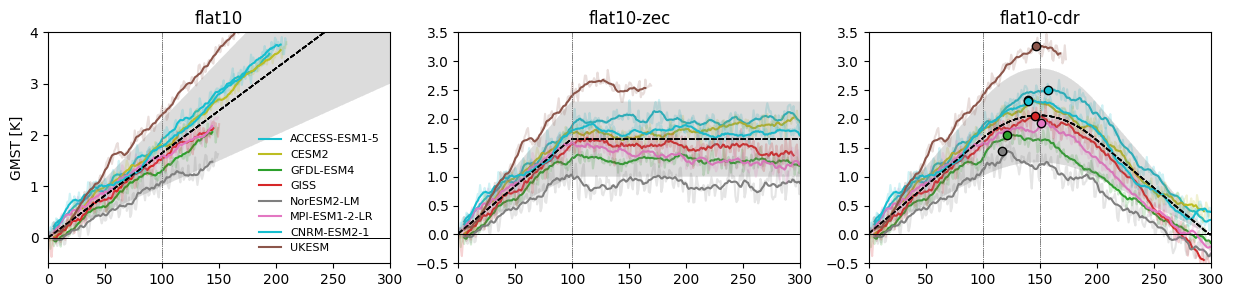

In [86]:
colors=["tab:cyan","tab:olive","tab:green","tab:red","tab:gray","tab:pink","tab:cyan","tab:brown"]

fig, axes = plt.subplots(1,3,figsize=(15, 3))
axes=axes.flatten()

for i in np.arange(0,len(mdls)):
    #
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['tas'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("GMST [K]")
    axes[0].set_ylim([-0.5,4])
    axes[0].set_xlim([0,300])
    axes[0].plot(ed[mdls[i]]['flat10']['tas']-ed[mdls[i]]['flat10']['tas'][0],alpha=0.2,color=colors[i])
    axes[0].plot(time_ma,moving_average(ed[mdls[i]]['flat10']['tas']-ed[mdls[i]]['flat10']['tas'][0],window),color=colors[i],label=mdls[i])

    axes[0].plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--")
    axes[0].fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.035, edgecolor="none")

    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8})

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['tas'])-int(window/2))

    axes[1].set_title("flat10-zec")
    axes[1].set_ylim([-0.5,3.5])
    axes[1].set_xlim([0,300])
    axes[1].plot(ed[mdls[i]]['flat10-zec']['tas']-ed[mdls[i]]['flat10-zec']['tas'][0],alpha=0.2,color=colors[i])
    axes[1].plot(time_ma,moving_average(ed[mdls[i]]['flat10-zec']['tas']-ed[mdls[i]]['flat10-zec']['tas'][0],window),color=colors[i])

    axes[1].plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
    axes[1].fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_zec)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_zec)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['tas'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    axes[2].set_ylim([-0.5,3.5])
    axes[2].set_xlim([0,300])
    axes[2].plot(ed[mdls[i]]['flat10-cdr']['tas']-ed[mdls[i]]['flat10-cdr']['tas'][0],alpha=0.2,color=colors[i])
    axes[2].plot(time_ma,moving_average(ed[mdls[i]]['flat10-cdr']['tas']-ed[mdls[i]]['flat10-cdr']['tas'][0],window),color=colors[i])

    axes[2].plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
    axes[2].fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_cdr)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_cdr)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']-ed[mdls[i]]['flat10-cdr']['tas'][0]),window))
    mxyidx = np.where(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']-ed[mdls[i]]['flat10-cdr']['tas'][0]),window)==mxy)[0]
    axes[2].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")


Atmospheric CO2 per model

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/2201246193.py:10: SyntaxWarning: invalid escape sequence '\D'
  axes[i].set_ylabel("$\Delta$ Atmospheric CO2 [ppm]")


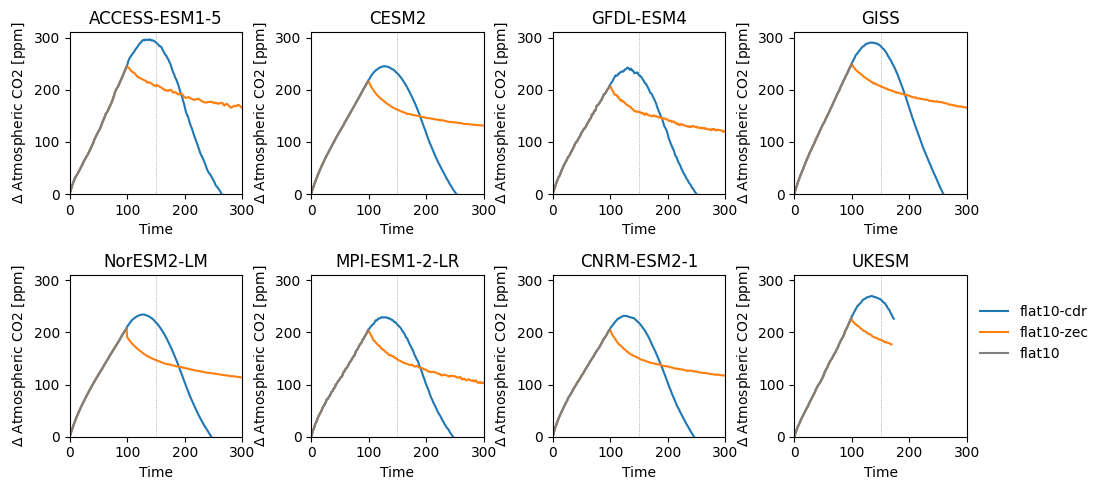

In [87]:
fig, axes = plt.subplots(2,4,figsize=(10, 5))
axes=axes.flatten()

for i,m in enumerate(mdls):
    axes[i].set_ylim([0,310])
    axes[i].set_xlim([0,300])
    axes[i].set_xticks([0,100,200,300])
    axes[i].set_xticklabels([0,100,200,300])
    axes[i].set_title(m)
    axes[i].set_ylabel("$\Delta$ Atmospheric CO2 [ppm]")
    axes[i].set_xlabel("Time")
    axes[i].plot(ed[m]['flat10-cdr']['co2']-ed[m]['flat10']['co2'][0], color="tab:blue", label="flat10-cdr")
    axes[i].plot(ed[m]['flat10-zec']['co2']-ed[m]['flat10']['co2'][0], color="tab:orange", label="flat10-zec")
    axes[i].plot(ed[m]['flat10']['co2'][:100]-ed[m]['flat10']['co2'][0], color="tab:gray", label="flat10")
    axes[i].axhline(0,color="black",lw=0.5)
    axes[i].axvline(150,lw=0.5,color="gray",linestyle=":")
plt.tight_layout()
#axes[].set_axis_off()
axes[7].legend(frameon=False, loc="upper left", bbox_to_anchor=(1.005, 0.89))

fig.subplots_adjust(wspace=0.4, hspace=0.5)


Atmospheric CO2 per scenario

In [88]:
mdls

['ACCESS-ESM1-5',
 'CESM2',
 'GFDL-ESM4',
 'GISS',
 'NorESM2-LM',
 'MPI-ESM1-2-LR',
 'CNRM-ESM2-1',
 'UKESM']

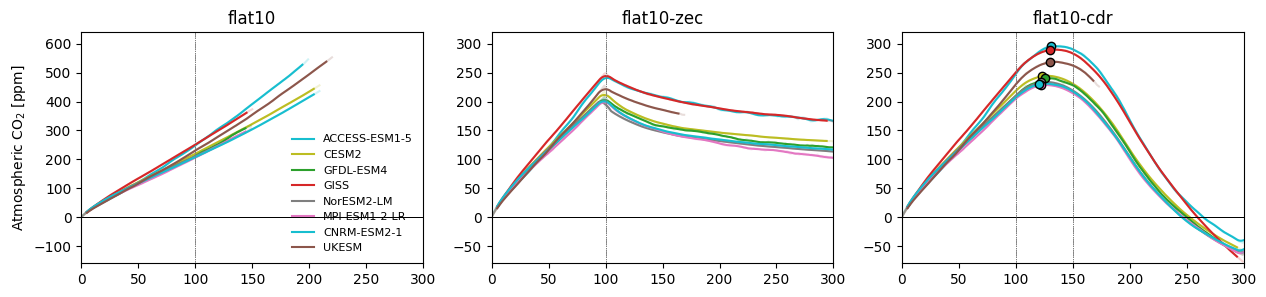

In [89]:


fig, axes = plt.subplots(1,3,figsize=(15, 3))
axes=axes.flatten()

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['co2'])-int(window/2))
    
    axes[0].set_title("flat10")
    axes[0].set_ylabel("Atmospheric CO$_2$ [ppm]")
    axes[0].set_ylim([-160,640])
    axes[0].set_xlim([0,300])
    axes[0].plot(ed[mdls[i]]['flat10']['co2']-ed[mdls[i]]['flat10']['co2'][0],alpha=0.2,color=colors[i])
    axes[0].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10']['co2']-ed[mdls[i]]['flat10']['co2'][0]),window),color=colors[i],label=mdls[i])

    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8})

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['co2'])-int(window/2))

    axes[1].set_title("flat10-zec")
    axes[1].set_ylim([-80,320])
    axes[1].set_xlim([0,300])
    axes[1].plot(ed[mdls[i]]['flat10-zec']['co2']-ed[mdls[i]]['flat10-zec']['co2'][0],alpha=0.2,color=colors[i])
    axes[1].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10-zec']['co2']-ed[mdls[i]]['flat10-zec']['co2'][0]),window),color=colors[i])

    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['co2'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    axes[2].set_ylim([-80,320])
    axes[2].set_xlim([0,300])
    axes[2].plot(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0],alpha=0.2,color=colors[i])
    axes[2].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window))
    mxyidx = np.where(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window)==mxy)[0]
    axes[2].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")


NBP per model

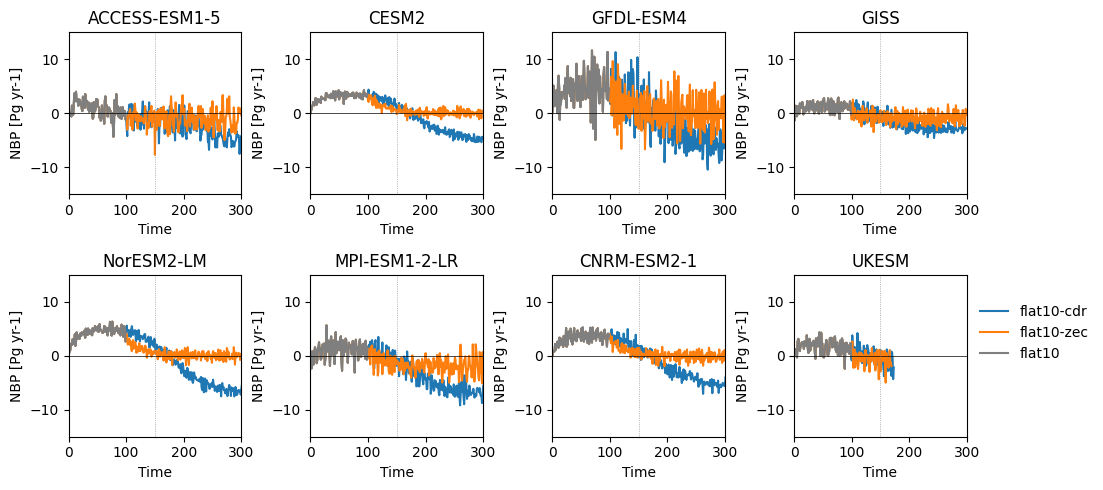

In [90]:
fig, axes = plt.subplots(2,4,figsize=(10, 5))
axes=axes.flatten()

for i,m in enumerate(mdls):
    axes[i].set_ylim([-15,15])
    axes[i].set_xlim([0,300])
    axes[i].set_xticks([0,100,200,300])
    axes[i].set_xticklabels([0,100,200,300])
    axes[i].set_title(m)
    axes[i].set_ylabel("NBP [Pg yr-1]")
    axes[i].set_xlabel("Time")
    axes[i].plot(ed[m]['flat10-cdr']['nbp']-ed[m]['flat10']['nbp'][0], color="tab:blue", label="flat10-cdr")
    axes[i].plot(ed[m]['flat10-zec']['nbp']-ed[m]['flat10']['nbp'][0], color="tab:orange", label="flat10-zec")
    axes[i].plot(ed[m]['flat10']['nbp'][:100]-ed[m]['flat10']['nbp'][0], color="tab:gray", label="flat10")
    axes[i].axhline(0,color="black",lw=0.5)
    axes[i].axvline(150,lw=0.5,color="gray",linestyle=":")
plt.tight_layout()
#axes[7].set_axis_off()
axes[7].legend(frameon=False, loc="upper left", bbox_to_anchor=(1.005, 0.89))

fig.subplots_adjust(wspace=0.4, hspace=0.5)

NBP per scenario

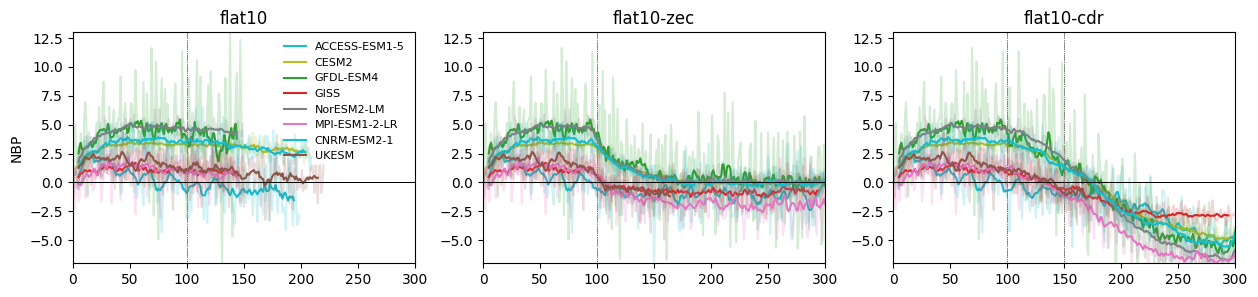

In [91]:

fig, axes = plt.subplots(1,3,figsize=(15, 3))
axes=axes.flatten()

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['nbp'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("NBP")
    axes[0].set_ylim([-7,13])
    axes[0].set_xlim([0,300])
    axes[0].plot(ed[mdls[i]]['flat10']['nbp']-ed[mdls[i]]['flat10']['nbp'][0],alpha=0.2,color=colors[i])
    axes[0].plot(time_ma,moving_average(ed[mdls[i]]['flat10']['nbp']-ed[mdls[i]]['flat10']['nbp'][0],window),color=colors[i],label=mdls[i])
    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8})

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['nbp'])-int(window/2))

    axes[1].set_title("flat10-zec")
    #axes[1].set_ylabel("NBP")
    axes[1].set_ylim([-7,13])
    axes[1].set_xlim([0,300])
    axes[1].plot(ed[mdls[i]]['flat10-zec']['nbp']-ed[mdls[i]]['flat10-zec']['nbp'][0],alpha=0.2,color=colors[i])
    axes[1].plot(time_ma,moving_average(ed[mdls[i]]['flat10-zec']['nbp']-ed[mdls[i]]['flat10-zec']['nbp'][0],window),color=colors[i])
    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['nbp'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    #axes[2].set_ylabel("NBP")
    axes[2].set_ylim([-7,13])
    axes[2].set_xlim([0,300])
    axes[2].plot(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0],alpha=0.2,color=colors[i])
    axes[2].plot(time_ma,moving_average(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0],window),color=colors[i])
    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")


Cumulative NBP per scenario

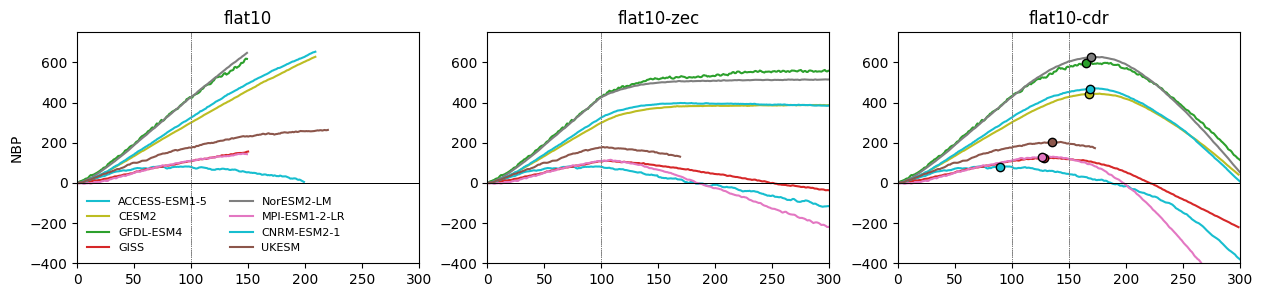

In [92]:

fig, axes = plt.subplots(1,3,figsize=(15, 3))
axes=axes.flatten()

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['nbp'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("NBP")
    axes[0].set_ylim([-400,750])
    axes[0].set_xlim([0,300])
    axes[0].plot(np.cumsum(ed[mdls[i]]['flat10']['nbp']-ed[mdls[i]]['flat10']['nbp'][0]),color=colors[i],label=mdls[i])
    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8},ncol=2)

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['nbp'])-int(window/2))

    axes[1].set_title("flat10-zec")
    axes[1].set_ylim([-400,750])
    axes[1].set_xlim([0,300])
    axes[1].plot(np.cumsum(ed[mdls[i]]['flat10-zec']['nbp']-ed[mdls[i]]['flat10-zec']['nbp'][0]),color=colors[i])
    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['nbp'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    axes[2].set_ylim([-400,750])
    axes[2].set_xlim([0,300])
    axes[2].plot(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0]),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0])),window))
    mxyidx = np.where(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0])),window)==mxy)[0]
    axes[2].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")


fgco2 per model

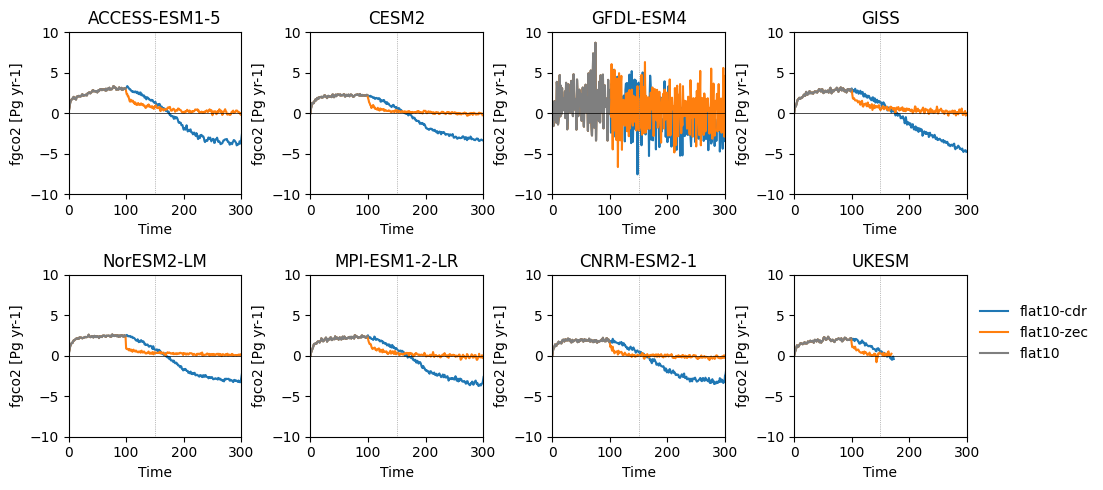

In [93]:
fig, axes = plt.subplots(2,4,figsize=(10, 5))
axes=axes.flatten()

for i,m in enumerate(mdls):
    axes[i].set_ylim([-10,10])
    axes[i].set_xlim([0,300])
    axes[i].set_xticks([0,100,200,300])
    axes[i].set_xticklabels([0,100,200,300])
    axes[i].set_title(m)
    axes[i].set_ylabel("fgco2 [Pg yr-1]")
    axes[i].set_xlabel("Time")
    axes[i].plot(ed[m]['flat10-cdr']['fgco2']-ed[m]['flat10']['fgco2'][0], color="tab:blue", label="flat10-cdr")
    axes[i].plot(ed[m]['flat10-zec']['fgco2']-ed[m]['flat10']['fgco2'][0], color="tab:orange", label="flat10-zec")
    axes[i].plot(ed[m]['flat10']['fgco2'][:100]-ed[m]['flat10']['fgco2'][0], color="tab:gray", label="flat10")
    axes[i].axhline(0,color="black",lw=0.5)
    axes[i].axvline(150,lw=0.5,color="gray",linestyle=":")
plt.tight_layout()
#axes[7].set_axis_off()
axes[7].legend(frameon=False, loc="upper left", bbox_to_anchor=(1.005, 0.89))

fig.subplots_adjust(wspace=0.4, hspace=0.5)

fgco2 per scenario

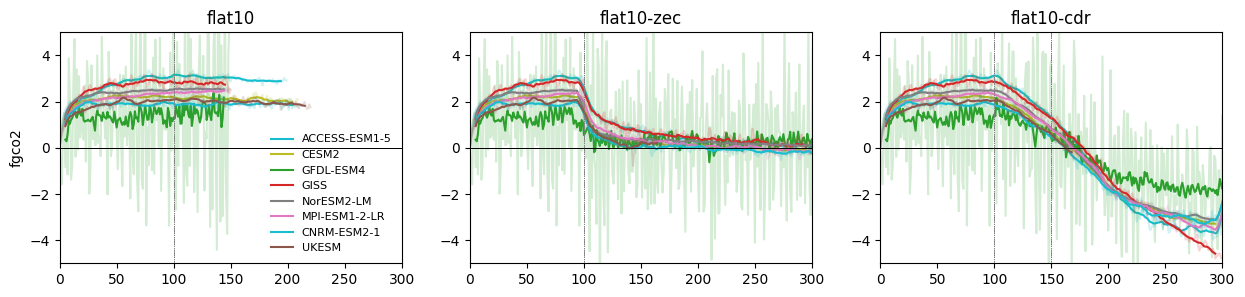

In [94]:

fig, axes = plt.subplots(1,3,figsize=(15, 3))
axes=axes.flatten()

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['fgco2'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("fgco2")
    axes[0].set_ylim([-5,5])
    axes[0].set_xlim([0,300])
    axes[0].plot(ed[mdls[i]]['flat10']['fgco2']-ed[mdls[i]]['flat10']['fgco2'][0],alpha=0.2,color=colors[i])
    axes[0].plot(time_ma,moving_average(ed[mdls[i]]['flat10']['fgco2']-ed[mdls[i]]['flat10']['fgco2'][0],window),color=colors[i],label=mdls[i])
    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8})

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['fgco2'])-int(window/2))

    axes[1].set_title("flat10-zec")
    #axes[1].set_ylabel("NBP")
    axes[1].set_ylim([-5,5])
    axes[1].set_xlim([0,300])
    axes[1].plot(ed[mdls[i]]['flat10-zec']['fgco2']-ed[mdls[i]]['flat10-zec']['fgco2'][0],alpha=0.2,color=colors[i])
    axes[1].plot(time_ma,moving_average(ed[mdls[i]]['flat10-zec']['fgco2']-ed[mdls[i]]['flat10-zec']['fgco2'][0],window),color=colors[i])
    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['fgco2'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    #axes[2].set_ylabel("NBP")
    axes[2].set_ylim([-5,5])
    axes[2].set_xlim([0,300])
    axes[2].plot(ed[mdls[i]]['flat10-cdr']['fgco2']-ed[mdls[i]]['flat10-cdr']['fgco2'][0],alpha=0.2,color=colors[i])
    axes[2].plot(time_ma,moving_average(ed[mdls[i]]['flat10-cdr']['fgco2']-ed[mdls[i]]['flat10-cdr']['fgco2'][0],window),color=colors[i])
    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")

cumulative fgco2 per scenario

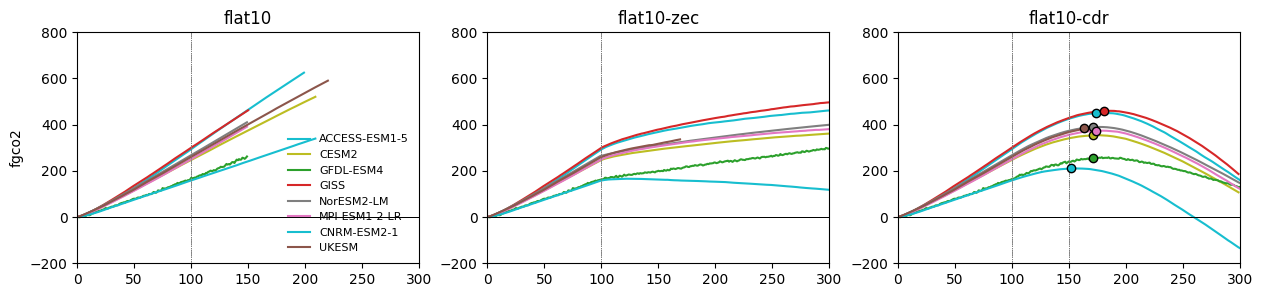

In [95]:

fig, axes = plt.subplots(1,3,figsize=(15, 3))
axes=axes.flatten()

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['fgco2'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("fgco2")
    axes[0].set_ylim([-200,800])
    axes[0].set_xlim([0,300])
    axes[0].plot(np.cumsum(ed[mdls[i]]['flat10']['fgco2']),color=colors[i],label=mdls[i])
    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8})

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['fgco2'])-int(window/2))

    axes[1].set_title("flat10-zec")
    axes[1].set_ylim([-200,800])
    axes[1].set_xlim([0,300])
    axes[1].plot(np.cumsum(ed[mdls[i]]['flat10-zec']['fgco2']),color=colors[i])
    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['fgco2'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    axes[2].set_ylim([-200,800])
    axes[2].set_xlim([0,300])
    axes[2].plot(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2']),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])),window))
    mxyidx = np.where(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])),window)==mxy)[0]
    axes[2].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")

Sink fractions

In [96]:
# extract absolute cumulative carbon balance (sinks) from components

# Atmosphere
dco2atm = np.zeros([3,len(mdls),300])
#dco2atm[0,:,150:] = np.nan
for i in np.arange(0,len(mdls)):
  lnzec=np.min([len(ed[mdls[i]]['flat10-zec']['co2'][1:][:]),299])
  lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),299])
  
  dco2atm[0,i,1:141] = np.cumsum(np.squeeze(np.array(ed[mdls[i]]['flat10']['co2'][1:][0:140]))-np.squeeze(np.array(ed[mdls[i]]['flat10']['co2'][0:-1][0:140])))
  dco2atm[1,i,1:(lnzec+1)] = np.cumsum(np.squeeze(np.array(ed[mdls[i]]['flat10-zec']['co2'][1:][0:lnzec]))-np.squeeze(np.array(ed[mdls[i]]['flat10-zec']['co2'][0:-1][0:lnzec])))
  dco2atm[2,i,1:(lncdr+1)] = np.cumsum(np.squeeze(np.array(ed[mdls[i]]['flat10-cdr']['co2'][1:][0:lncdr]))-np.squeeze(np.array(ed[mdls[i]]['flat10-cdr']['co2'][0:-1][0:lncdr])))

# Land
dcUPlnd = np.zeros([3,len(mdls),300])
#dcUPlnd[0,:,150:] = np.nan
for i in np.arange(0,len(mdls)):
  lnzec=np.min([len(ed[mdls[i]]['flat10-zec']['co2'][1:][:]),300])
  lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),300])
  print(lnzec)
  print(lncdr)
  dcUPlnd[0,i,0:140] = np.cumsum(np.squeeze(np.array((ed[mdls[i]]['flat10']['nbp']-ed[mdls[i]]['flat10']['nbp'][0])[0:140])))
  dcUPlnd[1,i,0:lnzec] = np.cumsum(np.squeeze(np.array((ed[mdls[i]]['flat10-zec']['nbp']-ed[mdls[i]]['flat10']['nbp'][0])[0:lnzec])))
  dcUPlnd[2,i,0:lncdr] = np.cumsum(np.squeeze(np.array((ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10']['nbp'][0])[0:lncdr])))

# Ocean
dcUPocn = np.zeros([3,len(mdls),300])
#dcUPocn[0,:,150:] = np.nan
for i in np.arange(0,len(mdls)):
  lnzec=np.min([len(ed[mdls[i]]['flat10-zec']['co2'][1:][:]),300])
  lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),300])
  dcUPocn[0,i,0:140] = np.cumsum(np.squeeze(np.array((ed[mdls[i]]['flat10']['fgco2']-ed[mdls[i]]['flat10']['fgco2'][0])[0:140])))
  dcUPocn[1,i,0:lnzec] = np.cumsum(np.squeeze(np.array((ed[mdls[i]]['flat10-zec']['fgco2']-ed[mdls[i]]['flat10']['fgco2'][0])[0:lnzec])))
  dcUPocn[2,i,0:lncdr] = np.cumsum(np.squeeze(np.array((ed[mdls[i]]['flat10-cdr']['fgco2']-ed[mdls[i]]['flat10']['fgco2'][0])[0:lncdr])))
  

300
300
299
299
300
300
299
299
300
300
300
300
300
300
169
173


Sink fractions per model

<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\D'
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/1167364579.py:23: SyntaxWarning: invalid escape sequence '\D'
  axes[0].set_ylabel("$\Delta$ cum. carbon sink")
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/1167364579.py:24: SyntaxWarning: invalid escape sequence '\D'
  axes[3].set_ylabel("$\Delta$ cum. carbon sink")


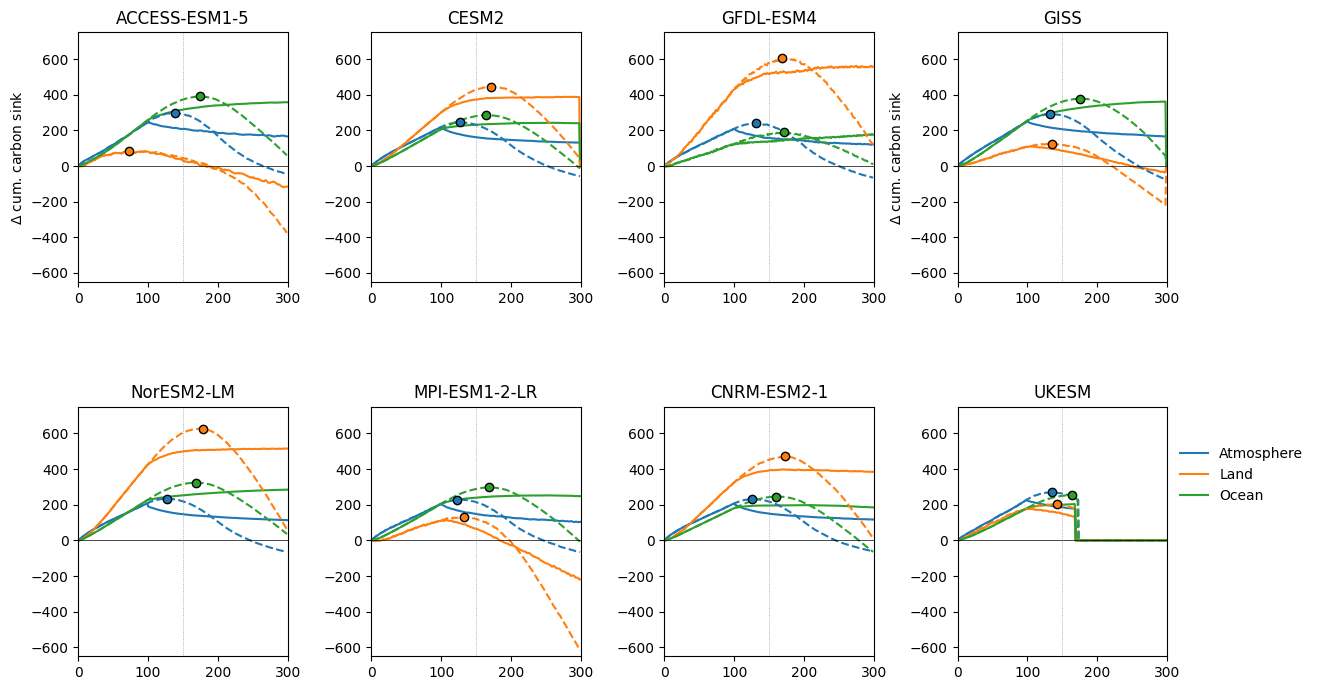

In [97]:
# cumulative carbon sinks for components and flat-zec (solid) and flat-cdr (dashed)

fig, axes = plt.subplots(2,4,figsize=(12, 7))
axes=axes.flatten()

for i,m in enumerate(mdls):
    axes[i].set_title(m)
    axes[i].set_ylim(-650,750)
    axes[i].set_xlim(0,300)
    axes[i].plot(dco2atm[1,i,:],color="tab:blue",label='Atmosphere')
    axes[i].plot(dcUPlnd[1,i,:],color="tab:orange",label='Land')
    axes[i].plot(dcUPocn[1,i,:],color="tab:green",label='Ocean')
    axes[i].plot(dco2atm[2,i,:],color="tab:blue",linestyle="--")
    axes[i].plot(dcUPlnd[2,i,:],color="tab:orange",linestyle="--")
    axes[i].plot(dcUPocn[2,i,:],color="tab:green",linestyle="--")
    axes[i].axhline(0,color="black",lw=0.5)
    axes[i].axvline(150,lw=0.5,color="gray",linestyle=":")

    axes[i].scatter(np.where(dco2atm[2,i,:]==np.max(dco2atm[2,i,:]))[0], np.max(dco2atm[2,i,:]), color="tab:blue", edgecolor="black", zorder=4)
    axes[i].scatter(np.where(dcUPlnd[2,i,:]==np.max(dcUPlnd[2,i,:]))[0], np.max(dcUPlnd[2,i,:]), color="tab:orange", edgecolor="black", zorder=4)
    axes[i].scatter(np.where(dcUPocn[2,i,:]==np.max(dcUPocn[2,i,:]))[0], np.max(dcUPocn[2,i,:]), color="tab:green", edgecolor="black", zorder=4)

axes[0].set_ylabel("$\Delta$ cum. carbon sink")
axes[3].set_ylabel("$\Delta$ cum. carbon sink")
plt.tight_layout()
#axes[7].set_axis_off()
axes[7].legend(frameon=False, loc="upper left", bbox_to_anchor=(1.005, 0.89))

fig.subplots_adjust(wspace=0.4, hspace=0.5)

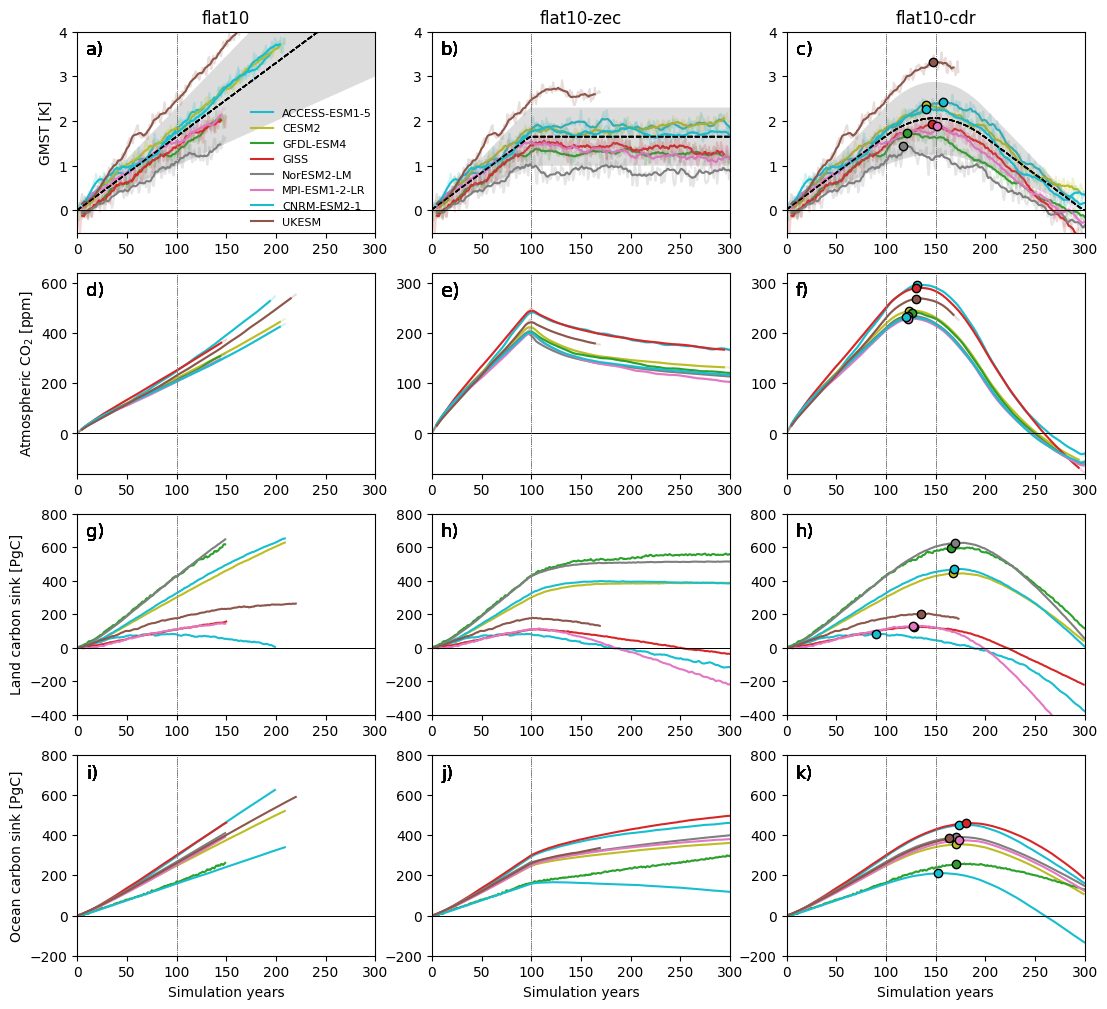

In [98]:

fig, axes = plt.subplots(4,3,figsize=(13, 12))
axes=axes.flatten()

### Temperature
for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['tas'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("GMST [K]")
    axes[0].set_ylim([-0.5,4])
    axes[0].set_xlim([0,300])
    axes[0].plot(ed[mdls[i]]['flat10']['tas'],alpha=0.2,color=colors[i])
    axes[0].plot(time_ma,moving_average(ed[mdls[i]]['flat10']['tas'],window),color=colors[i],label=mdls[i])

    axes[0].plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--")
    axes[0].fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.035, edgecolor="none")

    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8}, bbox_to_anchor=(0.55, 0.67))
    axes[0].annotate('a)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['tas'])-int(window/2))

    axes[1].set_title("flat10-zec")
    axes[1].set_ylim([-0.5,4])
    axes[1].set_xlim([0,300])
    axes[1].plot(ed[mdls[i]]['flat10-zec']['tas'],alpha=0.2,color=colors[i])
    axes[1].plot(time_ma,moving_average(ed[mdls[i]]['flat10-zec']['tas'],window),color=colors[i])

    axes[1].plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
    axes[1].fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_zec)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_zec)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[1].annotate('b)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['tas'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    axes[2].set_ylim([-0.5,4])
    axes[2].set_xlim([0,300])
    axes[2].plot(ed[mdls[i]]['flat10-cdr']['tas'],alpha=0.2,color=colors[i])
    axes[2].plot(time_ma,moving_average(ed[mdls[i]]['flat10-cdr']['tas'],window),color=colors[i])

    axes[2].plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
    axes[2].fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_cdr)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_cdr)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']),window))
    mxyidx = np.where(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']),window)==mxy)[0]
    axes[2].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")
    axes[2].annotate('c)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

### Atmospheric CO2
for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['co2'])-int(window/2))

    #axes[3].set_title("flat10")
    axes[3].set_ylabel("Atmospheric CO$_2$ [ppm]")
    axes[3].set_ylim([-160,640])
    axes[3].set_xlim([0,300])
    axes[3].plot(ed[mdls[i]]['flat10']['co2']-ed[mdls[i]]['flat10']['co2'][0],alpha=0.2,color=colors[i])
    axes[3].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10']['co2']-ed[mdls[i]]['flat10']['co2'][0]),window),color=colors[i],label=mdls[i])

    axes[3].axhline(0,lw=0.5,color="black")
    axes[3].axvline(100,lw=0.5,color="gray",linestyle=":")
    #axes[3].legend(frameon=False, prop={'size': 8})
    axes[3].annotate('d)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['co2'])-int(window/2))

    #axes[4].set_title("flat10-zec")
    axes[4].set_ylim([-80,320])
    axes[4].set_xlim([0,300])
    axes[4].plot(ed[mdls[i]]['flat10-zec']['co2']-ed[mdls[i]]['flat10-zec']['co2'][0],alpha=0.2,color=colors[i])
    axes[4].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10-zec']['co2']-ed[mdls[i]]['flat10-zec']['co2'][0]),window),color=colors[i])

    axes[4].axhline(0,lw=0.5,color="black")
    axes[4].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[4].annotate('e)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=14, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['co2'])-int(window/2))

    #axes[5].set_title("flat10-cdr")
    axes[5].set_ylim([-80,320])
    axes[5].set_xlim([0,300])
    axes[5].plot(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0],alpha=0.2,color=colors[i])
    axes[5].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window))
    mxyidx = np.where(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window)==mxy)[0]
    axes[5].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[5].axhline(0,lw=0.5,color="black")
    axes[5].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[5].axvline(150,lw=0.5,color="gray",linestyle=":")
    axes[5].annotate('f)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

### Land carbon
for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['nbp'])-int(window/2))

    #axes[6].set_title("flat10")
    axes[6].set_ylabel("Land carbon sink [PgC]")
    axes[6].set_ylim([-400,800])
    axes[6].set_xlim([0,300])
    axes[6].plot(np.cumsum(ed[mdls[i]]['flat10']['nbp']-ed[mdls[i]]['flat10']['nbp'][0]),color=colors[i],label=mdls[i])
    axes[6].axhline(0,lw=0.5,color="black")
    axes[6].axvline(100,lw=0.5,color="gray",linestyle=":")
    #axes[6].legend(frameon=False, prop={'size': 8},ncol=2)
    axes[6].annotate('g)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['nbp'])-int(window/2))

    #axes[7].set_title("flat10-zec")
    axes[7].set_ylim([-400,800])
    axes[7].set_xlim([0,300])
    axes[7].plot(np.cumsum(ed[mdls[i]]['flat10-zec']['nbp']-ed[mdls[i]]['flat10-zec']['nbp'][0]),color=colors[i])
    axes[7].axhline(0,lw=0.5,color="black")
    axes[7].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[7].annotate('h)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['nbp'])-int(window/2))

    #axes[8].set_title("flat10-cdr")
    axes[8].set_ylim([-400,800])
    axes[8].set_xlim([0,300])
    axes[8].plot(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0]),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0])),window))
    mxyidx = np.where(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0])),window)==mxy)[0]
    axes[8].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[8].axhline(0,lw=0.5,color="black")
    axes[8].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[8].axvline(150,lw=0.5,color="gray",linestyle=":")
    axes[8].annotate('h)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

### Ocean carbon
for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['fgco2'])-int(window/2))

    #axes[9].set_title("flat10")
    axes[9].set_xlabel("Simulation years")
    axes[9].set_ylabel("Ocean carbon sink [PgC]")
    axes[9].set_ylim([-200,800])
    axes[9].set_xlim([0,300])
    axes[9].plot(np.cumsum(ed[mdls[i]]['flat10']['fgco2']),color=colors[i],label=mdls[i])
    axes[9].axhline(0,lw=0.5,color="black")
    axes[9].axvline(100,lw=0.5,color="gray",linestyle=":")
    #axes[9].legend(frameon=False, prop={'size': 8})
    axes[9].annotate('i)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['fgco2'])-int(window/2))

    #axes[10].set_title("flat10-zec")
    axes[10].set_xlabel("Simulation years")
    axes[10].set_ylim([-200,800])
    axes[10].set_xlim([0,300])
    axes[10].plot(np.cumsum(ed[mdls[i]]['flat10-zec']['fgco2']),color=colors[i])
    axes[10].axhline(0,lw=0.5,color="black")
    axes[10].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[10].annotate('j)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['fgco2'])-int(window/2))

    #axes[11].set_title("flat10-cdr")
    axes[11].set_xlabel("Simulation years")
    axes[11].set_ylim([-200,800])
    axes[11].set_xlim([0,300])
    axes[11].plot(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2']),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])),window))
    mxyidx = np.where(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])),window)==mxy)[0]
    axes[11].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[11].axhline(0,lw=0.5,color="black")
    axes[11].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[11].axvline(150,lw=0.5,color="gray",linestyle=":")
    axes[11].annotate('k)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

fig.subplots_adjust(wspace=0.19, hspace=0.2)
plt.savefig("images/flat10_ESM_results_panel.pdf", bbox_inches='tight')
plt.savefig("images/flat10_ESM_results_panel.jpg", bbox_inches='tight')


Hysteresis plots

<>:37: SyntaxWarning: invalid escape sequence '\D'
<>:37: SyntaxWarning: invalid escape sequence '\D'
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/3264533233.py:37: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ concentration [ppm]")


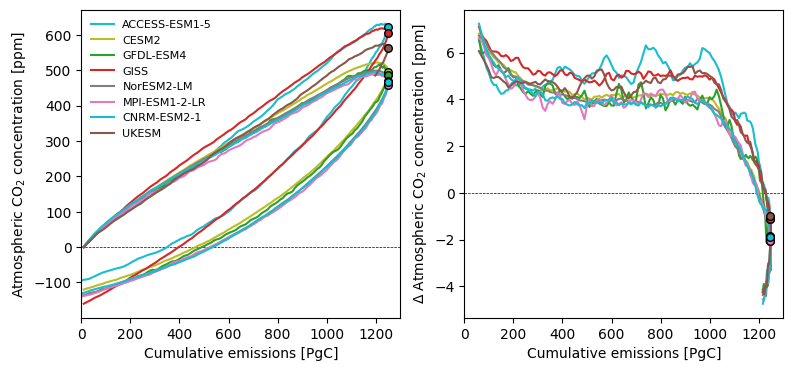

In [99]:
#colors=["tab:blue","tab:orange","tab:green","tab:red","tab:gray","tab:purple",]
#window=11

fig = plt.figure(figsize=(14,4))

sub = fig.add_subplot(1, 3, 1)

sub.set_xlim(0,1300)
sub.set_xlabel("Cumulative emissions [PgC]")
sub.set_ylabel("Atmospheric CO$_2$ concentration [ppm]")
# ESMs
for i in np.arange(0,len(mdls)):
    lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),300])

    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:lncdr], ed[mdls[i]]['flat10-cdr']['C_atm'][0:lncdr], color=colors[i], label=mdls[i])
    sub.scatter(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[149], ed[mdls[i]]['flat10-cdr']['C_atm'][149], color=colors[i], s=30, edgecolor="black", zorder=4)
# SCMs
#sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300], np.percentile(ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr"),50,1)[0:300]-np.percentile(ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr"),50,1)[0])
#sub.fill_between(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300],
#                 np.percentile(ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr"),5,1)[0:300]-np.percentile(ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr"),5,1)[0],
#                 np.percentile(ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr"),95,1)[0:300]-np.percentile(ds_fair.co2_concentration.sel(scenario="esm-flat10_cdr"),95,1)[0], alpha=0.3)
#sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300], np.percentile(ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr"),50,0)[0:300]-np.percentile(ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr"),50,0)[0])
#sub.fill_between(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300],
#                 np.percentile(ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr"),5,0)[0:300]-np.percentile(ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr"),5,0)[0],
#                 np.percentile(ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr"),95,0)[0:300]-np.percentile(ds_magicc.co2_concentration.sel(scenario="esm-flat10_cdr"),95,0)[0], alpha=0.3)
#sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300], np.percentile(ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr"),50,1)[0:300]-np.percentile(ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr"),50,1)[0])
#sub.fill_between(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300],
#                 np.percentile(ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr"),5,1)[0:300]-np.percentile(ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr"),5,1)[0],
#                 np.percentile(ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr"),95,1)[0:300]-np.percentile(ds_cicero.co2_concentration.sel(scenario="esm-flat10_cdr"),95,1)[0], alpha=0.3)
sub.legend(frameon=False, prop={'size': 8})
sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

sub = fig.add_subplot(1, 3, 2)

sub.set_xlim(0,1300)
sub.set_xlabel("Cumulative emissions [PgC]")
sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ concentration [ppm]")
for i in np.arange(0,len(mdls)):
    sub.plot(moving_average(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:lncdr],window), moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['C_atm'].diff('year')[0:lncdr]),window), color=colors[i])
    sub.scatter(moving_average(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:lncdr],window)[139], moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['C_atm'].diff('year')[0:lncdr]),window)[139], color=colors[i], s=30, edgecolor="black", zorder=4)
sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

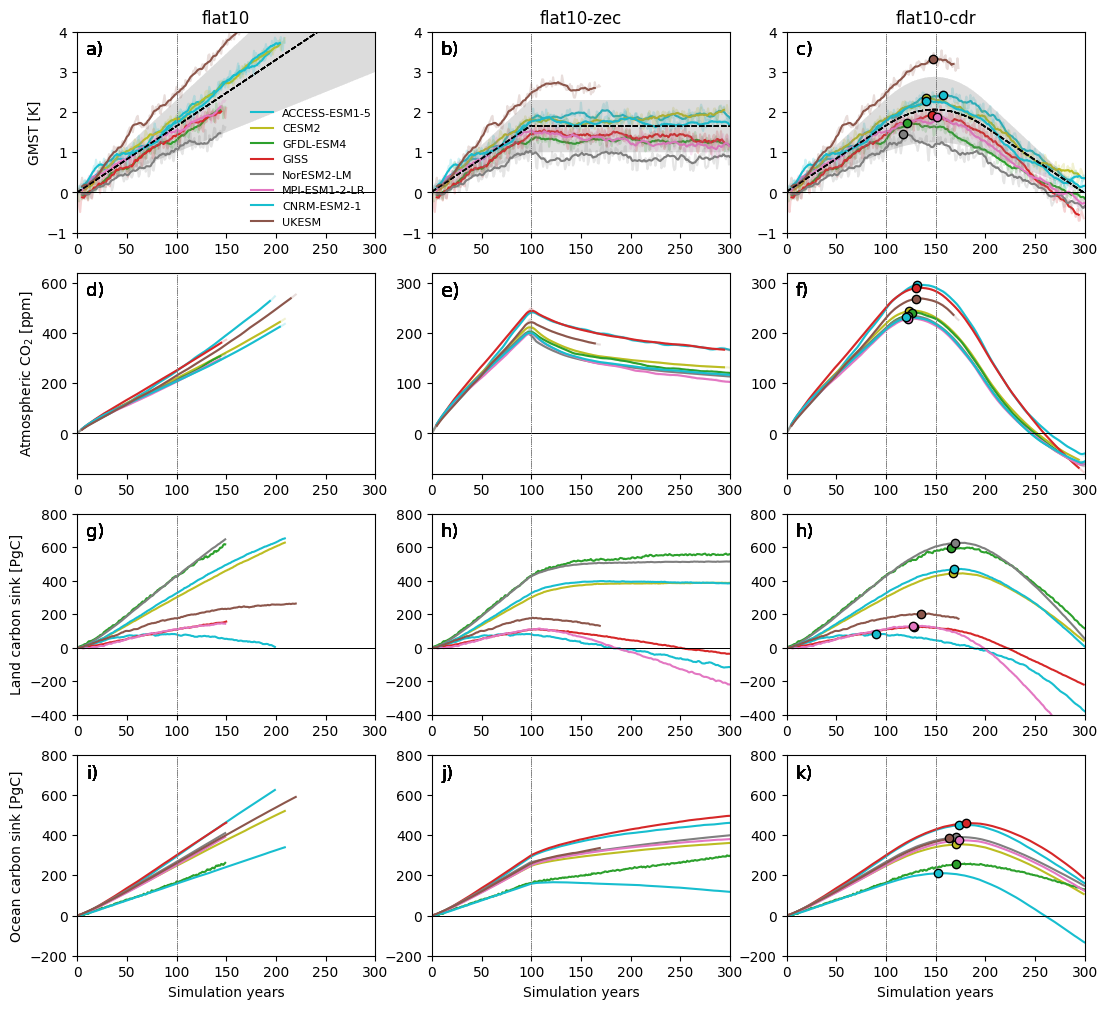

In [100]:
fig, axes = plt.subplots(4,3,figsize=(13, 12))
axes=axes.flatten()

### Temperature
for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['tas'])-int(window/2))

    axes[0].set_title("flat10")
    axes[0].set_ylabel("GMST [K]")
    axes[0].set_ylim([-1,4])
    axes[0].set_xlim([0,300])
    axes[0].plot(ed[mdls[i]]['flat10']['tas'],alpha=0.2,color=colors[i])
    axes[0].plot(time_ma,moving_average(ed[mdls[i]]['flat10']['tas'],window),color=colors[i],label=mdls[i])

    axes[0].plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--")
    axes[0].fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.035, edgecolor="none")

    axes[0].axhline(0,lw=0.5,color="black")
    axes[0].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[0].legend(frameon=False, prop={'size': 8}, bbox_to_anchor=(0.55, 0.67))
    axes[0].annotate('a)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['tas'])-int(window/2))

    axes[1].set_title("flat10-zec")
    axes[1].set_ylim([-1,4])
    axes[1].set_xlim([0,300])
    axes[1].plot(ed[mdls[i]]['flat10-zec']['tas'],alpha=0.2,color=colors[i])
    axes[1].plot(time_ma,moving_average(ed[mdls[i]]['flat10-zec']['tas'],window),color=colors[i])

    axes[1].plot(np.cumsum(np.array(e_flat10_zec)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
    axes[1].fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_zec)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_zec)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

    axes[1].axhline(0,lw=0.5,color="black")
    axes[1].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[1].annotate('b)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['tas'])-int(window/2))

    axes[2].set_title("flat10-cdr")
    axes[2].set_ylim([-1,4])
    axes[2].set_xlim([0,300])
    axes[2].plot(ed[mdls[i]]['flat10-cdr']['tas'],alpha=0.2,color=colors[i])
    axes[2].plot(time_ma,moving_average(ed[mdls[i]]['flat10-cdr']['tas'],window),color=colors[i])

    axes[2].plot(np.cumsum(np.array(e_flat10_cdr)[:,1])*1.65/1000, lw=1, color='black', linestyle="--")
    axes[2].fill_between(np.arange(0,320), np.cumsum(np.array(e_flat10_cdr)[:,1])*1.0/1000, np.cumsum(np.array(e_flat10_cdr)[:,1])*2.3/1000, lw=2, color="gray", alpha=0.035, edgecolor="none", zorder=2)

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']),window))
    mxyidx = np.where(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']),window)==mxy)[0]
    axes[2].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[2].axhline(0,lw=0.5,color="black")
    axes[2].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[2].axvline(150,lw=0.5,color="gray",linestyle=":")
    axes[2].annotate('c)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

### Atmospheric CO2
for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['co2'])-int(window/2))

    #axes[3].set_title("flat10")
    axes[3].set_ylabel("Atmospheric CO$_2$ [ppm]")
    axes[3].set_ylim([-160,640])
    axes[3].set_xlim([0,300])
    axes[3].plot(ed[mdls[i]]['flat10']['co2']-ed[mdls[i]]['flat10']['co2'][0],alpha=0.2,color=colors[i])
    axes[3].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10']['co2']-ed[mdls[i]]['flat10']['co2'][0]),window),color=colors[i],label=mdls[i])

    axes[3].axhline(0,lw=0.5,color="black")
    axes[3].axvline(100,lw=0.5,color="gray",linestyle=":")
    #axes[3].legend(frameon=False, prop={'size': 8})
    axes[3].annotate('d)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['co2'])-int(window/2))

    #axes[4].set_title("flat10-zec")
    axes[4].set_ylim([-80,320])
    axes[4].set_xlim([0,300])
    axes[4].plot(ed[mdls[i]]['flat10-zec']['co2']-ed[mdls[i]]['flat10-zec']['co2'][0],alpha=0.2,color=colors[i])
    axes[4].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10-zec']['co2']-ed[mdls[i]]['flat10-zec']['co2'][0]),window),color=colors[i])

    axes[4].axhline(0,lw=0.5,color="black")
    axes[4].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[4].annotate('e)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=14, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['co2'])-int(window/2))

    #axes[5].set_title("flat10-cdr")
    axes[5].set_ylim([-80,320])
    axes[5].set_xlim([0,300])
    axes[5].plot(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0],alpha=0.2,color=colors[i])
    axes[5].plot(time_ma,moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window))
    mxyidx = np.where(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['co2']-ed[mdls[i]]['flat10-cdr']['co2'][0]),window)==mxy)[0]
    axes[5].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[5].axhline(0,lw=0.5,color="black")
    axes[5].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[5].axvline(150,lw=0.5,color="gray",linestyle=":")
    axes[5].annotate('f)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

### Land carbon
for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['nbp'])-int(window/2))

    #axes[6].set_title("flat10")
    axes[6].set_ylabel("Land carbon sink [PgC]")
    axes[6].set_ylim([-400,800])
    axes[6].set_xlim([0,300])
    axes[6].plot(np.cumsum(ed[mdls[i]]['flat10']['nbp']-ed[mdls[i]]['flat10']['nbp'][0]),color=colors[i],label=mdls[i])
    axes[6].axhline(0,lw=0.5,color="black")
    axes[6].axvline(100,lw=0.5,color="gray",linestyle=":")
    #axes[6].legend(frameon=False, prop={'size': 8},ncol=2)
    axes[6].annotate('g)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['nbp'])-int(window/2))

    #axes[7].set_title("flat10-zec")
    axes[7].set_ylim([-400,800])
    axes[7].set_xlim([0,300])
    axes[7].plot(np.cumsum(ed[mdls[i]]['flat10-zec']['nbp']-ed[mdls[i]]['flat10-zec']['nbp'][0]),color=colors[i])
    axes[7].axhline(0,lw=0.5,color="black")
    axes[7].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[7].annotate('h)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['nbp'])-int(window/2))

    #axes[8].set_title("flat10-cdr")
    axes[8].set_ylim([-400,800])
    axes[8].set_xlim([0,300])
    axes[8].plot(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0]),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0])),window))
    mxyidx = np.where(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp']-ed[mdls[i]]['flat10-cdr']['nbp'][0])),window)==mxy)[0]
    axes[8].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[8].axhline(0,lw=0.5,color="black")
    axes[8].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[8].axvline(150,lw=0.5,color="gray",linestyle=":")
    axes[8].annotate('h)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

### Ocean carbon
for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10']['fgco2'])-int(window/2))

    #axes[9].set_title("flat10")
    axes[9].set_xlabel("Simulation years")
    axes[9].set_ylabel("Ocean carbon sink [PgC]")
    axes[9].set_ylim([-200,800])
    axes[9].set_xlim([0,300])
    axes[9].plot(np.cumsum(ed[mdls[i]]['flat10']['fgco2']),color=colors[i],label=mdls[i])
    axes[9].axhline(0,lw=0.5,color="black")
    axes[9].axvline(100,lw=0.5,color="gray",linestyle=":")
    #axes[9].legend(frameon=False, prop={'size': 8})
    axes[9].annotate('i)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['fgco2'])-int(window/2))

    #axes[10].set_title("flat10-zec")
    axes[10].set_xlabel("Simulation years")
    axes[10].set_ylim([-200,800])
    axes[10].set_xlim([0,300])
    axes[10].plot(np.cumsum(ed[mdls[i]]['flat10-zec']['fgco2']),color=colors[i])
    axes[10].axhline(0,lw=0.5,color="black")
    axes[10].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[10].annotate('j)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

for i in np.arange(0,len(mdls)):
    #window =  11
    time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-cdr']['fgco2'])-int(window/2))

    #axes[11].set_title("flat10-cdr")
    axes[11].set_xlabel("Simulation years")
    axes[11].set_ylim([-200,800])
    axes[11].set_xlim([0,300])
    axes[11].plot(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2']),color=colors[i])

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])),window))
    mxyidx = np.where(moving_average(np.squeeze(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])),window)==mxy)[0]
    axes[11].scatter(mxyidx,mxy,color=colors[i], edgecolor="black", zorder=4)

    axes[11].axhline(0,lw=0.5,color="black")
    axes[11].axvline(100,lw=0.5,color="gray",linestyle=":")
    axes[11].axvline(150,lw=0.5,color="gray",linestyle=":")
    axes[11].annotate('k)', xy=(0.03, 0.91), xycoords='axes fraction', fontsize=13, ha='left', va='center')

fig.subplots_adjust(wspace=0.19, hspace=0.2)
plt.savefig("images/flat10_ESM_results_panel.pdf", bbox_inches='tight')
plt.savefig("images/flat10_ESM_results_panel.jpg", bbox_inches='tight')

#### Hysteresis plots

Temperature

<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/2688269277.py:15: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ GMST [K]")


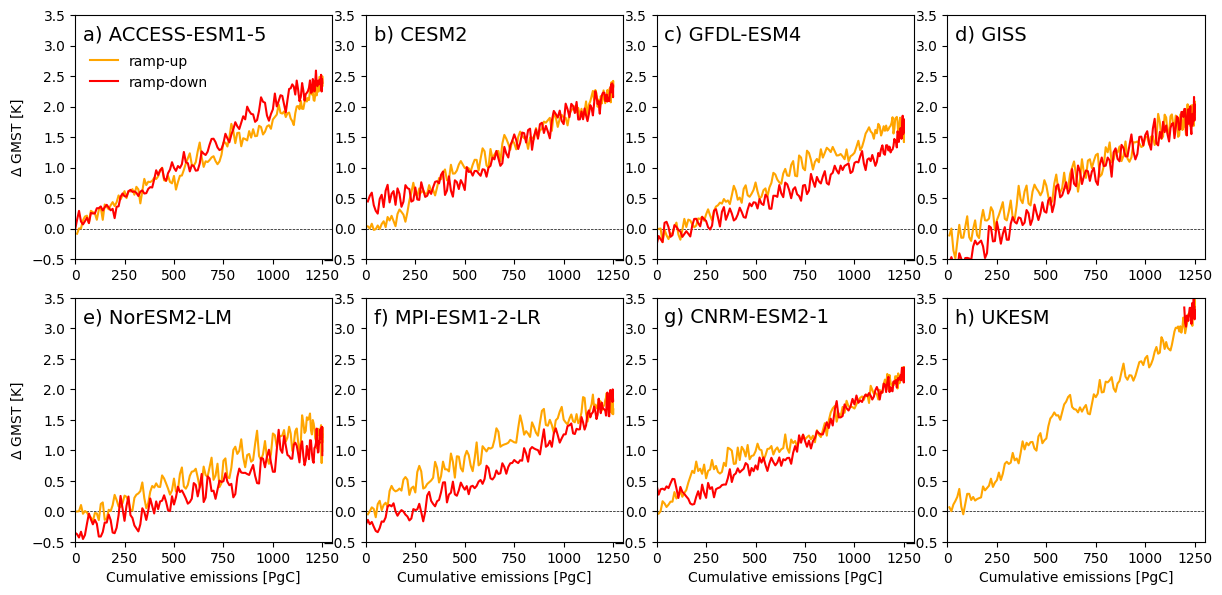

In [101]:
fls = ['a)','b)','c)','d)','e)','f)','g)','h)']

##window=21

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 4, i+1)
    lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),300])

    #sub.set_title(mdls[i])
    if i in (4, 5, 6,7):
        sub.set_xlabel("Cumulative emissions [PgC]")
    if i in (0, 4):
        sub.set_ylabel("$\Delta$ GMST [K]")
    sub.set_ylim(-0.5,3.5)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], ed[mdls[i]]['flat10-cdr']['tas'][0:150], color="orange", label='ramp-up')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:lncdr], ed[mdls[i]]['flat10-cdr']['tas'][150:lncdr], color="red", label='ramp-down')
    if i==0:
        sub.legend(frameon=False, loc="upper left", prop={'size': 10}, bbox_to_anchor=(0.01, 0.89))
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
    sub.annotate(fls[i]+" "+mdls[i], xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

plt.tight_layout()


Atmospheric CO2

<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/2844973408.py:11: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Atmospheric CO2")


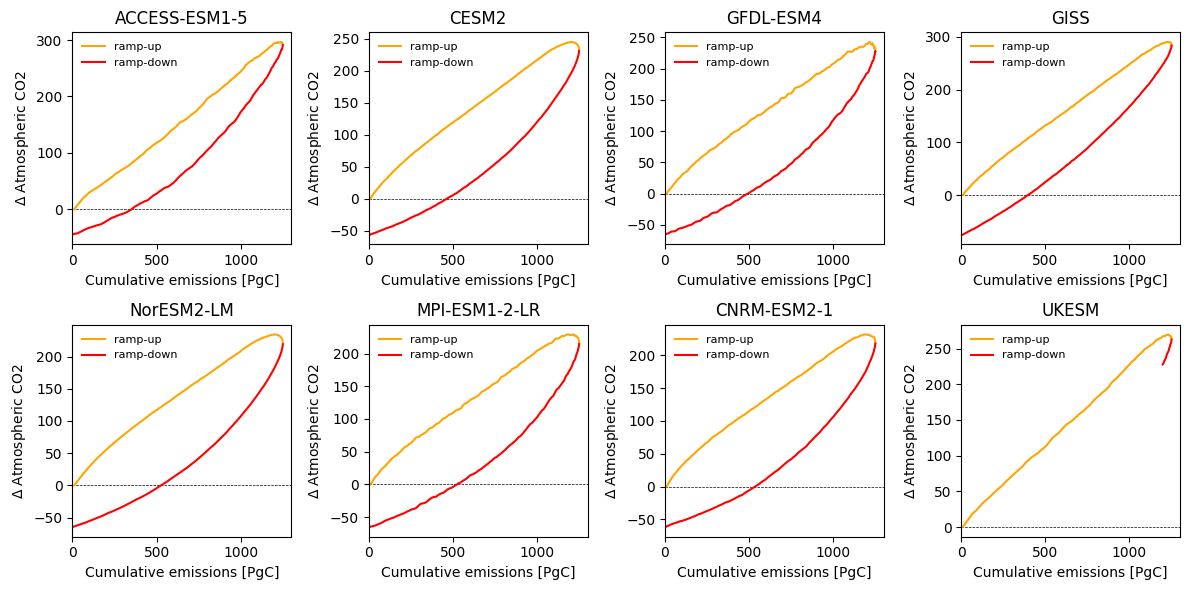

In [102]:
#window=11

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 4, i+1)
    lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),300])

    sub.set_title(mdls[i])
    sub.set_xlabel("Cumulative emissions [PgC]")
    sub.set_ylabel("$\Delta$ Atmospheric CO2")
    #sub.set_ylim(-0.5,3)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], ed[mdls[i]]['flat10-cdr']['co2'][0:150]-ed[mdls[i]]['flat10-cdr']['co2'][0], color="orange", label='ramp-up')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:lncdr], ed[mdls[i]]['flat10-cdr']['co2'][150:lncdr]-ed[mdls[i]]['flat10-cdr']['co2'][0], color="red", label='ramp-down')
    sub.legend(frameon=False, prop={'size': 8})
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

plt.tight_layout()

NBP

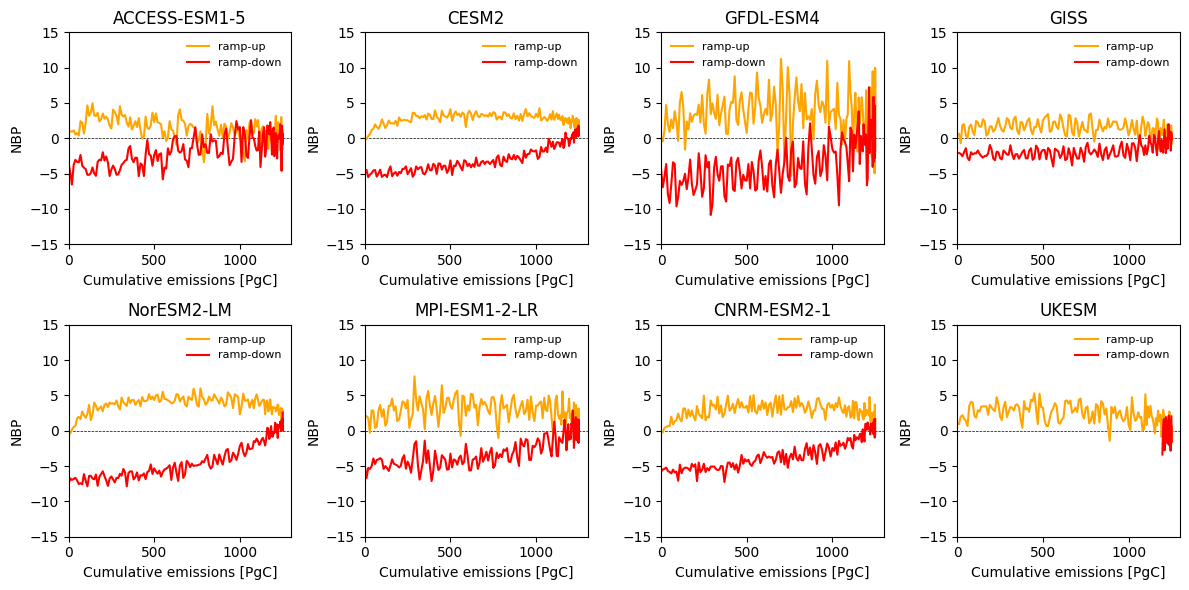

In [103]:
#window=11

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 4, i+1)
    lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),300])

    sub.set_title(mdls[i])
    sub.set_xlabel("Cumulative emissions [PgC]")
    sub.set_ylabel("NBP")
    sub.set_ylim(-15,15)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], ed[mdls[i]]['flat10-cdr']['nbp'][0:150], color="orange", label='ramp-up')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:lncdr], ed[mdls[i]]['flat10-cdr']['nbp'][150:lncdr], color="red", label='ramp-down')
    sub.legend(frameon=False, prop={'size': 8})
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

plt.tight_layout()


Cumulative NBP

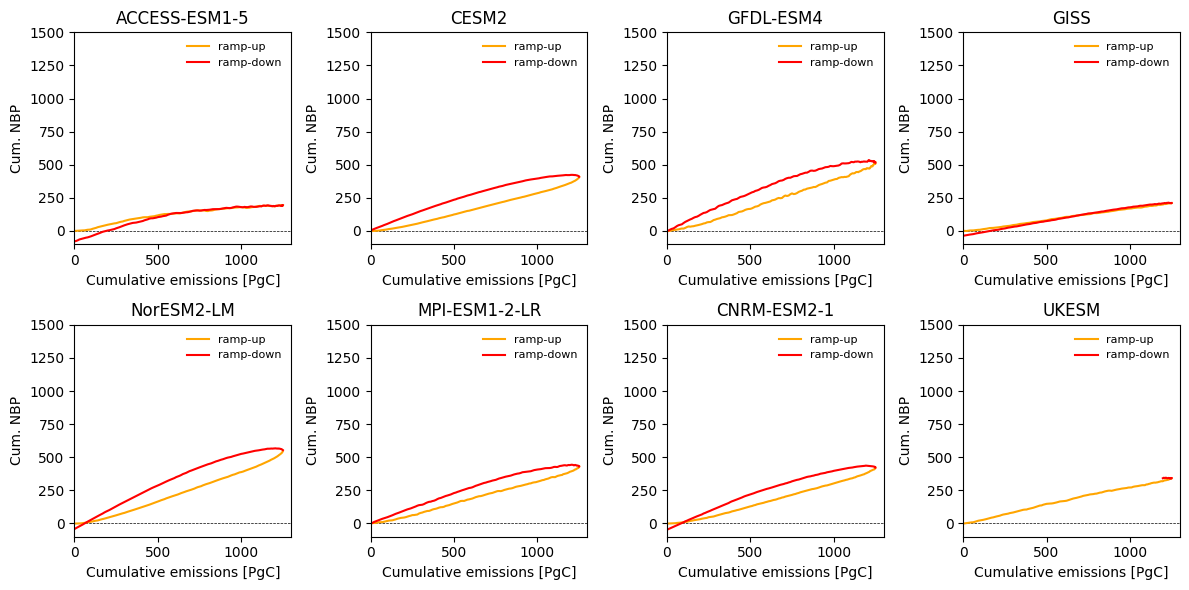

In [104]:
#window=11

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 4, i+1)
    lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),300])

    sub.set_title(mdls[i])
    sub.set_xlabel("Cumulative emissions [PgC]")
    sub.set_ylabel("Cum. NBP")
    sub.set_ylim(-100,1500)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[0:150], color="orange", label='ramp-up')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:lncdr], np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[150:lncdr], color="red", label='ramp-down')
    sub.legend(frameon=False, prop={'size': 8})
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

plt.tight_layout()


fgco2

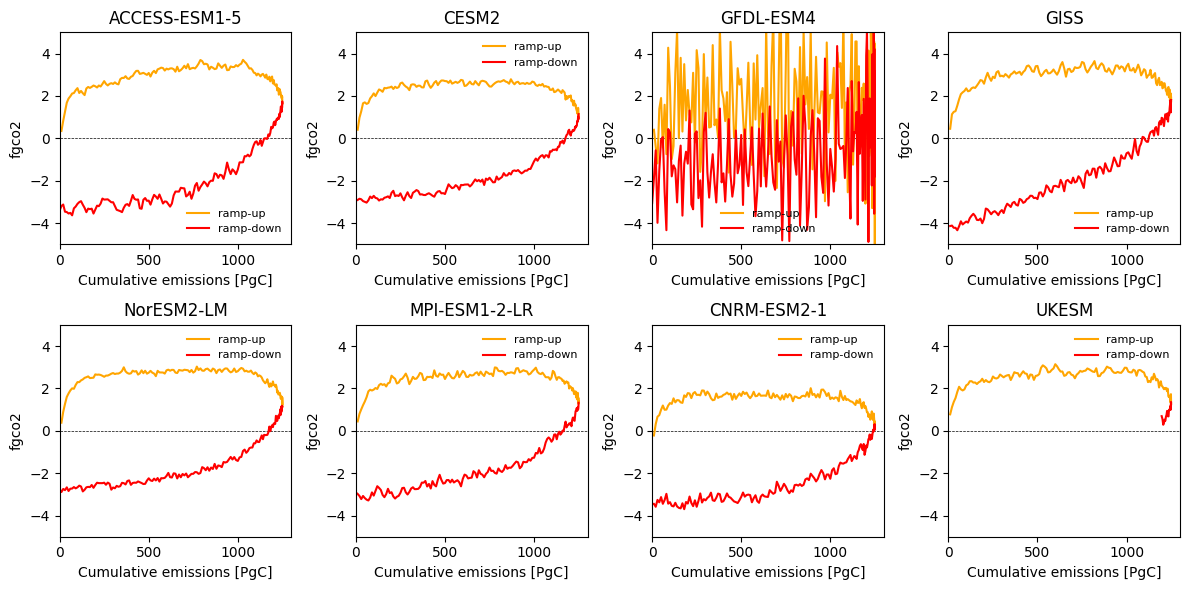

In [105]:
#window=11

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 4, i+1)
    lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),300])

    sub.set_title(mdls[i])
    sub.set_xlabel("Cumulative emissions [PgC]")
    sub.set_ylabel("fgco2")
    sub.set_ylim(-5,5)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], ed[mdls[i]]['flat10-cdr']['fgco2'][0:150], color="orange", label='ramp-up')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:lncdr], ed[mdls[i]]['flat10-cdr']['fgco2'][150:lncdr], color="red", label='ramp-down')
    sub.legend(frameon=False, prop={'size': 8})
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

plt.tight_layout()


cumulative fgco2

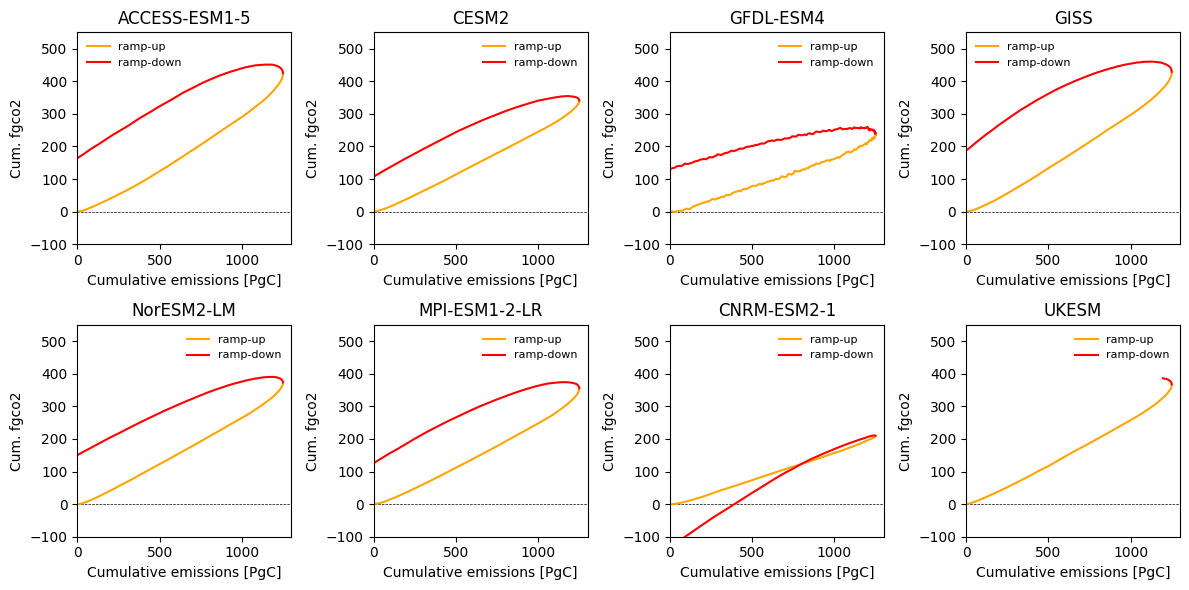

In [106]:
#window=11

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 4, i+1)
    lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),300])

    sub.set_title(mdls[i])
    sub.set_xlabel("Cumulative emissions [PgC]")
    sub.set_ylabel("Cum. fgco2")
    sub.set_ylim(-100,550)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[0:150], color="orange", label='ramp-up')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:lncdr], np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[150:lncdr], color="red", label='ramp-down')
    sub.legend(frameon=False, prop={'size': 8})
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)

plt.tight_layout()


all carbon sinks

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/3341641141.py:13: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Atmospheric CO2")


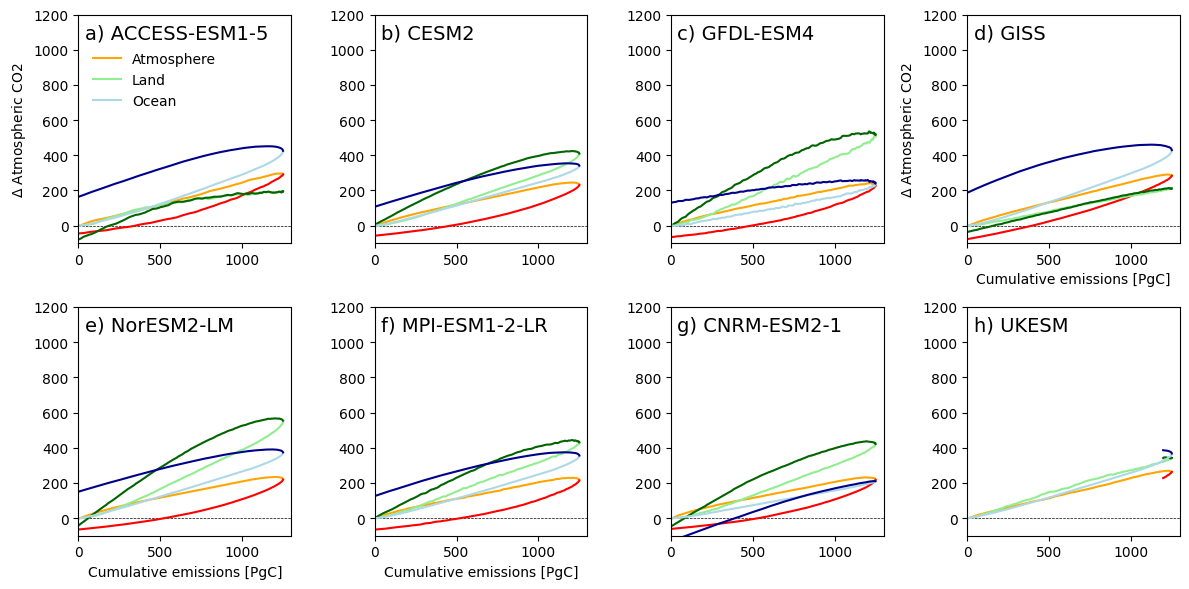

In [107]:
#window=11

fig = plt.figure(figsize=(12,6))

for i in np.arange(0,len(mdls)):
    sub = fig.add_subplot(2, 4, i+1)
    lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),300])

    #sub.set_title(mdls[i])
    if i in (3, 4, 5):
        sub.set_xlabel("Cumulative emissions [PgC]")
    if i in (0, 3):
        sub.set_ylabel("$\Delta$ Atmospheric CO2")
    sub.set_ylim(-100,1200)
    sub.set_xlim(0,1300)
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], ed[mdls[i]]['flat10-cdr']['co2'][0:150]-ed[mdls[i]]['flat10-cdr']['co2'][0], color="orange", label='Atmosphere')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:lncdr], ed[mdls[i]]['flat10-cdr']['co2'][150:lncdr]-ed[mdls[i]]['flat10-cdr']['co2'][0], color="red")
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[0:150], color="lightgreen", label='Land')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:lncdr], np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[150:lncdr], color="darkgreen")
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[0:150], color="lightblue", label='Ocean')
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:lncdr], np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[150:lncdr], color="darkblue")
    if i==0:
        sub.legend(frameon=False, loc="upper left", prop={'size': 10}, bbox_to_anchor=(0.01, 0.89))
    sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
    sub.annotate(fls[i]+" "+mdls[i], xy=(0.03, 0.92), xycoords='axes fraction', fontsize=14, ha='left', va='center')

plt.tight_layout()

In [108]:
#window=21
time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['tas'][0:300])-int(window/2))

<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:31: SyntaxWarning: invalid escape sequence '\D'
<>:46: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:31: SyntaxWarning: invalid escape sequence '\D'
<>:46: SyntaxWarning: invalid escape sequence '\D'
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/519766541.py:11: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ [ppm]")
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/519766541.py:31: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Land carbon sink [PgC]")
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/519766541.py:46: SyntaxWarning: invalid escape sequence '\D'
  sub.set_ylabel("$\Delta$ Ocean carbon sink [PgC]")


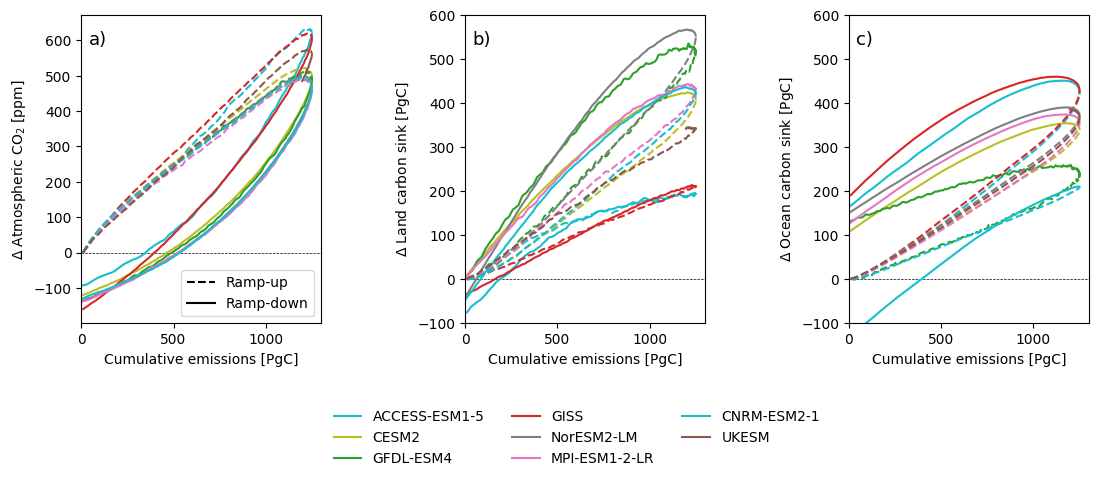

In [109]:
#colors=["tab:blue","tab:orange","tab:green","tab:red","tab:gray","tab:purple"]
window=21
time_ma = np.arange(int(window/2),len(ed[mdls[i]]['flat10-zec']['tas'])-int(window/2))

fig = plt.figure(figsize=(13,4))


sub = fig.add_subplot(1, 3, 1)
sub.set_xlim(0,1300)
#sub.set_xlabel("Cumulative emissions [PgC]")
sub.set_ylabel("$\Delta$ Atmospheric CO$_2$ [ppm]")
# ESMs
for i in np.arange(0,len(mdls)):
    lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),300])

    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], ed[mdls[i]]['flat10-cdr']['C_atm'][0:150], color=colors[i], linestyle="--")
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:lncdr], ed[mdls[i]]['flat10-cdr']['C_atm'][150:lncdr], color=colors[i])
   # sub.scatter(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[149], ed[mdls[i]]['flat10-cdr']['C_atm'][149], color=colors[i], s=30, edgecolor="black", zorder=4)
sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
sub.annotate('a)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=13, ha='left', va='center')
sub.set_xlabel("Cumulative emissions [PgC]")

sub.plot([-99,-99], color="black", linestyle='--', label="Ramp-up")
sub.plot([-99,-99], color="black", linestyle='-', label="Ramp-down")

sub.legend()
sub = fig.add_subplot(1, 3, 2)
sub.set_xlim(0,1300)
sub.set_ylim(-100,600)
sub.set_xlabel("Cumulative emissions [PgC]")
sub.set_ylabel("$\Delta$ Land carbon sink [PgC]")
# ESMs
for i in np.arange(0,len(mdls)):
    lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),300])

    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[0:150], color=colors[i], linestyle="--")
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:lncdr], np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[150:lncdr], color=colors[i])
   # sub.scatter(moving_average(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:300], window)[139], moving_average(np.cumsum(ed[mdls[i]]['flat10-cdr']['nbp'])[0:300], window)[139], color=colors[i], s=30, edgecolor="black", zorder=4)
sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
sub.annotate('b)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=13, ha='left', va='center')

sub = fig.add_subplot(1, 3, 3)
sub.set_xlim(0,1300)
sub.set_ylim(-100,600)
sub.set_xlabel("Cumulative emissions [PgC]")
sub.set_ylabel("$\Delta$ Ocean carbon sink [PgC]")
# ESMs
for i in np.arange(0,len(mdls)):
    lncdr=np.min([len(ed[mdls[i]]['flat10-cdr']['co2'][1:][:]),300])

    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:150], np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[0:150], color=colors[i], linestyle="--")
    sub.plot(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[150:lncdr], np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[150:lncdr], color=colors[i], label=mdls[i])
    #sub.scatter(moving_average(np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)'])[0:lncdr], window)[139], moving_average(np.cumsum(ed[mdls[i]]['flat10-cdr']['fgco2'])[0:lncdr], window)[139], color=colors[i], s=30, edgecolor="black", zorder=4)
sub.legend(frameon=False, loc="upper left", prop={'size': 10}, bbox_to_anchor=(-2.2, -0.24), ncol=3)
sub.axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
sub.annotate('c)', xy=(0.03, 0.92), xycoords='axes fraction', fontsize=13, ha='left', va='center')
sub.set_xlabel("Cumulative emissions [PgC]")

fig.subplots_adjust(wspace=.6, hspace=1)
plt.savefig("images/flat10_ESM_results_hysteresis_panel.pdf", bbox_inches='tight')
plt.savefig("images/flat10_ESM_results_hysteresis_panel.jpg", bbox_inches='tight')
window=11







#### Koven-type figure

In [110]:
from scipy.signal import savgol_filter

<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:23: SyntaxWarning: invalid escape sequence '\D'
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/1611870308.py:23: SyntaxWarning: invalid escape sequence '\D'
  axs[3*i].set_ylabel('$\Delta$ Carbon\n[PgC/yr]')


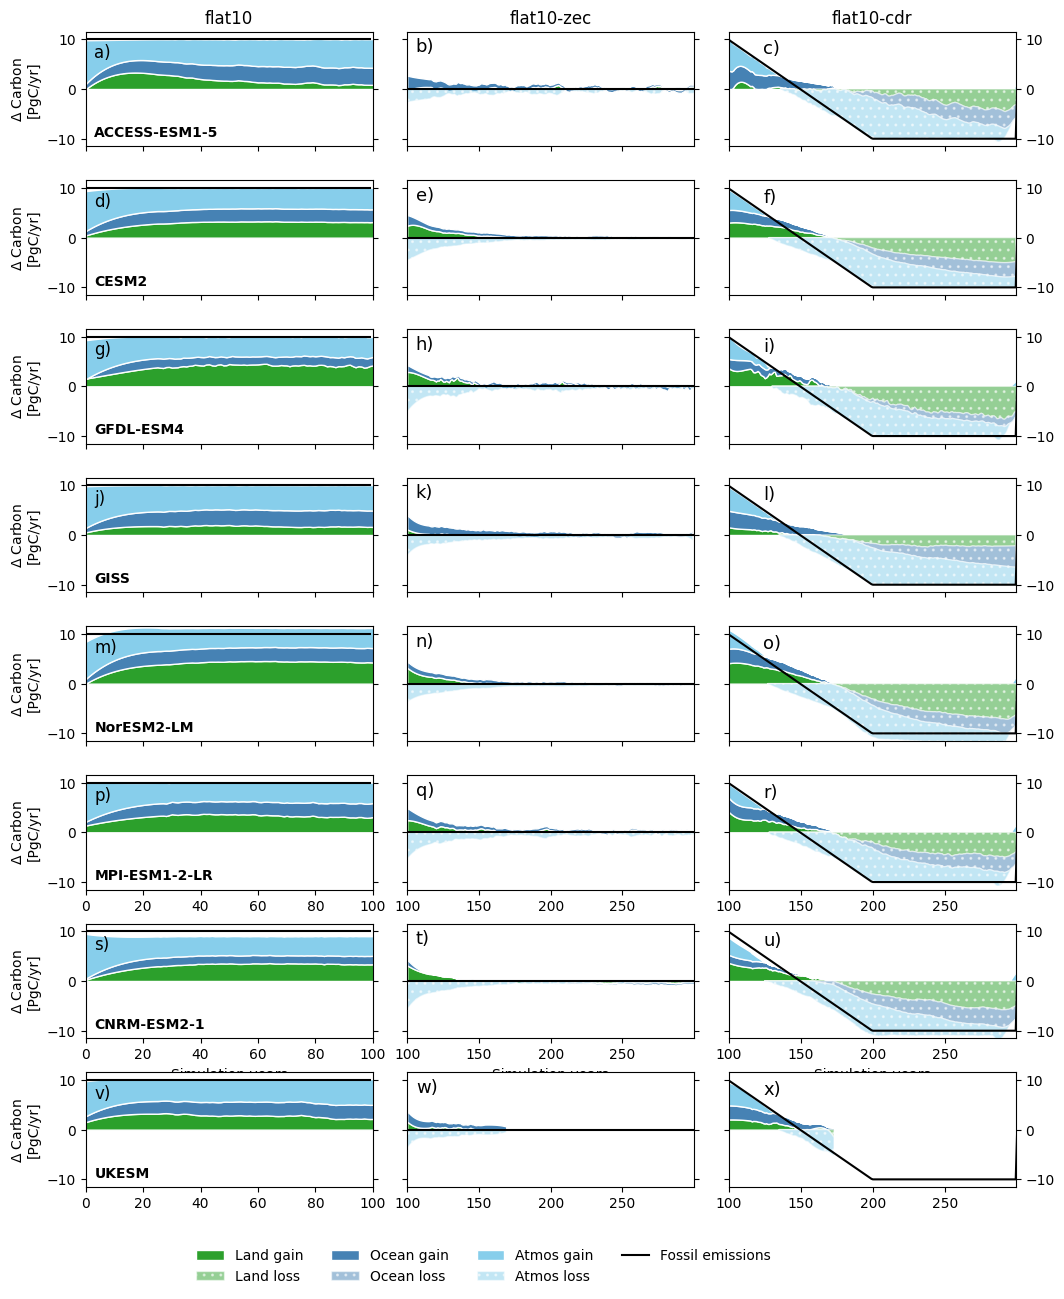

In [111]:
fls_c1 = ['a)','d)','g)','j)','m)','p)','s)','v)']
fls_c2 = ['b)','e)','h)','k)','n)','q)','t)','w)']
fls_c3 = ['c)','f)','i)','l)','o)','r)','u)','x)']

fig, axs = plt.subplots(8, 3,figsize=[12,15])
axs=axs.flatten()
for i,m in enumerate(mdls):
    #print(m)
    
    tmpa=ed[m]['flat10']['C_atm'].diff('year').pad(year=(0,1),constant_values=0).copy()
    tmpa[-1]=tmpa[-2]
    tmpl=ed[m]['flat10']['nbp'].copy()
    tmpo=ed[m]['flat10']['fgco2'].copy()

    stmpa = savgol_filter(tmpa.squeeze(drop=True), 51, 3) 
    stmpl = savgol_filter(tmpl.squeeze(drop=True), 51, 3)
    stmpo = savgol_filter(tmpo.squeeze(drop=True), 51, 3) 

    axs[3*i].stackplot(np.arange(0,len(tmpa)),stmpl,stmpo,stmpa,colors=['tab:green','steelblue','skyblue'],edgecolor="white")

    if i==0:
        axs[3*i].set_title('flat10')
    axs[3*i].set_ylabel('$\Delta$ Carbon\n[PgC/yr]')     
    axs[3*i].set_xlim([0,100])
    axs[3*i].set_ylim([-11.5,11.5])
    #axs[3*i].grid()
    axs[3*i].plot(e_flat10['Emission Rate (PgC a-1)'][:100].values,'k')
    if i in (0, 1, 2, 3, 4):
        axs[3*i].xaxis.set_ticklabels([])
    axs[3*i].annotate(m, xy=(0.03, 0.12), xycoords='axes fraction', fontsize=10, ha='left', va='center', weight="bold")
    axs[3*i].annotate(fls_c1[i], xy=(0.03, 0.82), xycoords='axes fraction', fontsize=12, ha='left', va='center')
    axs[3*i].tick_params(right=True)
    if i==6:
        axs[3*i].set_xlabel('Simulation years')

    try:
        tmpa=ed[m]['flat10-zec']['C_atm'].diff('year').pad(year=(0,1)).copy()
        tmpa[-1]=tmpa[-2]
        tmpl=ed[m]['flat10-zec']['nbp'].copy()
        tmpo=ed[m]['flat10-zec']['fgco2'].copy()
        
        stmpa = savgol_filter(tmpa[100:].squeeze(drop=True), 31, 3) 
        stmpl = savgol_filter(tmpl[100:].squeeze(drop=True), 31, 3)
        stmpo = savgol_filter(tmpo[100:].squeeze(drop=True), 31, 3)
    
        axs[3*i+1].stackplot(np.arange(0,len(stmpa)),stmpl,stmpo,colors=['tab:green','steelblue','skyblue'],edgecolor="white")
        ppp=axs[3*i+1].stackplot(np.arange(0,len(stmpa)),stmpa,colors=['skyblue'])
        ppp[0].set_hatch("..")
        ppp[0].set_alpha(0.5)
        ppp[0].set_edgecolor('w')
        
    except:
        0
    if i==0:
        axs[3*i+1].set_title('flat10-zec')
    axs[3*i+1].set_xlim([0,200])
    #axs[3*i+1].grid() 
    axs[3*i+1].set_ylim([-11.5,11.5])
    axs[3*i+1].plot(e_flat10_zec['Emission Rate (PgC a-1)'][100:].values,'k')
    axs[3*i+1].set_xticks([0,50,100,150])
    axs[3*i+1].set_xticklabels([100,150,200,250])
    if i in (0, 1, 2, 3, 4):
        axs[3*i+1].xaxis.set_ticklabels([])
    axs[3*i+1].yaxis.set_ticklabels([])
    axs[3*i+1].tick_params(right=True)
    axs[3*i+1].annotate(fls_c2[i], xy=(0.03, 0.87), xycoords='axes fraction', fontsize=13, ha='left', va='center')
    if i==6:
        axs[3*i+1].set_xlabel('Simulation years')
    
    try:
        tmpa=ed[m]['flat10-cdr']['C_atm'].diff('year').pad(year=(0,1)).copy()
        tmpa[-1]=tmpa[-2]
        tmpl=ed[m]['flat10-cdr']['nbp'].copy()
        tmpo=ed[m]['flat10-cdr']['fgco2'].copy()
        if m=='NorESM2-LM':
            tmpa[16]=tmpa[15]
            tmpa[17]=tmpa[18]
        #    tmpo[:17]=10-tmpl[:17]-tmpa[:17]
        stmpa = savgol_filter(tmpa[100:].squeeze(drop=True), 31, 3) 
        stmpl = savgol_filter(tmpl[100:].squeeze(drop=True), 31, 3) 
        stmpo = savgol_filter(tmpo[100:].squeeze(drop=True), 31, 3) 
        
        stmpa_neg=np.clip(stmpa,-1e10,0)
        stmpa_pos=np.clip(stmpa,0,1e10)
        stmpo_neg=np.clip(stmpo,-1e10,0)
        stmpo_pos=np.clip(stmpo,0,1e10)
        stmpl_neg=np.clip(stmpl,-1e10,0)
        stmpl_pos=np.clip(stmpl,0,1e10)
        crs1=np.argmin(stmpa_pos>0)
        crs2=np.argmin(stmpl_pos>0)
        
        axs[3*i+2].stackplot(np.arange(0,len(stmpa)),stmpl_pos[:],stmpo_pos[:],stmpa_pos[:],colors=['tab:green','steelblue','skyblue'],labels=['Land gain','Ocean gain','Atmos gain'],edgecolor="white")

        pp3=axs[3*i+2].stackplot(np.arange(crs1,len(stmpa)),stmpl_neg[crs1:],stmpo_neg[crs1:],stmpa_neg[crs1:],colors=['tab:green','steelblue','skyblue'],labels=['Land loss','Ocean loss','Atmos loss'],edgecolor="white")
        for pp in pp3:
            pp.set_hatch("..")  
            pp.set_edgecolor('w')  
            pp.set_alpha(0.5)
        
    except:
        0
    if i==0:
        axs[3*i+2].set_title('flat10-cdr')
    axs[3*i+2].set_xlim([0,199])
    #axs[3*i+2].grid() 
    axs[3*i+2].set_ylim([-11.5,11.5])
    axs[3*i+2].yaxis.set_label_position("right")
    axs[3*i+2].yaxis.tick_right()
    axs[3*i+2].set_xticks([0,50,100,150])
    axs[3*i+2].set_xticklabels([100,150,200,250])
    if i in (0, 1, 2, 3, 4):
        axs[3*i+2].xaxis.set_ticklabels([])
    axs[3*i+2].tick_params(left=True)
    axs[3*i+2].annotate(fls_c3[i], xy=(0.12, 0.85), xycoords='axes fraction', fontsize=13, ha='left', va='center')
    if i==6:
        axs[3*i+2].set_xlabel('Simulation years')
    
    axs[3*i+2].plot(e_flat10_cdr['Emission Rate (PgC a-1)'][100:].values,'k',label='Fossil emissions')
    

    # legend
    handles, labels = axs[3*i+2].get_legend_handles_labels()
    order = [0,3,1,4,2,5,6]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False, bbox_to_anchor=(-1.9, -0.43), loc='upper left', ncol=4)

#plt.tight_layout()
fig.subplots_adjust(wspace=0.12, hspace=0.3)

plt.savefig("images/flat10_ESM_results_carbon_fluxes.pdf", bbox_inches='tight')
plt.savefig("images/flat10_ESM_results_carbon_fluxes.jpg", bbox_inches='tight')


# SCM vs. ESM

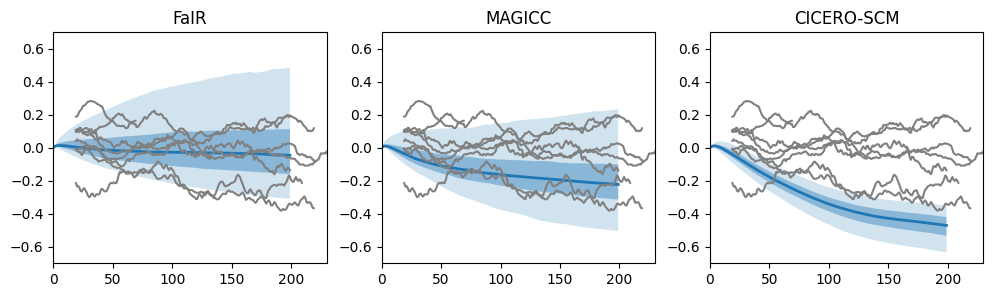

In [112]:
# esm-flat10_zec

fig, axes = plt.subplots(1,3,figsize=(12, 3))

dd = ds_fair.temperature.sel(scenario='esm-flat10_zec')
dds = dd.isel(time=slice(100,300))-dd.isel(time=100)
axes[0].set_title("FaIR")
axes[0].set_xlim(0,230)
axes[0].fill_between(np.arange(0,200),np.percentile(dds,5,1),np.percentile(dds,95,1),color="tab:blue",alpha=0.2, edgecolor="none")
axes[0].fill_between(np.arange(0,200),np.percentile(dds,25,1),np.percentile(dds,75,1),color="tab:blue",alpha=0.4, edgecolor="none")
axes[0].plot(np.percentile(dds,50,1),lw=2)
axes[0].set_ylim(-0.7,0.7)
for i,m in enumerate(mdls):
    axes[0].plot(ed[m]['flat10-zec']['tas'][100:].rolling(year=20).mean()-ed[m]['flat10']['tas'][90:110].mean(), color='gray')

dd = ds_magicc.temperature.sel(scenario='esm-flat10_zec')
dds = dd.isel(time=slice(100,300))-dd.isel(time=100)
axes[1].set_title("MAGICC")
axes[1].set_xlim(0,230)
axes[1].fill_between(np.arange(0,200),np.percentile(dds,5,0),np.percentile(dds,95,0),color="tab:blue",alpha=0.2, edgecolor="none")
axes[1].fill_between(np.arange(0,200),np.percentile(dds,25,0),np.percentile(dds,75,0),color="tab:blue",alpha=0.4, edgecolor="none")
axes[1].plot(np.percentile(dds,50,0),lw=2)
axes[1].set_ylim(-0.7,0.7)
for i,m in enumerate(mdls):
    axes[1].plot(ed[m]['flat10-zec']['tas'][100:].rolling(year=20).mean()-ed[m]['flat10']['tas'][90:110].mean(), color='gray')

dd = ds_cicero.temperature.sel(scenario='esm-flat10_zec')
dds = dd.isel(time=slice(100,300))-dd.isel(time=100)
axes[2].set_title("CICERO-SCM")
axes[2].set_xlim(0,230)
axes[2].fill_between(np.arange(0,200),np.percentile(dds,5,1),np.percentile(dds,95,1),color="tab:blue",alpha=0.2, edgecolor="none")
axes[2].fill_between(np.arange(0,200),np.percentile(dds,25,1),np.percentile(dds,75,1),color="tab:blue",alpha=0.4, edgecolor="none")
axes[2].plot(np.percentile(dds,50,1),lw=2)
axes[2].set_ylim(-0.7,0.7)
for i,m in enumerate(mdls):
    axes[2].plot(ed[m]['flat10-zec']['tas'][100:].rolling(year=20).mean()-ed[m]['flat10']['tas'][90:110].mean(), color='gray')

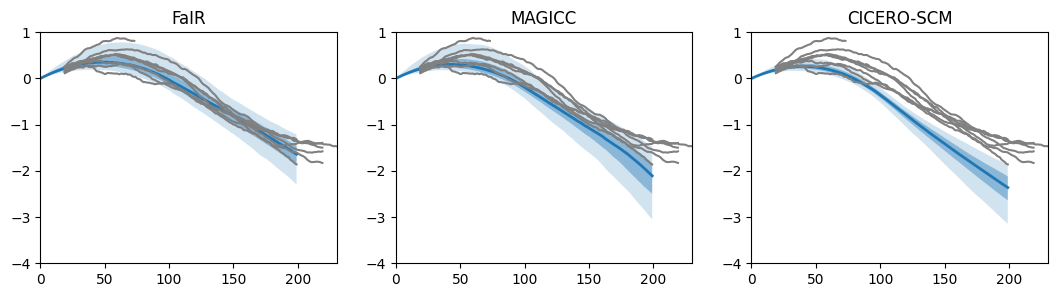

In [113]:
# esm-flat10_cdr

fig, axes = plt.subplots(1,3,figsize=(13, 3))

dd = ds_fair.temperature.sel(scenario='esm-flat10_cdr')
dds = dd.isel(time=slice(100,300))-dd.isel(time=100)
axes[0].set_title("FaIR")
axes[0].set_xlim(0,230)
axes[0].fill_between(np.arange(0,200),np.percentile(dds,5,1),np.percentile(dds,95,1),color="tab:blue",alpha=0.2, edgecolor="none")
axes[0].fill_between(np.arange(0,200),np.percentile(dds,25,1),np.percentile(dds,75,1),color="tab:blue",alpha=0.4, edgecolor="none")
axes[0].plot(np.percentile(dds,50,1),lw=2)
axes[0].set_ylim(-4,1)
for i,m in enumerate(mdls):
    axes[0].plot(ed[m]['flat10-cdr']['tas'][100:].rolling(year=20).mean()-ed[m]['flat10']['tas'][90:110].mean(), color='gray')

dd = ds_magicc.temperature.sel(scenario='esm-flat10_cdr')
dds = dd.isel(time=slice(100,300))-dd.isel(time=100)
axes[1].set_title("MAGICC")
axes[1].set_xlim(0,230)
axes[1].fill_between(np.arange(0,200),np.percentile(dds,5,0),np.percentile(dds,95,0),color="tab:blue",alpha=0.2, edgecolor="none")
axes[1].fill_between(np.arange(0,200),np.percentile(dds,25,0),np.percentile(dds,75,0),color="tab:blue",alpha=0.4, edgecolor="none")
axes[1].plot(np.percentile(dds,50,0),lw=2)
axes[1].set_ylim(-4,1)
for i,m in enumerate(mdls):
    axes[1].plot(ed[m]['flat10-cdr']['tas'][100:].rolling(year=20).mean()-ed[m]['flat10']['tas'][90:110].mean(), color='gray')

dd = ds_cicero.temperature.sel(scenario='esm-flat10_cdr')
dds = dd.isel(time=slice(100,300))-dd.isel(time=100)
axes[2].set_title("CICERO-SCM")
axes[2].set_xlim(0,230)
axes[2].fill_between(np.arange(0,200),np.percentile(dds,5,1),np.percentile(dds,95,1),color="tab:blue",alpha=0.2, edgecolor="none")
axes[2].fill_between(np.arange(0,200),np.percentile(dds,25,1),np.percentile(dds,75,1),color="tab:blue",alpha=0.4, edgecolor="none")
axes[2].plot(np.percentile(dds,50,1),lw=2)
axes[2].set_ylim(-4,1)
for i,m in enumerate(mdls):
    axes[2].plot(ed[m]['flat10-cdr']['tas'][100:].rolling(year=20).mean()-ed[m]['flat10']['tas'][90:110].mean(), color='gray')

<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:70: SyntaxWarning: invalid escape sequence '\D'
<>:104: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:70: SyntaxWarning: invalid escape sequence '\D'
<>:104: SyntaxWarning: invalid escape sequence '\D'
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/1456630134.py:36: SyntaxWarning: invalid escape sequence '\D'
  axs[0].set_ylabel('$\Delta$ GMST [K]')
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/1456630134.py:70: SyntaxWarning: invalid escape sequence '\D'
  axs[1].set_ylabel('$\Delta$ GMST - TCRE [K]')
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/1456630134.py:104: SyntaxWarning: invalid escape sequence '\D'
  axs[2].set_ylabel('$\Delta$ GMST - TCRE [K]')


ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM
MPI-ESM1-2-LR
CNRM-ESM2-1
UKESM


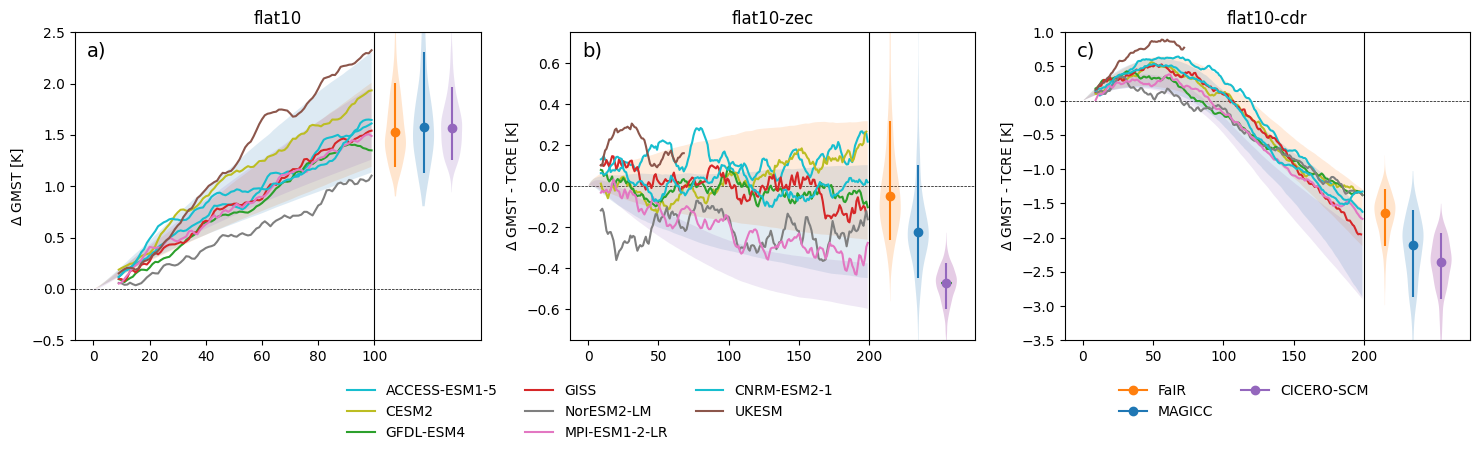

In [114]:
# combined SCM and ESM results
mcols=colors
#mcols=["tab:blue","tab:orange","tab:green","tab:red","tab:gray","tab:purple","tab:cyan","tab:brown"]

fig, axs = plt.subplots(1, 3,figsize=[18,4])
axs=axs.flatten()

# subfigure 1
plot_range(ds_fair.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)),axs[0],prctl=[10,50,90],col='tab:orange')
pv = axs[0].violinplot(ds_fair.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100))[-1], [107.5], widths=7.5, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:orange'), pc.set_alpha(0.2)
plot_bxp(ds_fair.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)),107.5,99,axs[0],prctl=[10,50,90],col='tab:orange',linestyle='-')

plot_range(ds_magicc.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)).T,axs[0],prctl=[10,50,90],col="tab:blue")
pv = axs[0].violinplot(ds_magicc.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)).T[-1], [117.5], widths=7.5, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:blue'), pc.set_alpha(0.2)
plot_bxp(ds_magicc.temperature.sel(scenario='esm-flat10').isel(time=slice(00,100)).T,117.5,99,axs[0],prctl=[10,50,90],col='tab:blue',linestyle='-')

plot_range(ds_cicero.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100)),axs[0],prctl=[10,50,90],col='tab:purple')
pv = axs[0].violinplot(ds_cicero.temperature.sel(scenario='esm-flat10').isel(time=slice(0,100))[-1], [127.5], widths=7.5, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:purple'), pc.set_alpha(0.2)
plot_bxp(ds_cicero.temperature.sel(scenario='esm-flat10').isel(time=slice(00,100)),127.5,99,axs[0],prctl=[10,50,90],col='tab:purple',linestyle='-')

pl=[]
for i,m in enumerate(mdls):

    cn0=ed[m]['flat10']['tas'][:20].mean()-(ed[m]['flat10']['tas'][10:30:1].mean()-ed[m]['flat10']['tas'][:20].mean())
    tmp==axs[0].plot(ed[m]['flat10']['tas'][:100].rolling(year=10).mean()-cn0,color=mcols[i],label=m)
    pl.append(tmp[0])
    print(m)

    axs[0].set_ylim([-0.5,2.5])
axs[0].set_xticks([0,20,40,60,80,100])
axs[0].set_xticklabels([0,20,40,60,80,100])
axs[0].set_title('flat10')
axs[0].set_ylabel('$\Delta$ GMST [K]')
axs[0].axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
axs[0].axvline(100, color="black", lw=0.8)
axs[0].legend(frameon=False, ncol=3, bbox_to_anchor=(1.9, -0.1))
axs[0].annotate('a)', xy=(0.03, 0.94), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 2
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-t_100,axs[1],prctl=[10,50,90],col='tab:orange')
pv = axs[1].violinplot((ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-t_100)[-1], [215], widths=15, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:orange'), pc.set_alpha(0.2)
plot_bxp(ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-t_100,215,199,axs[1],prctl=[10,50,90],col='tab:orange',linestyle='-',lbl='FaIR')

plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300)).T-m_100,axs[1],prctl=[10,50,90])
pv = axs[1].violinplot((ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300)).T-m_100)[-1], [235], widths=15, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:blue'), pc.set_alpha(0.2)
plot_bxp(ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300)).T-m_100,235,199,axs[1],prctl=[10,50,90],col='tab:blue',linestyle='-',lbl='MAGICC')

plot_range(ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-c_100,axs[1],prctl=[10,50,90],col='tab:purple')
pv = axs[1].violinplot((ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-c_100)[-1], [255], widths=15, quantiles=[0.5], showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('purple'), pc.set_alpha(0.2)
plot_bxp(ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))-c_100,255,199,axs[1],prctl=[10,50,90],col='tab:purple',linestyle='-',lbl='CICERO-SCM')

pl=[]
for i,m in enumerate(mdls):
    try:
     lnzec=np.min([len(ed[m]['flat10-zec']['tas'][1:][:]),300])
     tmp==axs[1].plot(ed[m]['flat10-zec']['tas'][100:lnzec].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),color=mcols[i])
     pl.append(tmp[0])
    except:
        0
axs[1].set_ylim([-0.75,0.75])
axs[1].set_xticks([0,50,100,150,200])
axs[1].set_xticklabels([0,50,100,150,200])
axs[1].set_title('flat10-zec')
axs[1].set_ylabel('$\Delta$ GMST - TCRE [K]')
axs[1].axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
axs[1].axvline(200, color="black", lw=0.8)
axs[1].legend(frameon=False, ncol=2, bbox_to_anchor=(2., -0.1))
axs[1].annotate('b)', xy=(0.03, 0.94), xycoords='axes fraction', fontsize=14, ha='left', va='center')

# subfigure 3
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-t_100,axs[2],prctl=[10,50,90],col='tab:orange')
pv = axs[2].violinplot((ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-t_100)[-1], [215], widths=15, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:orange'), pc.set_alpha(0.2)
plot_bxp(ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-t_100,215,199,axs[2],prctl=[10,50,90],col='tab:orange',linestyle='-',lbl='FaIR')

plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300)).T-m_100,axs[2],prctl=[10,50,90], col="tab:blue")
pv = axs[2].violinplot((ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300)).T-m_100)[-1], [235], widths=15, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('tab:blue'), pc.set_alpha(0.2)
plot_bxp(ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300)).T-m_100,235,199,axs[2],prctl=[10,50,90],col='tab:blue',linestyle='-',lbl='MAGICC')

plot_range(ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-c_100,axs[2],prctl=[10,50,90],col='tab:purple')
pv = axs[2].violinplot((ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-c_100)[-1], [255], widths=15, showmeans=False, showextrema=False, showmedians=False)
for pc in pv['bodies']: pc.set_facecolor('purple'), pc.set_alpha(0.2)
plot_bxp(ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-c_100,255,199,axs[2],prctl=[10,50,90],col='tab:purple',linestyle='-',lbl='CICERO')

pl=[]
for i,m in enumerate(mdls):
    try:
     lncdr=np.min([len(ed[m]['flat10-cdr']['tas'][1:][:]),300])
     tmp==axs[2].plot(ed[m]['flat10-cdr']['tas'][100:lncdr].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),color=mcols[i],label=m)
     pl.append(tmp[0])
    except:
        0
    axs[2].set_ylim([-3.5,1])
axs[2].set_xticks([0,50,100,150,200])
axs[2].set_xticklabels([0,50,100,150,200])
axs[2].set_title('flat10-cdr')
axs[2].set_ylabel('$\Delta$ GMST - TCRE [K]')
axs[2].axhline(0, color="black", lw=0.5, linestyle="--", zorder=0)
axs[2].axvline(200, color="black", lw=0.8)
axs[2].annotate('c)', xy=(0.03, 0.94), xycoords='axes fraction', fontsize=14, ha='left', va='center')

fig.subplots_adjust(wspace=0.22, hspace=0.2)
#plt.tight_layout()
    
plt.savefig("images/flat10_SCM_ESM_results_panel.pdf", bbox_inches='tight')
plt.savefig("images/flat10_SCM_ESM_results_panel.jpg", bbox_inches='tight')

# Metrics and 1pctCO2 comparison

flat10 SCMs

In [115]:
tcre100f=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
tcre100m=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
tcre100c=ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=100)


zec50f=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=150)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
zec50m=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=150)-ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
zec50c=ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=150)-ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=100)


zec100f=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
zec100m=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
zec100c=ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=100)

flat10 ESMs

In [116]:
window

11

In [117]:
ed['UKESM']['flat10'].tas

<xarray.DataArray 'tas' (year: 221)> Size: 2kB
array([ 0.0642,  0.    ,  0.109 ,  0.1669,  0.2364,  0.366 ,  0.0764,
       -0.0507,  0.1151,  0.285 ,  0.285 ,  0.1842,  0.2337,  0.1746,
        0.1997,  0.2144,  0.227 ,  0.4064,  0.3422,  0.3803,  0.418 ,
        0.5335,  0.3984,  0.469 ,  0.5097,  0.6339,  0.5122,  0.6135,
        0.7775,  0.811 ,  0.775 ,  0.7966,  0.956 ,  0.8338,  0.8651,
        0.7844,  0.9547,  1.1463,  1.013 ,  1.122 ,  1.0811,  1.1319,
        1.1358,  1.0283,  0.9928,  1.2275,  1.2806,  1.1146,  1.1627,
        1.1933,  1.392 ,  1.5196,  1.5601,  1.6196,  1.5697,  1.5731,
        1.4988,  1.6218,  1.7504,  1.7957,  1.8726,  1.9064,  1.7103,
        1.674 ,  1.6661,  1.6197,  1.7027,  1.6326,  1.6956,  1.7414,
        1.6022,  1.5889,  1.7562,  1.9172,  1.8698,  1.9291,  2.1521,
        1.9472,  1.9557,  2.1245,  2.1122,  2.1469,  2.1981,  2.0142,
        1.9571,  2.0949,  2.1356,  2.2827,  2.4206,  2.2056,  2.1549,
        2.2294,  2.2244,  2.1395,  2.2189,  2.3302,  2.4448,  2.4585,
        2.3958,  2.5082,  2.6288,  2.4258,  2.5056,  2.5833,  2.3589,
        2.408 ,  2.6604,  2.5536,  2.6401,  2.7981,  2.7649,  2.7507,
        2.7678,  2.7759,  2.7699,  2.8586,  2.9503,  3.0306,  2.9964,
        3.1112,  3.0794,  2.9714,  3.0296,  2.9234,  3.0312,  3.0939,
        3.1895,  3.1825,  3.1575,  3.0799,  3.0275,  3.1851,  3.4121,
        3.4351,  3.3222,  3.1639,  3.2852,  3.4614,  3.2878,  3.3863,
        3.4685,  3.5186,  3.5281,  3.5182,  3.4791,  3.4528,  3.6431,
        3.7775,  3.6916,  3.6794,  3.8123,  3.6752,  3.7607,  3.9473,
        3.8739,  3.7971,  3.9045,  3.8549,  3.811 ,  4.001 ,  3.9736,
        4.0578,  3.9565,  3.9296,  4.0764,  4.2358,  4.0642,  4.041 ,
        4.1339,  4.3397,  4.3262,  4.3703,  4.5029,  4.4591,  4.4183,
        4.3723,  4.4074,  4.3797,  4.5408,  4.3003,  4.4517,  4.4609,
        4.4587,  4.6028,  4.7152,  4.7367,  4.6198,  4.5989,  4.5004,
        4.5666,  4.7623,  4.7444,  4.7426,  4.9633,  4.8146,  4.7394,
        4.7175,  4.7936,  4.9035,  4.9701,  4.9181,  4.8983,  5.0165,
        5.0026,  5.0978,  5.0543,  5.1371,  5.213 ,  5.1524,  5.048 ,
        5.0153,  5.0772,  5.2171,  5.1635,  5.2222,  5.348 ,  5.2525,
        5.2796,  5.3697,  5.4899,  5.3601])
Coordinates:
  * year     (year) int64 2kB 1700 1701 1702 1703 1704 ... 1917 1918 1919 1920

In [158]:
esm_tcre_flat10=np.zeros(len(mdls))
esm_zec50_flat10=np.zeros(len(mdls))
esm_zec100_flat10=np.zeros(len(mdls))
esm_tpw_flat10=np.zeros(len(mdls))
esm_tnz_flat10=np.zeros(len(mdls))
esm_tr1000_flat10=np.zeros(len(mdls))
esm_tr0_flat10=np.zeros(len(mdls))




for i,m in enumerate(mdls):
    cn0=ed[m]['flat10']['tas'][:20].mean()-(ed[m]['flat10']['tas'][10:30:1].mean()-ed[m]['flat10']['tas'][:20].mean())

    esm_tcre_flat10[i]=ed[m]['flat10']['tas'][90:110].mean().values-cn0
    esm_zec50_flat10[i]=(ed[m]['flat10-zec']['tas'][140:160].mean().values)-esm_tcre_flat10[i]
    esm_zec100_flat10[i]=(ed[m]['flat10-zec']['tas'][190:210].mean().values)-esm_tcre_flat10[i]

    # indicate max value
    mxy=np.max(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']),window))
    esm_tpw_flat10[i] = np.where(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']),window)==mxy)[0]-150
    esm_tnz_flat10[i] = ed[mdls[i]]['flat10-cdr']['tas'][140:160].mean().values-ed[mdls[i]]['flat10']['tas'][115:135].mean().values
    esm_tr1000_flat10[i] = ed[mdls[i]]['flat10-cdr']['tas'][190:210].mean().values-ed[mdls[i]]['flat10']['tas'][90:110].mean().values
    esm_tr0_flat10[i] = ed[mdls[i]]['flat10-cdr']['tas'][290:310].mean().values

    

print("TCRE:", esm_tcre_flat10)
print("ZEC50:", esm_zec50_flat10)
print("ZEC100:", esm_zec100_flat10)
print("TPW:", esm_tpw_flat10)
print("TNZ:", esm_tnz_flat10)
print("TR1000:", esm_tr1000_flat10)
print("TR0:", esm_tr0_flat10)
esm_metrics_flat10 = pd.DataFrame({})
esm_metrics_flat10['tcre']=esm_tcre_flat10
esm_metrics_flat10['zec50']=esm_zec50_flat10
esm_metrics_flat10['zec100']=esm_zec100_flat10
esm_metrics_flat10['tpw']=esm_tpw_flat10
esm_metrics_flat10['tnz']=esm_tnz_flat10
esm_metrics_flat10['tr1000']=esm_tr1000_flat10
esm_metrics_flat10['tr0']=esm_tr0_flat10


esm_metrics_flat10.index=mdls



TCRE: [1.75301063 1.95146945 1.45465386 1.62163849 1.17821122 1.50077057
 1.72289277 2.44799   ]
ZEC50: [ 0.20830381 -0.2631313  -0.20984793 -0.18912964 -0.22547232 -0.13938904
  0.00142626  0.1183    ]
ZEC100: [ 0.13327324 -0.12651117 -0.1135391  -0.24052734 -0.31327247 -0.2394135
  0.10518711         nan]
TPW: [  7. -10. -29.  -4. -33.   1. -10.  -3.]
TNZ: [ 0.08160996  0.05382003 -0.09170842  0.12097321 -0.02551466 -0.06321108
  0.10861629  0.200885  ]
TR1000: [ 0.23198843  0.029688   -0.25358582  0.01142578 -0.22908808 -0.23681939
  0.02917725         nan]
TR0: [ 0.17284241  0.41951067 -0.1129776  -0.56428833 -0.30888033 -0.29384002
  0.37563933         nan]


/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/582361137.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  esm_tpw_flat10[i] = np.where(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']),window)==mxy)[0]-150
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/582361137.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  esm_tpw_flat10[i] = np.where(moving_average(np.squeeze(ed[mdls[i]]['flat10-cdr']['tas']),window)==mxy)[0]-150
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/582361137.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and 

In [159]:
esm_metrics_flat10

tcre  zec50  zec100   tpw    tnz  tr1000    tr0
ACCESS-ESM1-5  1.753  0.208   0.133   7.0  0.082   0.232  0.173
CESM2          1.951 -0.263  -0.127 -10.0  0.054   0.030  0.420
GFDL-ESM4      1.455 -0.210  -0.114 -29.0 -0.092  -0.254 -0.113
GISS           1.622 -0.189  -0.241  -4.0  0.121   0.011 -0.564
NorESM2-LM     1.178 -0.225  -0.313 -33.0 -0.026  -0.229 -0.309
MPI-ESM1-2-LR  1.501 -0.139  -0.239   1.0 -0.063  -0.237 -0.294
CNRM-ESM2-1    1.723  0.001   0.105 -10.0  0.109   0.029  0.376
UKESM          2.448  0.118     NaN  -3.0  0.201     NaN    NaN

In [120]:
pd.set_option("display.precision", 3)
esm_metrics_flat10.to_csv("esm_metrics_flat10.csv")

In [121]:
cicero_metrics_flat10 = pd.DataFrame()
fair_metrics_flat10 = pd.DataFrame()
magicc_metrics_flat10 = pd.DataFrame()




In [122]:
cicero_metrics_flat10['tcre']=tcre100c
fair_metrics_flat10['tcre']=tcre100f    
magicc_metrics_flat10['tcre']=tcre100m

cicero_metrics_flat10['zec50']=zec50c
fair_metrics_flat10['zec50']=zec50f
magicc_metrics_flat10['zec50']=zec50m

cicero_metrics_flat10['zec100']=zec100c
fair_metrics_flat10['zec100']=zec100f
magicc_metrics_flat10['zec100']=zec100m

cicero_metrics_flat10['tpw']=ds_cicero['temperature'].sel({'scenario':'esm-flat10_cdr'}).argmax('time').values-150
fair_metrics_flat10['tpw']=ds_fair['temperature'].sel({'scenario':'esm-flat10_cdr'}).argmax('time').values-150
magicc_metrics_flat10['tpw']=ds_magicc['temperature'].sel({'scenario':'esm-flat10_cdr'}).argmax('time').values-150

cicero_metrics_flat10['tnz']=ds_cicero['temperature'].sel({'scenario':'esm-flat10_cdr'}).isel({'time':150})-ds_cicero['temperature'].sel({'scenario':'esm-flat10'}).isel({'time':125})
fair_metrics_flat10['tnz']=ds_fair['temperature'].sel({'scenario':'esm-flat10_cdr'}).isel({'time':150})-ds_fair['temperature'].sel({'scenario':'esm-flat10'}).isel({'time':125})
magicc_metrics_flat10['tnz']=ds_magicc['temperature'].sel({'scenario':'esm-flat10_cdr'}).isel({'time':150})-ds_magicc['temperature'].sel({'scenario':'esm-flat10'}).isel({'time':125})

cicero_metrics_flat10['tr1000']=ds_cicero['temperature'].sel({'scenario':'esm-flat10_cdr'}).isel({'time':200})-ds_cicero['temperature'].sel({'scenario':'esm-flat10'}).isel({'time':100})
fair_metrics_flat10['tr1000']=ds_fair['temperature'].sel({'scenario':'esm-flat10_cdr'}).isel({'time':200})-ds_fair['temperature'].sel({'scenario':'esm-flat10'}).isel({'time':100})
magicc_metrics_flat10['tr1000']=ds_magicc['temperature'].sel({'scenario':'esm-flat10_cdr'}).isel({'time':200})-ds_magicc['temperature'].sel({'scenario':'esm-flat10'}).isel({'time':100})

cicero_metrics_flat10['tr0']=ds_cicero['temperature'].sel({'scenario':'esm-flat10_cdr'}).isel({'time':300})
fair_metrics_flat10['tr0']=ds_fair['temperature'].sel({'scenario':'esm-flat10_cdr'}).isel({'time':300})
magicc_metrics_flat10['tr0']=ds_magicc['temperature'].sel({'scenario':'esm-flat10_cdr'}).isel({'time':300})





cicero_metrics_flat10['model']='CICERO'
fair_metrics_flat10['model']='FAIR'
magicc_metrics_flat10['model']='MAGICC'




In [123]:
cicero_metrics_flat10

tcre  zec50  zec100  tpw    tnz  tr1000    tr0   model
0    1.582 -0.105  -0.260   -5 -0.014  -0.229 -0.765  CICERO
1    1.680 -0.120  -0.283   -6 -0.018  -0.251 -0.789  CICERO
2    1.415 -0.221  -0.365  -14 -0.094  -0.427 -0.721  CICERO
3    1.267 -0.186  -0.331  -13 -0.070  -0.365 -0.685  CICERO
4    1.362 -0.229  -0.382  -15 -0.096  -0.443 -0.750  CICERO
..     ...    ...     ...  ...    ...     ...    ...     ...
995  1.882 -0.098  -0.221   -4 -0.008  -0.192 -0.619  CICERO
996  1.212 -0.207  -0.353  -15 -0.092  -0.416 -0.770  CICERO
997  1.148 -0.108  -0.224   -8 -0.029  -0.221 -0.536  CICERO
998  1.693 -0.055  -0.162   -2  0.014  -0.113 -0.516  CICERO
999  1.369 -0.178  -0.314  -12 -0.069  -0.350 -0.690  CICERO

[1000 rows x 8 columns]

In [124]:
l=[cicero_metrics_flat10,fair_metrics_flat10,magicc_metrics_flat10]

scm_metrics_flat10=pd.concat(l,axis=0)


In [125]:
import seaborn as sns

In [126]:
mtrcs=scm_metrics_flat10.columns[:-1].values

In [127]:
units=['K','K','K','years','K','K','K']

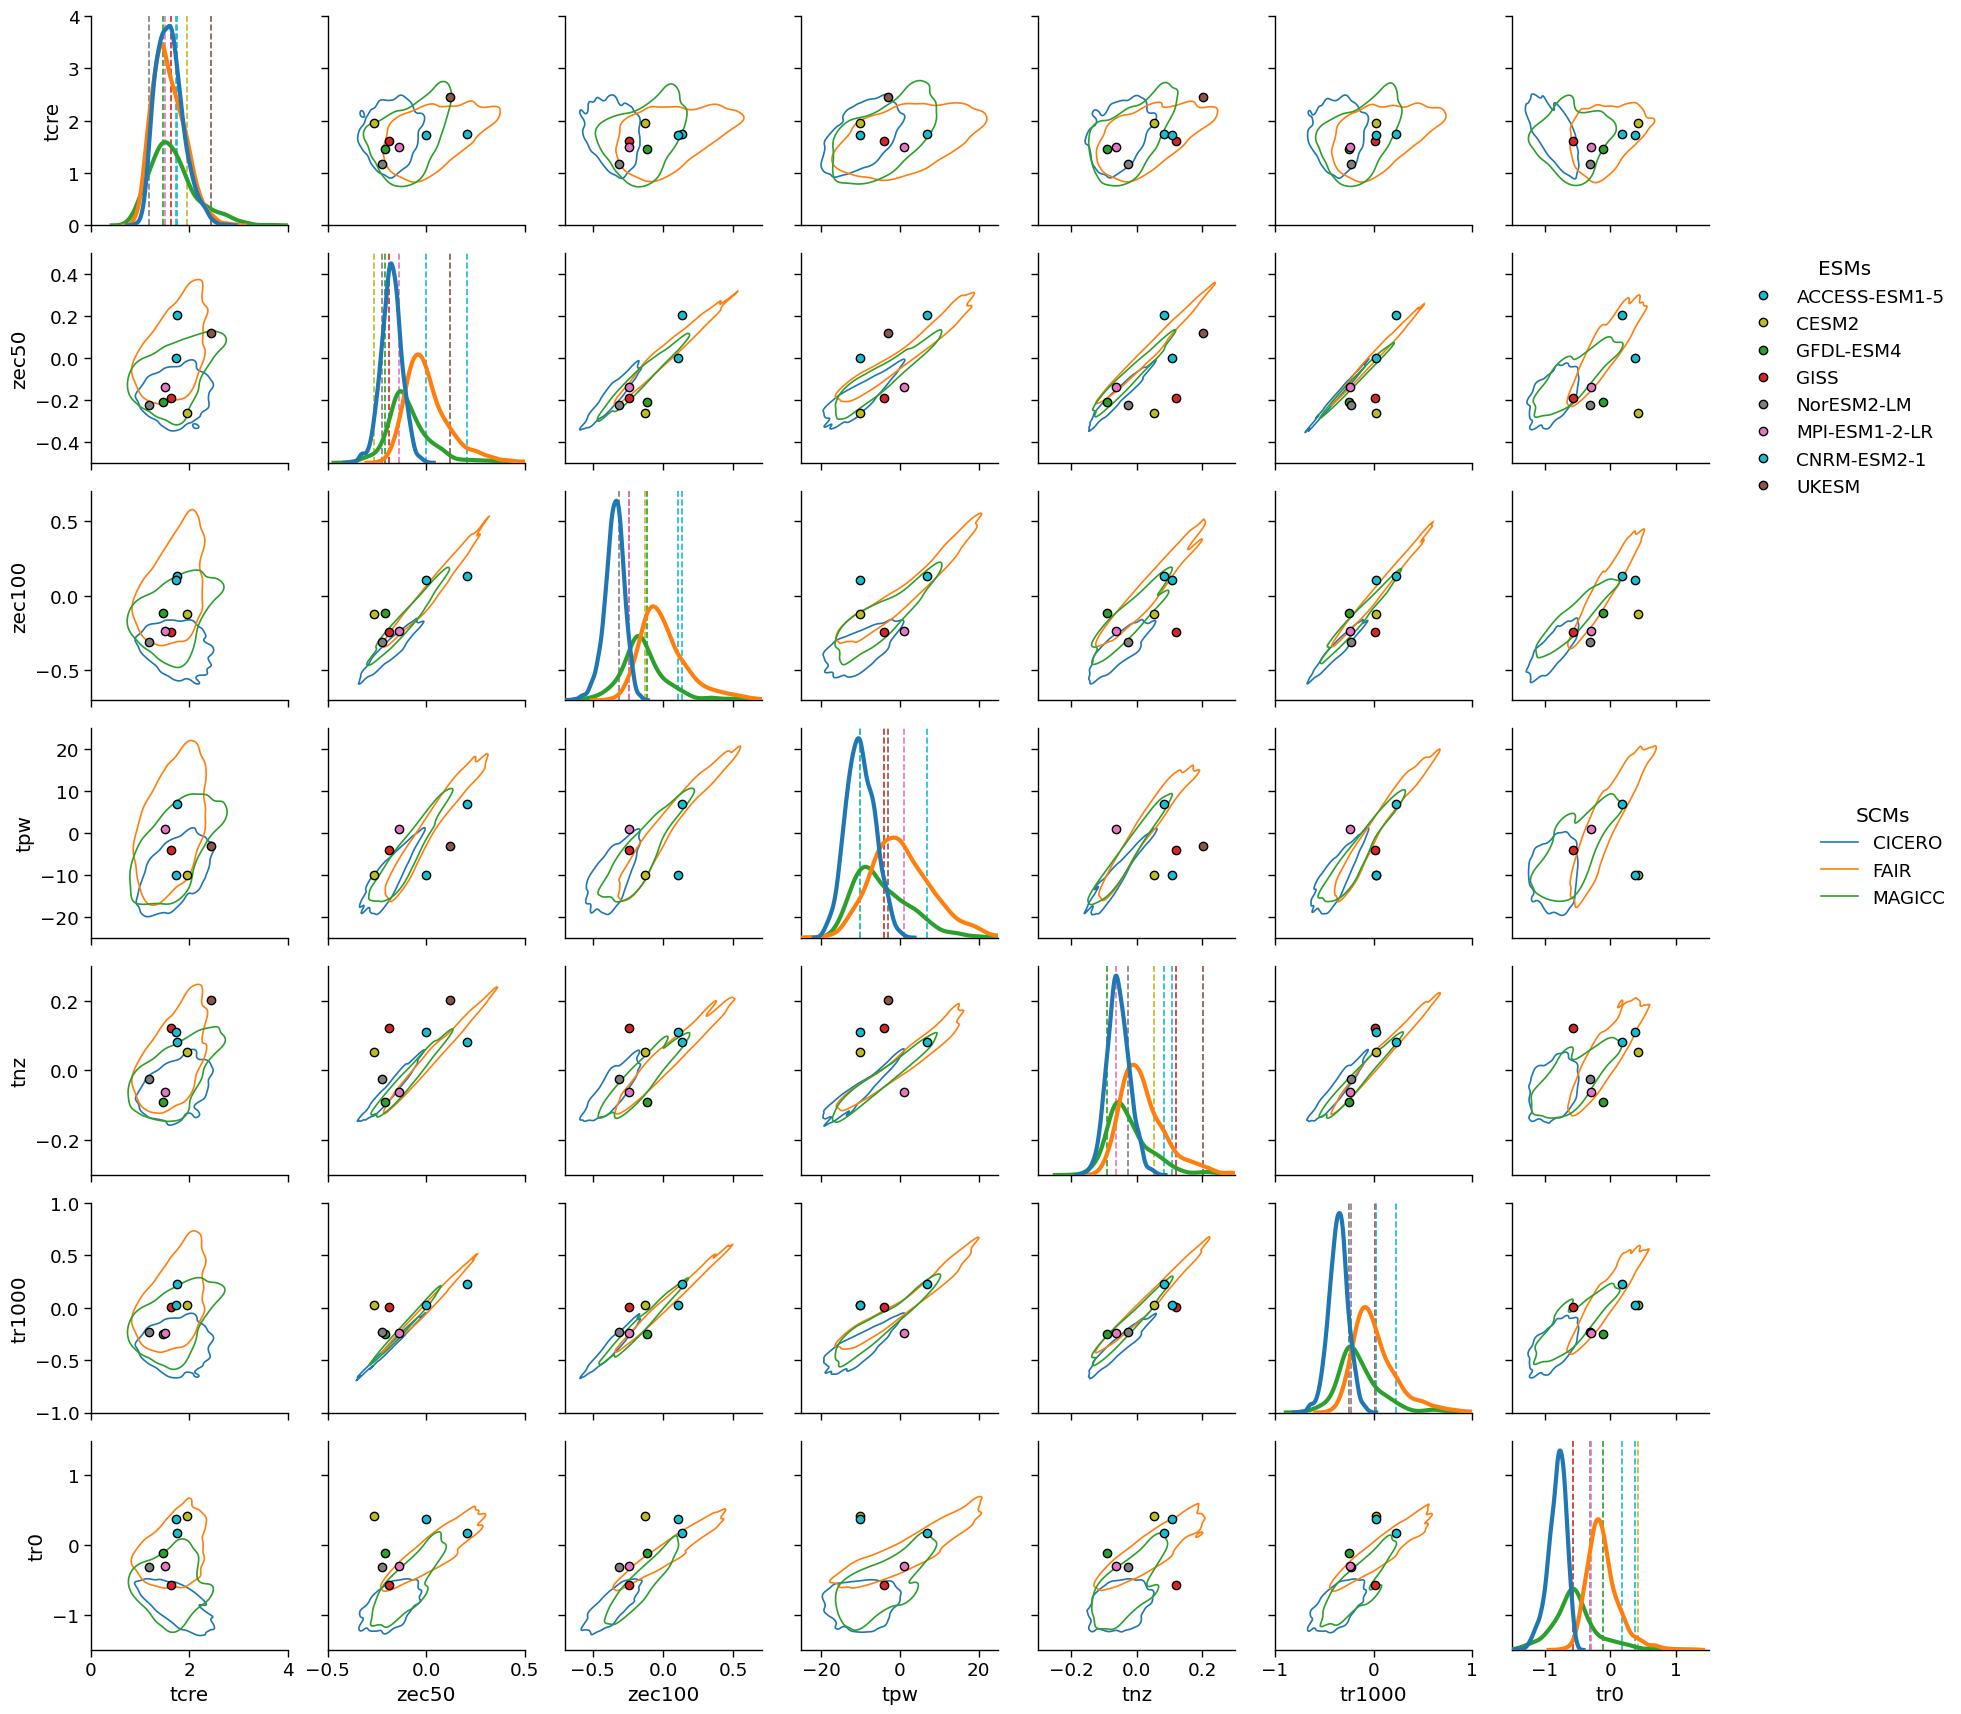

In [128]:
sns.set_context("paper", font_scale=1.5)

g = sns.PairGrid(scm_metrics_flat10, hue="model", diag_sharey=False)#, hue_kws={"cmap": ["Blues", "Greens", "Reds"]})
g = g.map_offdiag(sns.kdeplot, levels=1)
g = g.map_diag(sns.kdeplot, linewidth=3,common_norm=True)

rng=[[0,4],[-.5,.5],[-.7,.7],[-25,25],[-.3,.3],[-1,1],[-1.5,1.5]]
for i in range(7):
    for j in range(7):
        if i!=j:
            for k in range(len(mdls)):
                g.axes[i,j].plot(esm_metrics_flat10.loc[mdls[k],mtrcs[j]],esm_metrics_flat10.loc[mdls[k],mtrcs[i]],'o',markerfacecolor=mcols[k],markeredgecolor='k',markersize=6,label=mdls[k])
        if i==j:
            for k in range(len(mdls)):
                g.axes[i,j].axvline(esm_metrics_flat10.loc[mdls[k],mtrcs[i]],color=mcols[k],linestyle='--')
            g.axes[i,j].set_ylim(rng[j])
        g.axes[i,j].set_xlim(rng[j])
g.axes[1,6].legend(bbox_to_anchor=(1.1, 1.05),title='ESMs', frameon=False)
g.add_legend(title='SCMs')


In [129]:
g.axes[0][0]

<Axes: ylabel='tcre'>

1pctCO2 SCMs

In [130]:
fair_metrics_1pct=pd.read_csv('SCM_data/metrics/FaIR_metrics.csv',index_col=0)
magicc_metrics_1pct=pd.read_csv('SCM_data/metrics/MAGICC_metrics.csv',index_col=0)


In [131]:
cicero_metrics_1pct=pd.DataFrame(np.vstack([ds_cicero['tcre'].values,ds_cicero['zec50'].values,ds_cicero['zec100'].values]),index=['tcre','zec50','zec100']).T
cicero_metrics_1pct.iloc[np.abs(ds_cicero['tcre']-ds_cicero['temperature'].isel({'time':100}).sel({'scenario':'esm-flat10'}))>0.1]=np.NaN
cicero_metrics_1pct.iloc[np.abs(cicero_metrics_1pct['zec100']+cicero_metrics_1pct['tcre']-(zec100c+tcre100c))>0.5]=np.NaN


In [132]:
scm_metrics_flat10[scm_metrics_flat10['model']=='CICERO'].iloc[:,1:]

zec50  zec100  tpw    tnz  tr1000    tr0   model
0   -0.105  -0.260   -5 -0.014  -0.229 -0.765  CICERO
1   -0.120  -0.283   -6 -0.018  -0.251 -0.789  CICERO
2   -0.221  -0.365  -14 -0.094  -0.427 -0.721  CICERO
3   -0.186  -0.331  -13 -0.070  -0.365 -0.685  CICERO
4   -0.229  -0.382  -15 -0.096  -0.443 -0.750  CICERO
..     ...     ...  ...    ...     ...    ...     ...
995 -0.098  -0.221   -4 -0.008  -0.192 -0.619  CICERO
996 -0.207  -0.353  -15 -0.092  -0.416 -0.770  CICERO
997 -0.108  -0.224   -8 -0.029  -0.221 -0.536  CICERO
998 -0.055  -0.162   -2  0.014  -0.113 -0.516  CICERO
999 -0.178  -0.314  -12 -0.069  -0.350 -0.690  CICERO

[1000 rows x 7 columns]

In [133]:
cic_met=scm_metrics_flat10[scm_metrics_flat10['model']=='CICERO'].iloc[:,:-1].quantile([0.05,0.5,0.95])
fair_met=scm_metrics_flat10[scm_metrics_flat10['model']=='FAIR'].iloc[:,:-1].quantile([0.05,0.5,0.95])
mgc_met=scm_metrics_flat10[scm_metrics_flat10['model']=='MAGICC'].iloc[:,:-1].quantile([0.05,0.5,0.95])




In [134]:
def conv2siunitx(val, err1, err2):
    val = "{0:0.2f}".format(val)
    err1 = "{0:0.2f}".format(err1)
    err2 = "{0:0.2f}".format(err2)

    return(val+'('+err1+','+err2+')')

In [135]:
def make_synth(mgc_met):
    tmp=mgc_met.iloc[0].copy().astype('str')
    for i,v in enumerate(mgc_met.columns.values):
        tmp.iloc[i]=conv2siunitx(mgc_met.iloc[1,i],mgc_met.iloc[0,i],mgc_met.iloc[2,i])
    return tmp

In [136]:
scm_summ=pd.DataFrame({})
scm_summ['MAGICC']=make_synth(mgc_met)
scm_summ['FaIR']=make_synth(fair_met)
scm_summ['CICERO-SCM']=make_synth(cic_met)
scm_summ=scm_summ.T

scm_summ

tcre               zec50              zec100  \
MAGICC      1.59(1.05,2.66)   -0.11(-0.23,0.12)   -0.16(-0.38,0.15)   
FaIR        1.54(1.13,2.18)   -0.02(-0.13,0.25)   -0.03(-0.22,0.37)   
CICERO-SCM  1.58(1.21,2.11)  -0.18(-0.26,-0.09)  -0.34(-0.47,-0.24)   

                             tpw                tnz              tr1000  \
MAGICC        -6.00(-13.05,8.00)  -0.04(-0.11,0.11)   -0.19(-0.43,0.27)   
FaIR          0.00(-11.00,15.00)   0.01(-0.07,0.17)   -0.03(-0.26,0.48)   
CICERO-SCM  -10.00(-16.00,-4.00)  -0.06(-0.11,0.00)  -0.35(-0.52,-0.20)   

                           tr0  
MAGICC       -0.56(-1.06,0.14)  
FaIR         -0.15(-0.44,0.36)  
CICERO-SCM  -0.79(-1.08,-0.61)

In [137]:
fair_metrics_1pct

tcre  zec50  zec100
1230     1.908 -0.176  -0.307
1715     1.204 -0.141  -0.180
2658     2.194  0.565   0.802
3898     2.135  0.789   1.203
5915     1.944 -0.144  -0.183
...        ...    ...     ...
1494559  1.971  0.002   0.036
1495435  1.774  0.029  -0.012
1497041  1.789  0.219   0.285
1497105  1.688 -0.170  -0.225
1498424  2.108  0.282   0.187

[1001 rows x 3 columns]

In [138]:
scm_summ_1pct=pd.DataFrame({})
scm_summ_1pct['MAGICC']=make_synth(magicc_metrics_1pct.loc[:,['tcre_1pctco2','zec50_esm-1pct-brch-1000pgc','zec100_esm-1pct-brch-1000pgc']].quantile([0.05,0.5,0.95]))

scm_summ_1pct['FaIR']=make_synth(fair_metrics_1pct.loc[:,['tcre','zec50','zec100']].quantile([0.05,0.5,0.95])).values

scm_summ_1pct['CICERO-SCM']=make_synth(cicero_metrics_1pct.loc[:,['tcre','zec50','zec100']].quantile([0.05,0.5,0.95])).values

scm_summ_1pct=scm_summ_1pct.T

scm_summ_1pct


tcre_1pctco2 zec50_esm-1pct-brch-1000pgc  \
MAGICC      1.71(1.13,2.68)           -0.12(-0.28,0.19)   
FaIR        1.57(1.16,2.10)           -0.02(-0.19,0.34)   
CICERO-SCM  1.69(1.33,2.21)           -0.05(-0.13,0.09)   

           zec100_esm-1pct-brch-1000pgc  
MAGICC                -0.18(-0.44,0.22)  
FaIR                  -0.04(-0.28,0.48)  
CICERO-SCM           -0.25(-0.33,-0.11)

1pctCO2 ESMs

In [139]:

df_zec_1pct=pd.DataFrame()
data = {'Name': ['ACCESS-ESM1-5','CESM2','GFDL-ESM4','GISS','NorESM2-LM','MPI-ESM1-2-LR','CNRM-CM6-1','UKESM'],
        'TCRE': [1.9,2.0,1.45,np.NaN,1.32,1.65,1.73,2.55],
      #  'TCR':[1.9,2.0,1.2,np.NaN,1.32,1.65,1.84],
      #  'CUMEM':[1064,1073,1066,np.NaN,1075,1127,1124],
        'ZEC50':[0.01,-.31,np.NaN,np.NaN,-.33,-.27,0.06,0.28],
        'ZEC100':[-0.03,-.17,np.NaN,np.NaN,-.32,-.37,0.25,0.33]}
df_zec_1pct = pd.DataFrame(data)
df_zec_1pct 
df_zec_1pct.set_index('Name')


TCRE  ZEC50  ZEC100
Name                              
ACCESS-ESM1-5  1.90   0.01   -0.03
CESM2          2.00  -0.31   -0.17
GFDL-ESM4      1.45    NaN     NaN
GISS            NaN    NaN     NaN
NorESM2-LM     1.32  -0.33   -0.32
MPI-ESM1-2-LR  1.65  -0.27   -0.37
CNRM-CM6-1     1.73   0.06    0.25
UKESM          2.55   0.28    0.33

In [140]:
df_zec_1pct['TCRE']

0    1.90
1    2.00
2    1.45
3     NaN
4    1.32
5    1.65
6    1.73
7    2.55
Name: TCRE, dtype: float64

flat10 vs. 1pctCO2

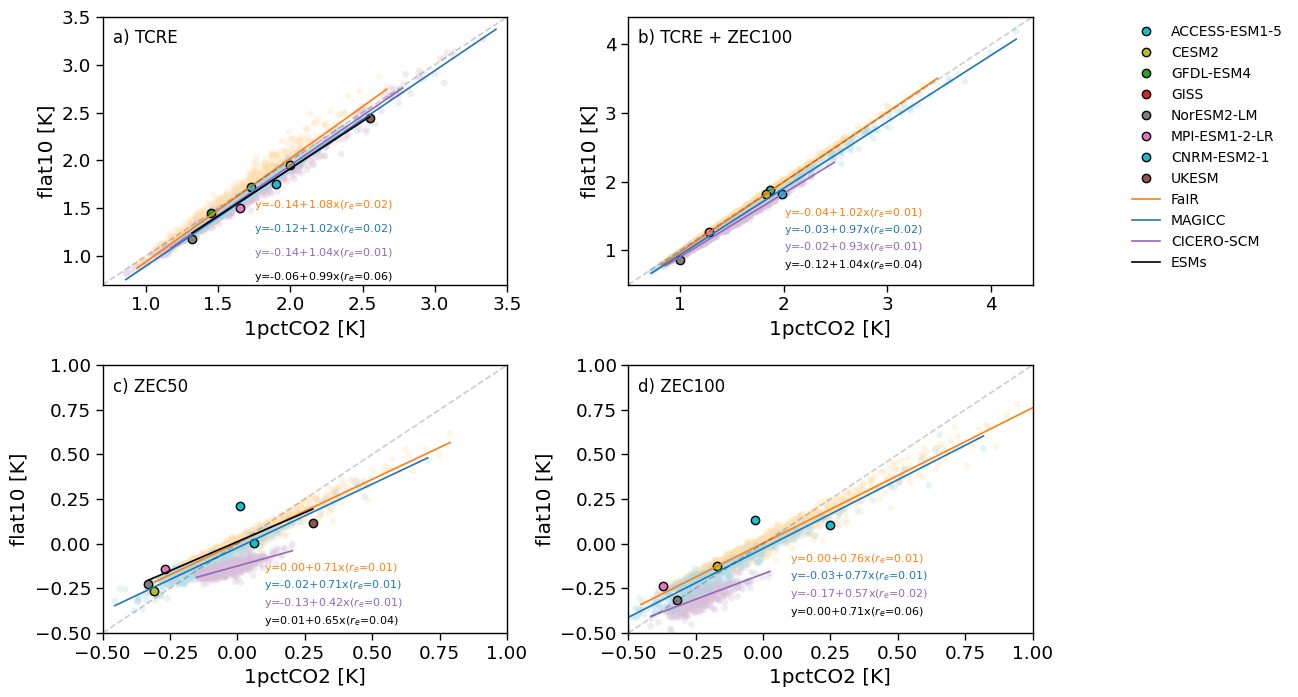

In [141]:

fig = plt.figure(figsize=[12,8])

### subplot 1
sub = fig.add_subplot(2,2,1)
sub.scatter(fair_metrics_1pct['tcre'],tcre100f, color='navajowhite', alpha=0.3, edgecolor="none")
sub.scatter(magicc_metrics_1pct['tcre_1pctco2'],tcre100m, color='thistle',alpha=0.3, edgecolor="none")
sub.scatter(cicero_metrics_1pct['tcre'],tcre100c, color='lightblue',alpha=0.3, edgecolor="none")
#sub.scatter(df_zec_1pct['TCRE'],esm_tcre_flat10, color="black", edgecolor="none")
for i in range(len(mdls)):
    sub.plot(df_zec_1pct['TCRE'].iloc[i],esm_metrics_flat10.loc[mdls[i],'tcre'],'o',markerfacecolor=mcols[i],markeredgecolor='k',markersize=6,label=mdls[i])
# FaIR best fit
x = np.array(fair_metrics_1pct['tcre'])
y = np.array(tcre100f)
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="tab:orange")
sub.text(1.75,1.5,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:orange',fontsize=8)

#MAGICC best fit
x = np.array(magicc_metrics_1pct['tcre_1pctco2'])
y = np.array(tcre100m)
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='tab:blue')
sub.text(1.75,1.25,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:blue',fontsize=8)

#CICERO best fit
x = np.array(cicero_metrics_1pct['tcre'])
y = np.array(tcre100c)
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.plot(np.unique(x[idx]), np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])), color='tab:purple')
sub.text(1.75,1.,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:purple',fontsize=8)

# ESM best fit
x = np.array(df_zec_1pct['TCRE'])[np.isfinite(np.array(df_zec_1pct['TCRE']))]
y = np.array(esm_tcre_flat10)[np.isfinite(np.array(df_zec_1pct['TCRE']))]
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))
sub.text(1.75,0.75,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='black',fontsize=8)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="black")

sub.plot([0.7,3.5],[.7,3.5],'k--',alpha=0.2)
sub.set_xlim(0.7,3.5)
sub.set_ylim(0.7,3.5)
sub.set_ylabel('flat10 [K]')
sub.set_xlabel('1pctCO2 [K]')
sub.scatter(-99,-99, color='navajowhite', alpha=1, edgecolor="none", label="FaIR")
sub.scatter(-99,-99, color='lightblue', alpha=1, edgecolor="none", label="MAGICC")
sub.scatter(-99,-99, color='thistle', alpha=1, edgecolor="none", label="CICERO-SCM")
sub.scatter(-99,-99, color="black", edgecolor="none", label="ESMs")
sub.annotate('a) TCRE', xy=(0.025, 0.92), xycoords='axes fraction', fontsize=12, ha='left', va='center')

### subplot 2
sub = fig.add_subplot(2,2,2)
sub.scatter(fair_metrics_1pct['zec100']+fair_metrics_1pct['tcre'],ds_fair.zec100+ds_fair.tcre, alpha=0.3,color='navajowhite', edgecolor="none")
sub.scatter(magicc_metrics_1pct['zec100_esm-1pct-brch-1000pgc']+magicc_metrics_1pct['tcre_1pctco2'],zec100m+tcre100m, color='lightblue',alpha=0.3, edgecolor="none")
sub.scatter(cicero_metrics_1pct['zec100']+cicero_metrics_1pct['tcre'],zec100c+tcre100c, color='thistle',alpha=0.3, edgecolor="none")
#sub.scatter(df_zec_1pct['ZEC100']+df_zec_1pct['TCRE'],esm_zec100_flat10+esm_tcre_flat10, color="black", edgecolor="none")
for i in range(len(mdls)):
    sub.plot((df_zec_1pct['ZEC100']+df_zec_1pct['TCRE']).iloc[i],(esm_zec100_flat10+esm_tcre_flat10)[i],'o',markerfacecolor=mcols[i],markeredgecolor='k',markersize=6,label=mdls[i])
# FaIR best fit
x = np.array(fair_metrics_1pct['zec100']+fair_metrics_1pct['tcre'])
y = np.array(ds_fair.zec100+ds_fair.tcre)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="tab:orange", label="FaIR")
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(2.,1.5,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:orange',fontsize=8)

#MAGICC best fit
x = np.array(magicc_metrics_1pct['zec100_esm-1pct-brch-1000pgc']+magicc_metrics_1pct['tcre_1pctco2'])
y = np.array(zec100m+tcre100m)
sub.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='tab:blue',label="MAGICC")
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(2.,1.25,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:blue',fontsize=8)

#CICERO best fit
x = np.array(cicero_metrics_1pct['zec100']+cicero_metrics_1pct['tcre'])
y = np.array(zec100c+tcre100c)
idx = np.isfinite(x) & np.isfinite(y)
sub.plot(np.unique(x[idx]), np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])), color='tab:purple',label="CICERO-SCM")
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(2.,1.,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:purple',fontsize=8)

# ESM best fit
x = np.array(df_zec_1pct['ZEC100']+df_zec_1pct['TCRE'])[np.isfinite(np.array(df_zec_1pct['ZEC100']+df_zec_1pct['TCRE']))]
y = np.array(esm_zec100_flat10+esm_tcre_flat10)[np.isfinite(np.array(df_zec_1pct['ZEC100']+df_zec_1pct['TCRE']))]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="black",label="ESMs")

idx = np.isfinite(x) & np.isfinite(y)
rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(2.,.75,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='k',fontsize=8)

sub.plot([0.5,4.4],[0.5,4.4],'k--',alpha=0.2)
sub.set_xlim(0.5,4.4)
sub.set_ylim(0.5,4.4)
sub.set_ylabel('flat10 [K]')
sub.set_xlabel('1pctCO2 [K]')
sub.legend(frameon=False, loc="lower right", prop={'size': 10},bbox_to_anchor=(1.65, 0.01))

sub.annotate('b) TCRE + ZEC100', xy=(0.025, 0.92), xycoords='axes fraction', fontsize=12, ha='left', va='center')

### subplot 3
sub = fig.add_subplot(2,2,3)
sub.scatter(fair_metrics_1pct['zec50'],ds_fair.zec50 ,alpha=0.3, color='navajowhite', edgecolor="none")
sub.scatter(magicc_metrics_1pct['zec50_esm-1pct-brch-1000pgc'],zec50m, color='lightblue', alpha=0.3, edgecolor="none")
sub.scatter(cicero_metrics_1pct['zec50'],zec50c, color='thistle', alpha=0.3, edgecolor="none")
#sub.scatter(df_zec_1pct['ZEC50'],esm_zec50_flat10, color="black", edgecolor="none")
for i in range(len(mdls)):
    sub.plot((df_zec_1pct['ZEC50']).iloc[i],(esm_zec50_flat10)[i],'o',markerfacecolor=mcols[i],markeredgecolor='k',markersize=6,label=mdls[i])

# FaIR best fit
x = np.array(fair_metrics_1pct['zec50'])
y = np.array(ds_fair.zec50)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="tab:orange")
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.15,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:orange',fontsize=8)

#MAGICC best fit
x = np.array(magicc_metrics_1pct['zec50_esm-1pct-brch-1000pgc'])
y = np.array(zec50m)
sub.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='tab:blue')
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.25,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:blue',fontsize=8)

#CICERO best fit
x = np.array(cicero_metrics_1pct['zec50'])
y = np.array(zec50c)
idx = np.isfinite(x) & np.isfinite(y)
sub.plot(np.unique(x[idx]), np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])), color='tab:purple')
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.35,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:purple',fontsize=8)


# ESM best fit
x = np.array(df_zec_1pct['ZEC50'])[np.isfinite(np.array(df_zec_1pct['ZEC50']))]
y = np.array(esm_zec50_flat10)[np.isfinite(np.array(df_zec_1pct['ZEC50']))]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="black")
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.45,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='k',fontsize=8)

sub.plot([-.5,1],[-.5,1],'k--',alpha=0.2)
sub.set_xlim(-0.5,1)
sub.set_ylim(-0.5,1)
sub.set_ylabel('flat10 [K]')
sub.set_xlabel('1pctCO2 [K]')
sub.annotate('c) ZEC50', xy=(0.025, 0.92), xycoords='axes fraction', fontsize=12, ha='left', va='center')

### subplot 4
sub = fig.add_subplot(2,2,4)
sub.scatter(fair_metrics_1pct['zec100'], ds_fair.zec100 ,alpha=0.3, color='navajowhite', edgecolor="none")
sub.scatter(cicero_metrics_1pct['zec100'], zec100c ,alpha=0.3, color='thistle', edgecolor="none")

sub.scatter(magicc_metrics_1pct['zec100_esm-1pct-brch-1000pgc'], zec100m, color='lightblue', alpha=0.3, edgecolor="none")
#sub.scatter(df_zec_1pct['ZEC100'],esm_zec100_flat10, color="black", edgecolor="none")
for i in range(len(mdls)):
    sub.plot((df_zec_1pct['ZEC100']).iloc[i],(esm_zec100_flat10)[i],'o',markerfacecolor=mcols[i],markeredgecolor='k',markersize=6,label=mdls[i])

# FaIR best fit
x = np.array(fair_metrics_1pct['zec100'])
y = np.array(ds_fair.zec100)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="tab:orange")
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.1,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:orange',fontsize=8)

#MAGICC best fit
x = np.array(magicc_metrics_1pct['zec100_esm-1pct-brch-1000pgc'])
y = np.array(zec100m)
sub.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='tab:blue')
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.2,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:blue',fontsize=8)

#CICERO best fit
x = np.array(cicero_metrics_1pct['zec100'])
y = np.array(zec100c)
idx = np.isfinite(x) & np.isfinite(y)
rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.plot(np.unique(x[idx]), np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])), color='tab:purple')
sub.text(0.1,-0.3,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:purple',fontsize=8)
# ESM best fit
x = np.array(df_zec_1pct['ZEC100'])[np.isfinite(np.array(df_zec_1pct['ZEC100']))]
y = np.array(esm_zec100_flat10)[np.isfinite(np.array(df_zec_1pct['ZEC100']))]
idx = np.isfinite(x) & np.isfinite(y)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="black")
rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.4,'y='+"{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms) ,color='k',fontsize=8)

sub.plot([-.5,1],[-.5,1],'k--',alpha=0.2)
sub.set_xlim(-0.5,1)
sub.set_ylim(-0.5,1)
sub.set_ylabel('flat10 [K]')
sub.set_xlabel('1pctCO2 [K]')
sub.annotate('d) ZEC100', xy=(0.025, 0.92), xycoords='axes fraction', fontsize=12, ha='left', va='center')

fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.savefig("images/flat10_SCM_ESM_metric_correlations.pdf", bbox_inches='tight')
plt.savefig("images/flat10_SCM_ESM_metric_correlations.jpg", bbox_inches='tight')

In [142]:
df_zec_1pct['TCRE'].values

array([1.9 , 2.  , 1.45,  nan, 1.32, 1.65, 1.73, 2.55])

In [143]:
esm_metrics_flat10.loc[:,'zec100']

ACCESS-ESM1-5    0.133
CESM2           -0.127
GFDL-ESM4       -0.114
GISS            -0.241
NorESM2-LM      -0.313
MPI-ESM1-2-LR   -0.239
CNRM-ESM2-1      0.105
UKESM              NaN
Name: zec100, dtype: float64

In [147]:
def vp(data,pos,color,side,nm):
        data=data[~np.isnan(data)]

        parts=plt.violinplot(data,positions=[pos],showmeans=True,widths=.25, side=side)
        for pc in parts['bodies']:
            pc.set_facecolor(color)
            pc.set_edgecolor(color)
            pc.set_color(color)
        for partname in ('cbars','cmins','cmaxes','cmeans'):
            vp = parts[partname]
            vp.set_edgecolor(color)
            vp.set_linewidth(1)
        if side=='low':
            pc.set_alpha(0.75)
            plt.text(pos-.04, 3, 'flat10', color=color, fontsize=8, ha='center', va='top',rotation=90)
            plt.text(pos, data.mean(),'{0:.2f}'.format(data.mean().values), color='w', fontsize=6, ha='right', va='bottom')
        else:
            pc.set_alpha(0.25)
            plt.text(pos+.04, 3, '1pctco2', color=color, fontsize=8, ha='center', va='top',rotation=90)
            plt.text(pos, data.mean(),'{0:.2f}'.format(np.mean(data)), color=color, fontsize=6, ha='left', va='bottom')

        plt.text(pos, 3.5, nm, color='darkgrey', fontsize=12, ha='center', va='bottom',rotation=90)


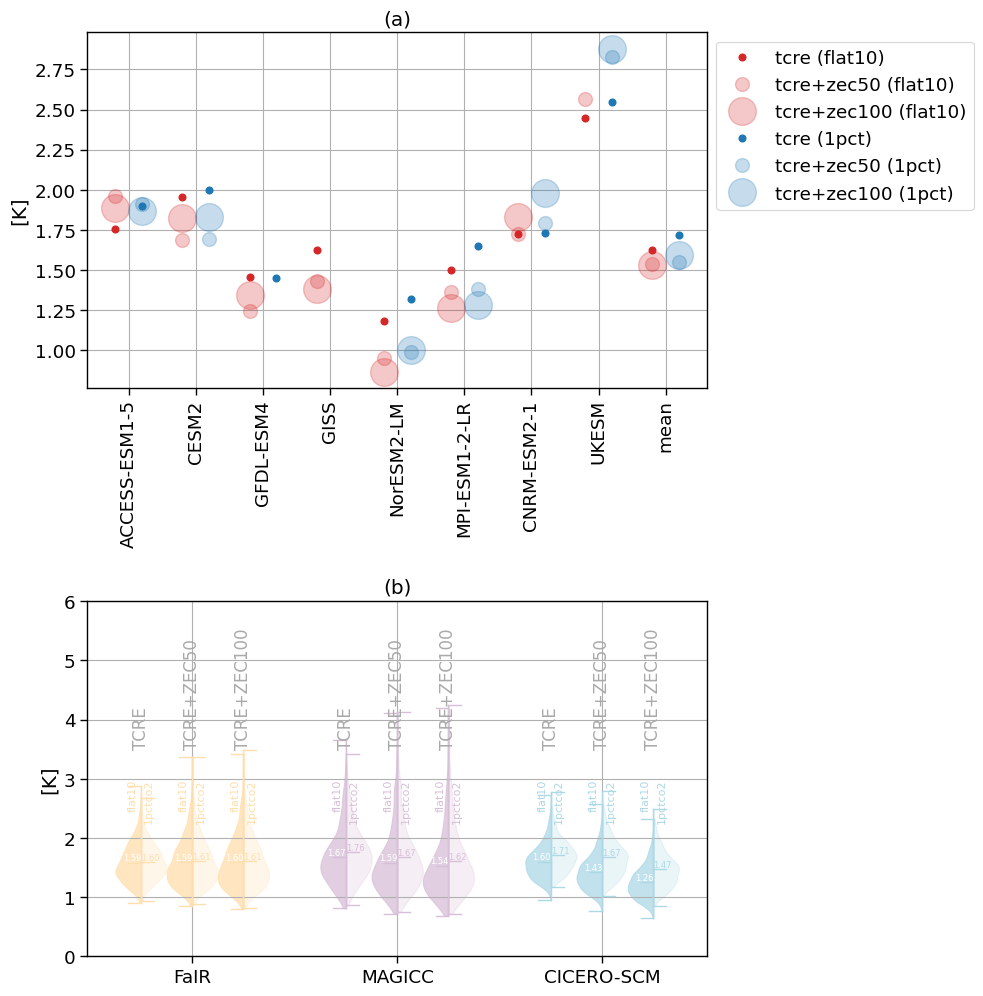

In [148]:
fig, axs = plt.subplots(2,1,figsize=[8,12])

plt.axes(axs[0])

weight_counts={'TCRE':np.hstack([df_zec_1pct['TCRE'].values,df_zec_1pct['TCRE'].iloc[[0,1,4,5,6]].mean()]),'ZEC50':np.hstack([df_zec_1pct['ZEC50'].values,df_zec_1pct['ZEC50'].iloc[[0,1,4,5,6]].mean()]),'ZEC100':np.hstack([(df_zec_1pct['ZEC100'].values-df_zec_1pct['ZEC50'].values),(df_zec_1pct['ZEC100'].iloc[[0,1,4,5,6]].mean()-df_zec_1pct['ZEC50'].iloc[[0,1,4,5,6]].mean())])}

weight_counts_f10={'TCRE':np.hstack([esm_metrics_flat10.loc[:,'tcre'].values,esm_metrics_flat10.loc[:,'tcre'].iloc[[0,1,4,5,6]].mean()]),'ZEC50':np.hstack([esm_metrics_flat10.loc[:,'zec50'].values,esm_metrics_flat10.loc[:,'zec50'].iloc[[0,1,4,5,6]].mean()]),'ZEC100':np.hstack([(esm_metrics_flat10.loc[:,'zec100'].values-esm_metrics_flat10.loc[:,'zec50'].values),(esm_metrics_flat10.loc[:,'zec100'].iloc[[0,1,4,5,6]].mean()-esm_metrics_flat10.loc[:,'zec50'].iloc[[0,1,4,5,6]].mean())])}


mdlsp=mdls+['mean']
x = np.arange(len(mdlsp))  # the label locations

bottom = np.zeros(len(mdlsp))
p=['']*6
i=0
for boolean, weight_count in weight_counts_f10.items():
    if i==0:
        pl= plt.plot(x-.2, weight_count,'o',color='tab:red',markerfacecolor='tab:red',label='tcre (flat10)')
        p[0]=pl[0]
    else:
        tmp=np.sign(weight_count)
        tmpc=np.repeat(['tab:grey'],len(mdlsp))
        tmpc[np.where(tmp==-1)[0]]='tab:blue'
        tmpc[np.where(tmp==1)[0]]='tab:red'
    if i==1:
        for j,w in enumerate(weight_count):
            pl = plt.plot(x[j]-.2, [bottom[j]+w],color='tab:red',marker='o',markersize=10,linestyle='none',alpha=0.25,label='tcre+zec50 (flat10)')
            p[1]=pl[0]
    if i==2:
        for j,w in enumerate(weight_count):
            pl = plt.plot(x[j]-.2, [bottom[j]+w],color='tab:red',marker='o',markersize=20,linestyle='none',alpha=0.25,label='tcre+zec100 (flat10)')
            p[2]=pl[0]
      
    bottom += weight_count
    i +=1

bottom = np.zeros(len(mdlsp))
i=0
for boolean, weight_count in weight_counts.items():
    if i==0:
        pl = plt.plot(x+.2, weight_count,'o',color='tab:blue',markerfacecolor='tab:blue',label='tcre (1pct)')
        p[3]=pl[0]
    else:
        tmp=np.sign(weight_count)
        tmpc=np.repeat(['tab:grey'],len(mdlsp))
        tmpc[np.where(tmp==-1)[0]]='tab:blue'
        tmpc[np.where(tmp==1)[0]]='tab:red'
    if i==1:
        for j,w in enumerate(weight_count):
            pl = plt.plot(x[j]+.2, bottom[j]+w,color='tab:blue',marker='o',markersize=10,linestyle='none',label='tcre+zec50 (1pct)',alpha=0.25)
            p[4]=pl[0]
    if i==2:
        for j,w in enumerate(weight_count):
            pl = plt.plot(x[j]+.2, bottom[j]+w,color='tab:blue',marker='o',markersize=20,linestyle='none',label='tcre+zec100 (1pct)',alpha=0.25)
            p[5]=pl[0]
      
    bottom += weight_count
    i +=1



plt.grid()
plt.xticks(x, mdlsp, rotation=90)
plt.ylabel('[K]')
plt.legend(p, [p_.__getattribute__('get_label')() for p_ in p],loc='upper left',bbox_to_anchor=(1,1))
plt.title('(a)')
plt.axes(axs[1])




vp(fair_metrics_1pct['tcre'],-.25,'navajowhite','high','TCRE')
vp(magicc_metrics_1pct['tcre_1pctco2'],1-.25,'thistle','high','TCRE')
vp(cicero_metrics_1pct['tcre'],2-.25,'lightblue','high','TCRE')


vp(tcre100f,-.25,'navajowhite','low','')
vp(tcre100m,1-.25,'thistle','low','')
vp(tcre100c,2-.25,'lightblue','low','')



vp(fair_metrics_1pct['tcre']+fair_metrics_1pct['zec50'],0,'navajowhite','high','TCRE+ZEC50')
vp(magicc_metrics_1pct['tcre_1pctco2']+magicc_metrics_1pct['zec50_esm-1pct-brch-1000pgc'],1,'thistle','high','TCRE+ZEC50')
vp(cicero_metrics_1pct['tcre']+cicero_metrics_1pct['zec50'],2,'lightblue','high','TCRE+ZEC50')


vp(tcre100f+zec50f,0,'navajowhite','low','')
vp(tcre100m+zec50m,1,'thistle','low','')
vp(tcre100c+zec50c,2,'lightblue','low','')

vp(fair_metrics_1pct['tcre']+fair_metrics_1pct['zec100'],0+.25,'navajowhite','high','TCRE+ZEC100')
vp(magicc_metrics_1pct['tcre_1pctco2']+magicc_metrics_1pct['zec100_esm-1pct-brch-1000pgc'],1+.25,'thistle','high','TCRE+ZEC100')
vp(cicero_metrics_1pct['tcre']+cicero_metrics_1pct['zec100'],2+.25,'lightblue','high','TCRE+ZEC100')


vp(tcre100f+zec100f,0+.25,'navajowhite','low','')
vp(tcre100m+zec100m,1+.25,'thistle','low','')
vp(tcre100c+zec100c,2+.25,'lightblue','low','')

plt.xticks([0,1,2],['FaIR','MAGICC','CICERO-SCM'])
plt.ylim(0,6)
plt.grid()
plt.ylabel('[K]')
plt.title('(b)')
fig.subplots_adjust(wspace=0.3, hspace=0.6)


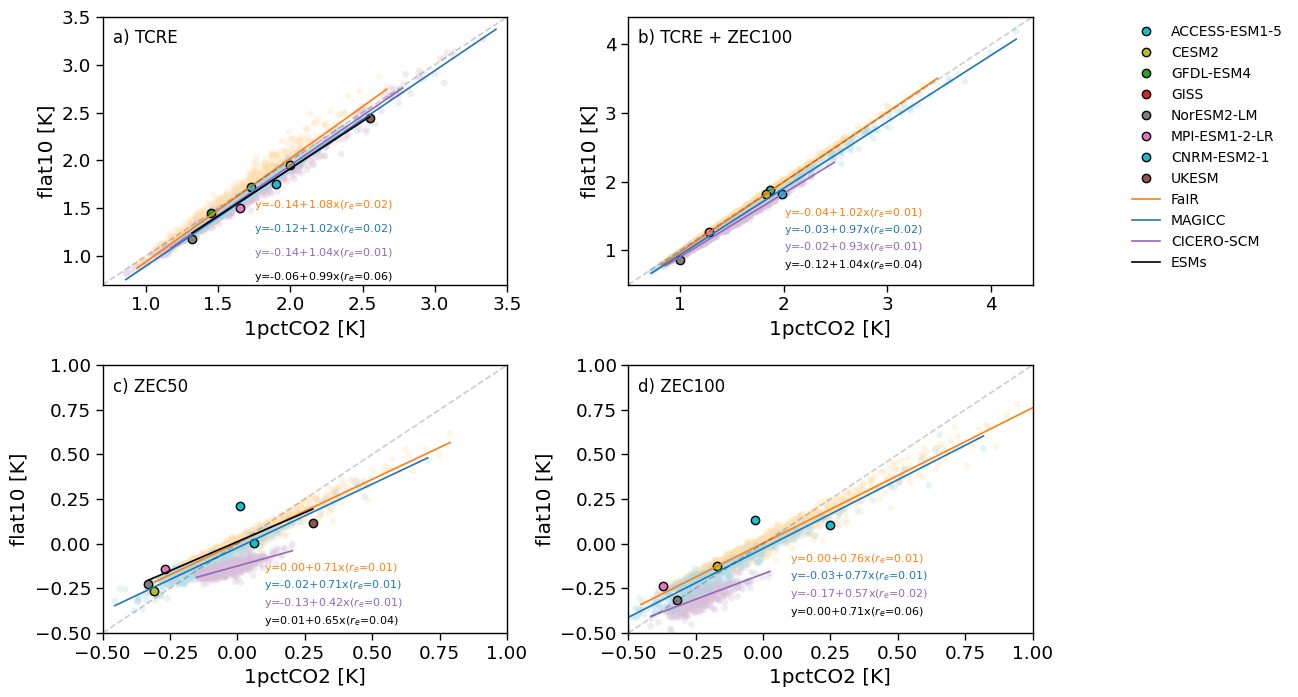

In [150]:

fig = plt.figure(figsize=[12,8])

### subplot 1
sub = fig.add_subplot(2,2,1)
sub.scatter(fair_metrics_1pct['tcre'],tcre100f, color='navajowhite', alpha=0.3, edgecolor="none")
sub.scatter(magicc_metrics_1pct['tcre_1pctco2'],tcre100m, color='thistle',alpha=0.3, edgecolor="none")
sub.scatter(cicero_metrics_1pct['tcre'],tcre100c, color='lightblue',alpha=0.3, edgecolor="none")
#sub.scatter(df_zec_1pct['TCRE'],esm_tcre_flat10, color="black", edgecolor="none")
for i in range(len(mdls)):
    sub.plot(df_zec_1pct['TCRE'].iloc[i],esm_metrics_flat10.loc[mdls[i],'tcre'],'o',markerfacecolor=mcols[i],markeredgecolor='k',markersize=6,label=mdls[i])
# FaIR best fit
x = np.array(fair_metrics_1pct['tcre'])
y = np.array(tcre100f)
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="tab:orange")
sub.text(1.75,1.5,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:orange',fontsize=8)

#MAGICC best fit
x = np.array(magicc_metrics_1pct['tcre_1pctco2'])
y = np.array(tcre100m)
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='tab:blue')
sub.text(1.75,1.25,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:blue',fontsize=8)

#CICERO best fit
x = np.array(cicero_metrics_1pct['tcre'])
y = np.array(tcre100c)
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.plot(np.unique(x[idx]), np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])), color='tab:purple')
sub.text(1.75,1.,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:purple',fontsize=8)

# ESM best fit
x = np.array(df_zec_1pct['TCRE'])[np.isfinite(np.array(df_zec_1pct['TCRE']))]
y = np.array(esm_tcre_flat10)[np.isfinite(np.array(df_zec_1pct['TCRE']))]
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))
sub.text(1.75,0.75,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='black',fontsize=8)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="black")

sub.plot([0.7,3.5],[.7,3.5],'k--',alpha=0.2)
sub.set_xlim(0.7,3.5)
sub.set_ylim(0.7,3.5)
sub.set_ylabel('flat10 [K]')
sub.set_xlabel('1pctCO2 [K]')
sub.scatter(-99,-99, color='navajowhite', alpha=1, edgecolor="none", label="FaIR")
sub.scatter(-99,-99, color='lightblue', alpha=1, edgecolor="none", label="MAGICC")
sub.scatter(-99,-99, color='thistle', alpha=1, edgecolor="none", label="CICERO-SCM")
sub.scatter(-99,-99, color="black", edgecolor="none", label="ESMs")
sub.annotate('a) TCRE', xy=(0.025, 0.92), xycoords='axes fraction', fontsize=12, ha='left', va='center')

### subplot 2
sub = fig.add_subplot(2,2,2)
sub.scatter(fair_metrics_1pct['zec100']+fair_metrics_1pct['tcre'],ds_fair.zec100+ds_fair.tcre, alpha=0.3,color='navajowhite', edgecolor="none")
sub.scatter(magicc_metrics_1pct['zec100_esm-1pct-brch-1000pgc']+magicc_metrics_1pct['tcre_1pctco2'],zec100m+tcre100m, color='lightblue',alpha=0.3, edgecolor="none")
sub.scatter(cicero_metrics_1pct['zec100']+cicero_metrics_1pct['tcre'],zec100c+tcre100c, color='thistle',alpha=0.3, edgecolor="none")
#sub.scatter(df_zec_1pct['ZEC100']+df_zec_1pct['TCRE'],esm_zec100_flat10+esm_tcre_flat10, color="black", edgecolor="none")
for i in range(len(mdls)):
    sub.plot((df_zec_1pct['ZEC100']+df_zec_1pct['TCRE']).iloc[i],(esm_zec100_flat10+esm_tcre_flat10)[i],'o',markerfacecolor=mcols[i],markeredgecolor='k',markersize=6,label=mdls[i])
# FaIR best fit
x = np.array(fair_metrics_1pct['zec100']+fair_metrics_1pct['tcre'])
y = np.array(ds_fair.zec100+ds_fair.tcre)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="tab:orange", label="FaIR")
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(2.,1.5,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:orange',fontsize=8)

#MAGICC best fit
x = np.array(magicc_metrics_1pct['zec100_esm-1pct-brch-1000pgc']+magicc_metrics_1pct['tcre_1pctco2'])
y = np.array(zec100m+tcre100m)
sub.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='tab:blue',label="MAGICC")
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(2.,1.25,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:blue',fontsize=8)

#CICERO best fit
x = np.array(cicero_metrics_1pct['zec100']+cicero_metrics_1pct['tcre'])
y = np.array(zec100c+tcre100c)
idx = np.isfinite(x) & np.isfinite(y)
sub.plot(np.unique(x[idx]), np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])), color='tab:purple',label="CICERO-SCM")
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(2.,1.,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:purple',fontsize=8)

# ESM best fit
x = np.array(df_zec_1pct['ZEC100']+df_zec_1pct['TCRE'])[np.isfinite(np.array(df_zec_1pct['ZEC100']+df_zec_1pct['TCRE']))]
y = np.array(esm_zec100_flat10+esm_tcre_flat10)[np.isfinite(np.array(df_zec_1pct['ZEC100']+df_zec_1pct['TCRE']))]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="black",label="ESMs")

idx = np.isfinite(x) & np.isfinite(y)
rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(2.,.75,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='k',fontsize=8)

sub.plot([0.5,4.4],[0.5,4.4],'k--',alpha=0.2)
sub.set_xlim(0.5,4.4)
sub.set_ylim(0.5,4.4)
sub.set_ylabel('flat10 [K]')
sub.set_xlabel('1pctCO2 [K]')
sub.legend(frameon=False, loc="lower right", prop={'size': 10},bbox_to_anchor=(1.65, 0.01))

sub.annotate('b) TCRE + ZEC100', xy=(0.025, 0.92), xycoords='axes fraction', fontsize=12, ha='left', va='center')

### subplot 3
sub = fig.add_subplot(2,2,3)
sub.scatter(fair_metrics_1pct['zec50'],ds_fair.zec50 ,alpha=0.3, color='navajowhite', edgecolor="none")
sub.scatter(magicc_metrics_1pct['zec50_esm-1pct-brch-1000pgc'],zec50m, color='lightblue', alpha=0.3, edgecolor="none")
sub.scatter(cicero_metrics_1pct['zec50'],zec50c, color='thistle', alpha=0.3, edgecolor="none")
#sub.scatter(df_zec_1pct['ZEC50'],esm_zec50_flat10, color="black", edgecolor="none")
for i in range(len(mdls)):
    sub.plot((df_zec_1pct['ZEC50']).iloc[i],(esm_zec50_flat10)[i],'o',markerfacecolor=mcols[i],markeredgecolor='k',markersize=6,label=mdls[i])

# FaIR best fit
x = np.array(fair_metrics_1pct['zec50'])
y = np.array(ds_fair.zec50)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="tab:orange")
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.15,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:orange',fontsize=8)

#MAGICC best fit
x = np.array(magicc_metrics_1pct['zec50_esm-1pct-brch-1000pgc'])
y = np.array(zec50m)
sub.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='tab:blue')
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.25,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:blue',fontsize=8)

#CICERO best fit
x = np.array(cicero_metrics_1pct['zec50'])
y = np.array(zec50c)
idx = np.isfinite(x) & np.isfinite(y)
sub.plot(np.unique(x[idx]), np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])), color='tab:purple')
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.35,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:purple',fontsize=8)


# ESM best fit
x = np.array(df_zec_1pct['ZEC50'])[np.isfinite(np.array(df_zec_1pct['ZEC50']))]
y = np.array(esm_zec50_flat10)[np.isfinite(np.array(df_zec_1pct['ZEC50']))]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="black")
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.45,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='k',fontsize=8)

sub.plot([-.5,1],[-.5,1],'k--',alpha=0.2)
sub.set_xlim(-0.5,1)
sub.set_ylim(-0.5,1)
sub.set_ylabel('flat10 [K]')
sub.set_xlabel('1pctCO2 [K]')
sub.annotate('c) ZEC50', xy=(0.025, 0.92), xycoords='axes fraction', fontsize=12, ha='left', va='center')

### subplot 4
sub = fig.add_subplot(2,2,4)
sub.scatter(fair_metrics_1pct['zec100'], ds_fair.zec100 ,alpha=0.3, color='navajowhite', edgecolor="none")
sub.scatter(cicero_metrics_1pct['zec100'], zec100c ,alpha=0.3, color='thistle', edgecolor="none")

sub.scatter(magicc_metrics_1pct['zec100_esm-1pct-brch-1000pgc'], zec100m, color='lightblue', alpha=0.3, edgecolor="none")
#sub.scatter(df_zec_1pct['ZEC100'],esm_zec100_flat10, color="black", edgecolor="none")
for i in range(len(mdls)):
    sub.plot((df_zec_1pct['ZEC100']).iloc[i],(esm_zec100_flat10)[i],'o',markerfacecolor=mcols[i],markeredgecolor='k',markersize=6,label=mdls[i])

# FaIR best fit
x = np.array(fair_metrics_1pct['zec100'])
y = np.array(ds_fair.zec100)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="tab:orange")
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.1,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:orange',fontsize=8)

#MAGICC best fit
x = np.array(magicc_metrics_1pct['zec100_esm-1pct-brch-1000pgc'])
y = np.array(zec100m)
sub.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='tab:blue')
idx = np.isfinite(x) & np.isfinite(y)

rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.2,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:blue',fontsize=8)

#CICERO best fit
x = np.array(cicero_metrics_1pct['zec100'])
y = np.array(zec100c)
idx = np.isfinite(x) & np.isfinite(y)
rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.plot(np.unique(x[idx]), np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])), color='tab:purple')
sub.text(0.1,-0.3,'y=' "{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms),color='tab:purple',fontsize=8)
# ESM best fit
x = np.array(df_zec_1pct['ZEC100'])[np.isfinite(np.array(df_zec_1pct['ZEC100']))]
y = np.array(esm_zec100_flat10)[np.isfinite(np.array(df_zec_1pct['ZEC100']))]
idx = np.isfinite(x) & np.isfinite(y)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="black")
rms=np.sqrt(np.mean((np.unique(y[idx])- np.poly1d(np.polyfit(x[idx], y[idx], 1))(np.unique(x[idx])))**2))

sub.text(0.1,-0.4,'y='+"{0:0.2f}".format(np.polyfit(x[idx], y[idx], 1)[1]) + "{0:+.2f}".format(np.polyfit(x[idx], y[idx], 1)[0]) + 'x'+"($r_e$={0:0.2f})".format(rms) ,color='k',fontsize=8)

sub.plot([-.5,1],[-.5,1],'k--',alpha=0.2)
sub.set_xlim(-0.5,1)
sub.set_ylim(-0.5,1)
sub.set_ylabel('flat10 [K]')
sub.set_xlabel('1pctCO2 [K]')
sub.annotate('d) ZEC100', xy=(0.025, 0.92), xycoords='axes fraction', fontsize=12, ha='left', va='center')

fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.savefig("images/flat10_SCM_ESM_metric_correlations.pdf", bbox_inches='tight')
plt.savefig("images/flat10_SCM_ESM_metric_correlations.jpg", bbox_inches='tight')

In [151]:
#run plot_c4mip to recreate these csvs
tas_1pct=pd.read_csv('c4mip_tas.csv',index_col=0)
ce_1pct=pd.read_csv('c4mip_emis.csv',index_col=0)
mdls_1pct=ce_1pct.columns



In [152]:
mdls

['ACCESS-ESM1-5',
 'CESM2',
 'GFDL-ESM4',
 'GISS',
 'NorESM2-LM',
 'MPI-ESM1-2-LR',
 'CNRM-ESM2-1',
 'UKESM']

In [153]:
mdls.index(mdls_1pct[3])

2

67
66
67
66
63
66
66


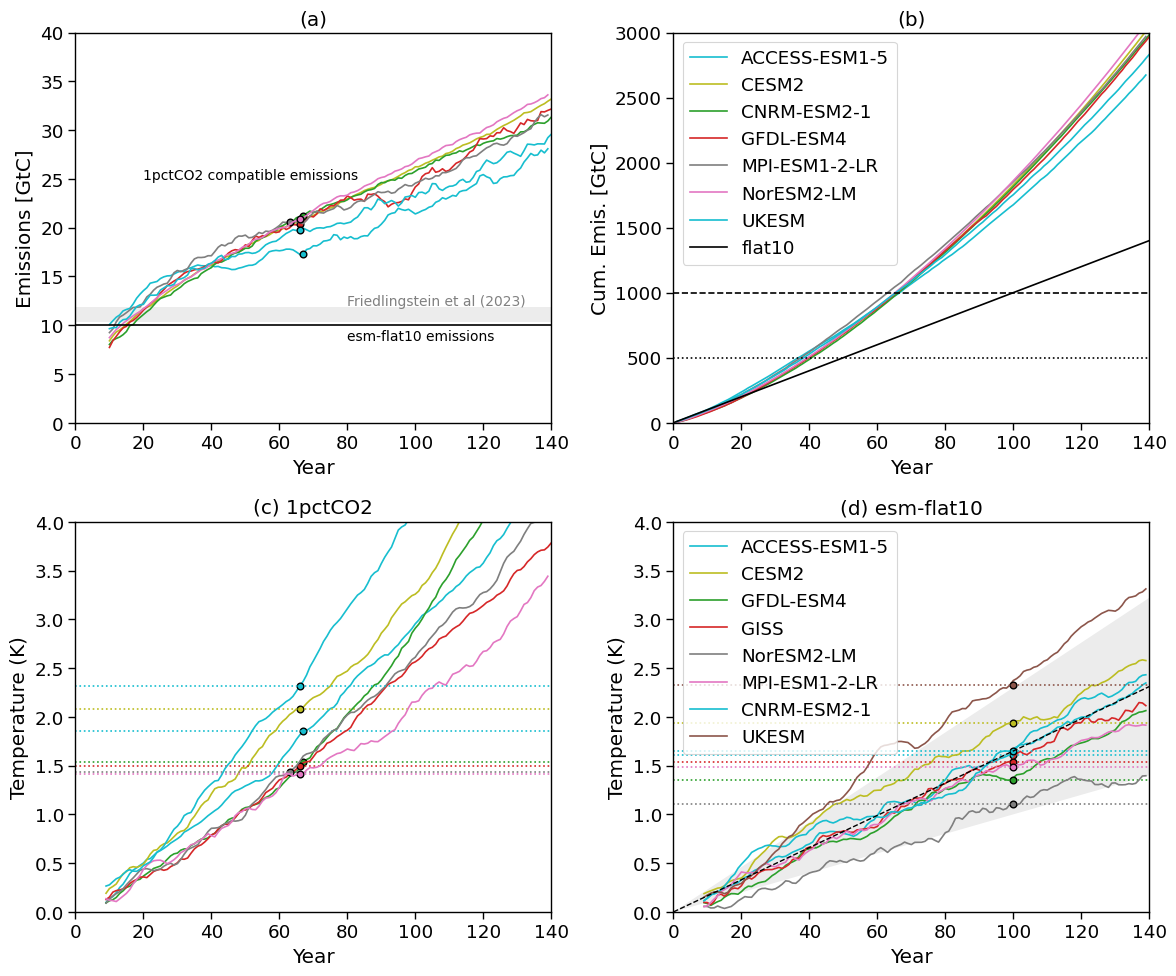

In [154]:
fig, axes = plt.subplots(2,2,figsize=(12, 10))
ax=axes.flatten()

for n,m in enumerate(mdls_1pct):
    mi=mdls.index(m)
    ce_1pct[m].rolling(window=10).mean().plot(color=colors[n],ax=ax[0])
    ytmp=np.argmax(ce_1pct[m].cumsum()>1000)
    ax[0].plot([ytmp],ce_1pct[m].rolling(window=10).mean().iloc[ytmp],marker='o',markerfacecolor=colors[n],markeredgecolor='k',label=m)

ax[0].axhline(10,linestyle='-',color='k',label='flat10')
ax[0].fill_between(np.arange(0,320), 11.1-0.8, 11.1+0.8, color="gray", alpha=0.15, edgecolor="none")

ax[0].set_ylabel('Emissions [GtC]')
ax[0].set_xlabel('Year')
ax[0].set_ylim(0,40)
ax[0].set_xlim(0,140)
ax[0].set_title('(a)')
ax[0].text(20,25,'1pctCO2 compatible emissions',fontsize=10)
ax[0].text(80,8.5,'esm-flat10 emissions',fontsize=10)
ax[0].text(80,12,'Friedlingstein et al (2023)',fontsize=10,color='gray')



for n,m in enumerate(mdls_1pct):
    ce_1pct[m].cumsum().plot(color=colors[n],ax=ax[1],label=m)
ax[1].set_ylabel('Cum. Emis. [GtC]')
ax[1].axhline(1000,linestyle='--',color='k')
ax[1].axhline(500,linestyle=':',color='k')

ax[1].set_xlabel('Year')
ax[1].set_ylim(0,3000)
ax[1].set_xlim(0,140)
ax[1].plot([0,140],[0,1400],'k',label='flat10')
ax[1].set_title('(b)')
ax[1].legend()

for n,m in enumerate(mdls_1pct):
    ytmp=np.argmax(ce_1pct[m].cumsum()>1000)
    print(ytmp)
    (tas_1pct[m]).rolling(window=10).mean().plot(color=colors[n],ax=ax[2])

    ax[2].plot([ytmp],(tas_1pct[m]).rolling(window=10).mean().iloc[ytmp],marker='o',markerfacecolor=colors[n],markeredgecolor='k',label=m)
    ax[2].axhline((tas_1pct[m]).rolling(window=10).mean().iloc[ytmp],linestyle=':',color=colors[n])

ax[2].set_ylabel('Temperature (K)')
ax[2].set_xlabel('Year')
ax[2].set_ylim(0,4)
ax[2].set_xlim(0,140)
ax[2].set_title('(c) 1pctCO2')

for i,m in enumerate(mdls):

    cn0=ed[m]['flat10']['tas'][:20].mean()-(ed[m]['flat10']['tas'][10:30:1].mean()-ed[m]['flat10']['tas'][:20].mean())
    ax[3].plot(ed[m]['flat10']['tas'][:140].rolling(year=10).mean()-cn0,color=mcols[i],label=m)

    ax[3].plot([100],ed[m]['flat10']['tas'][:100].rolling(year=10).mean()[99]-cn0,marker='o',markerfacecolor=colors[i],markeredgecolor='k')
    ax[3].axhline(ed[m]['flat10']['tas'][:100].rolling(year=10).mean()[99]-cn0,linestyle=':',color=colors[i])
    

ax[3].set_ylabel('Temperature (K)')
ax[3].set_xlabel('Year')
ax[3].set_ylim(0,4)
ax[3].set_xlim(0,140)
ax[3].legend()

ax[3].plot(np.arange(0,300)*10*1.65/1000, color='black', lw=1, linestyle="--")
ax[3].fill_between(np.arange(0,320), np.arange(0,320)*10*1.0/1000, np.arange(0,320)*10*2.3/1000, color="gray", alpha=0.15, edgecolor="none")

ax[3].set_title('(d) esm-flat10')


plt.tight_layout()

In [155]:
#run plot_c4mip to recreate these csvs
tas_zecmip=pd.read_csv('zecmip_tas.csv',index_col=0)
ce_zecmip=pd.read_csv('zecmip_emis.csv',index_col=0)
mdls_zecmip=ce_zecmip.columns
yr1000=(ce_zecmip.cumsum()>999).idxmax()

(0.0, 200.0)

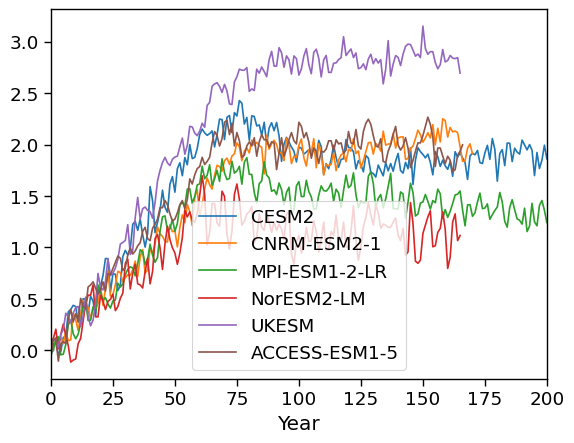

In [156]:
tas_zecmip.plot()
plt.xlim(0,200)

/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/2843347277.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].plot(tas_zecmip.index-yr1000[mz],tas_zecmip.iloc[:,mz],'-',color='k',alpha=0.2,label='esm-1pct-brch-1000PgC')
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/2843347277.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].plot(tas_zecmip[:(int(yr1000[mz])-1)].index-yr1000[mz],tas_zecmip.iloc[:int(yr1000[mz]),mz],'-',color='k',alpha=0.2,label='1pctCO2')
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_24130/2843347277.py:12: FutureWarning: The behav

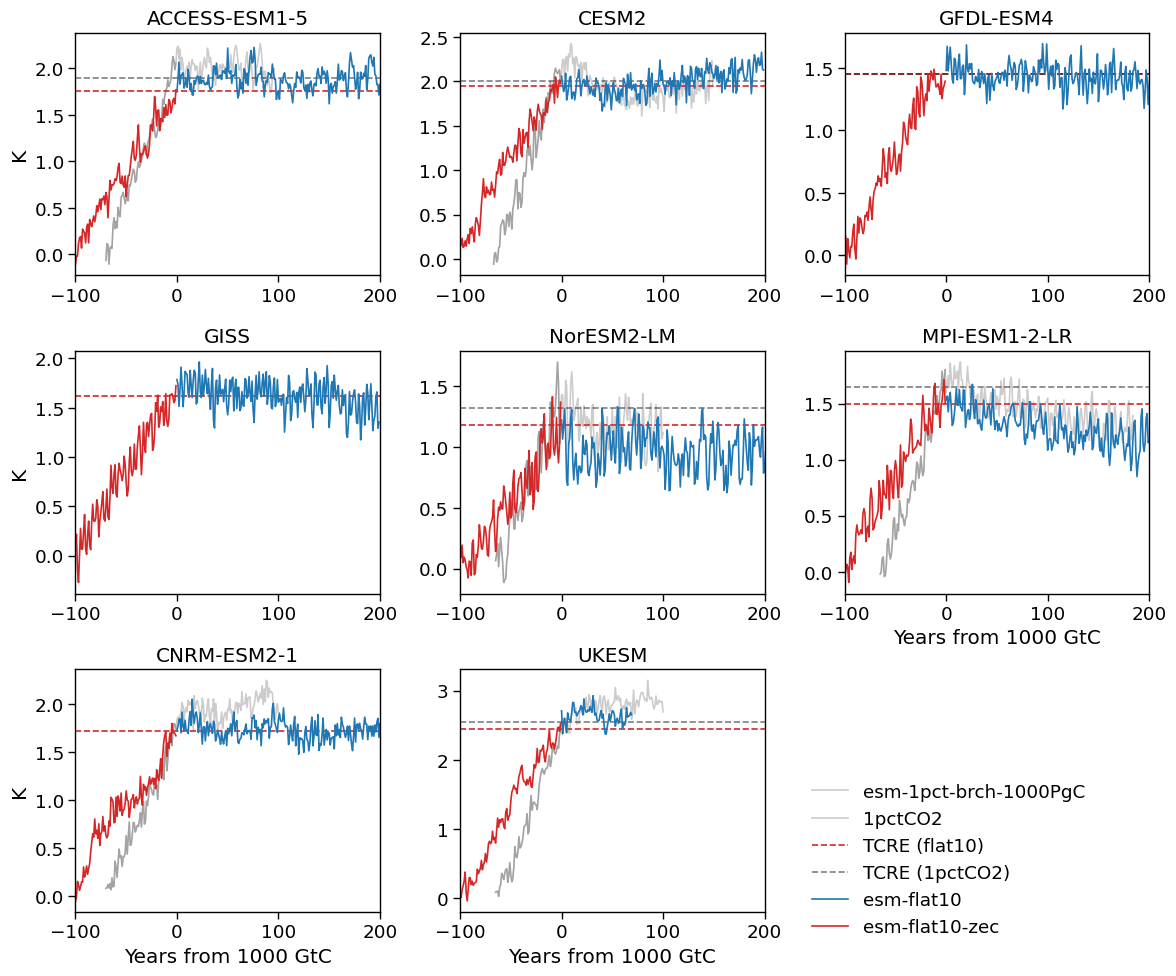

In [157]:
fig, axes = plt.subplots(3,3,figsize=(12, 10))
axes=axes.flatten()

for i,m in enumerate(mdls):

    try:
        mz=list(mdls_zecmip).index(m)
    except:
        mz=np.nan
    if ~np.isnan(mz)>0:
        axes[i].plot(tas_zecmip.index-yr1000[mz],tas_zecmip.iloc[:,mz],'-',color='k',alpha=0.2,label='esm-1pct-brch-1000PgC')
        axes[i].plot(tas_zecmip[:(int(yr1000[mz])-1)].index-yr1000[mz],tas_zecmip.iloc[:int(yr1000[mz]),mz],'-',color='k',alpha=0.2,label='1pctCO2')
    axes[i].axhline(esm_metrics_flat10.loc[m,'tcre'],color='tab:red',linestyle='--',label='TCRE (flat10)')
    tmp=df_zec_1pct.loc[df_zec_1pct['Name'] == m]['TCRE']
    if len(tmp)>0:
      axes[i].axhline(tmp.iloc[0],color='k',linestyle='--',alpha=0.5, label='TCRE (1pctCO2)')
    

    cn0=ed[m]['flat10']['tas'][:20].mean()-(ed[m]['flat10']['tas'][10:30:1].mean()-ed[m]['flat10']['tas'][:20].mean())

    axes[i].plot(ed[m]['flat10-zec']['year'][100:]-ed[m]['flat10-zec']['year'][0]-100,ed[m]['flat10-zec']['tas'][100:]-cn0,'tab:blue',label='esm-flat10')
    axes[i].plot(ed[m]['flat10-zec']['year'][:100]-ed[m]['flat10-zec']['year'][0]-100,ed[m]['flat10-zec']['tas'][0:100]-cn0,'tab:red',label='esm-flat10-zec')
    axes[i].set_xlim(-100,200)
    axes[i].set_title(m)
    if i in [0,3,6]:
        axes[i].set_ylabel('K')
    if i in [5,6,7,8]:
        axes[i].set_xlabel('Years from 1000 GtC')
axes[8].set_visible(False)
plt.tight_layout()
axes[7].legend(frameon=False, loc="upper left", bbox_to_anchor=(1.1, 0.6))
